In [2]:
from google.colab import drive
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image
from math import *
from random import *
import numpy as np
import copy
import time

# Mélange

## Classes Move/RandomMove

In [3]:
class Move:

  def __init__(self, m):

    self.move = m

  def is_wide(self):
    for i in range(len(self.move)):
      if self.move[i] == 'w':
        return True
    return False

  def nb_turn(self):
    if self.move[-1] == "'" :
      return 3
    elif self.move[-1] == '2' :
      return 2
    else:
      return 1

  def nb_w(self):
    s = ""
    i = 0
    while self.move[i].isdigit():
      s = s+self.move[i]
      i = i+1

    if s == "" :
      if self.is_wide():
        return 2
      else:
        return 1
    else : return int(s)

  def ext_sgl_move(self):
    i = 0
    while self.move[i].isdigit():
      i = i+1
    return self.move[i]

  def return_move(self):
    return self.move

  def print_move(self):
    print(self.move)


class RandomMove:

  def __init__(self, size_puzzle):

    all = []

    T = [Move("U"),Move("D"),Move("R"),Move("L"),Move("F"),Move("B")]
    tmp = []
    tmp2 = T

    if(size_puzzle == 2):

      all = [Move("U"),Move("U2"),Move("U'"),Move("F"),Move("F2"),Move("F'"),Move("R"),Move("R'"),Move("R2")]


    elif(size_puzzle >= 4):

      for i in range(2,int(size_puzzle//2)+1):
        for j in range(len(T)):
          tmp.append(Move(str(i)+T[j].move+"w"))

      for k in range(len(tmp)):
        tmp2.append(Move(tmp[k].move))
        tmp2.append(Move(tmp[k].move+"'"))
        tmp2.append(Move(tmp[k].move+"2"))

      all = tmp2

    else:

      for k in range(len(T)):

        tmp.append(Move(T[k].move))
        tmp.append(Move(T[k].move+"'"))
        tmp.append(Move(T[k].move+"2"))

      all = tmp

    n = len(all) - 1
    x = randint(0, n-1)
    self.random_move = all[x]

## Classe Scramble

In [4]:
# 2x2 : 10 moves
# 3x3 : 20 moves
# 4x4 : 45 moves
# 5x5 : 60 moves
# 6x6 : 80 moves
# 7x7 : 100 moves
# 8x8 : 120 moves
# 9x9 : 140 moves
# 10x10 : 160 moves
# 11x11 : 180 moves
# 12x12 : 200 moves
# 13x13 : 220 moves
# 14x14 : 240 moves
# 15x15 : 260 moves
# 16x16 : 280 moves
# 17x17 : 300 moves

class Scramble:

  def __init__(self, size_puzzle):

    if(size_puzzle == 2) : self.size = randint(7, 14)
    elif(size_puzzle == 3) : self.size = randint(18, 20)
    elif(size_puzzle == 4) : self.size = 45
    else : self.size = 60+20*(size_puzzle - 5)

    self.scr = []
    y = RandomMove(size_puzzle).random_move
    self.scr.append(y)

    len_scr = 1

    while(len_scr < self.size):
      new = RandomMove(size_puzzle).random_move

      if(new.nb_w() != y.nb_w() or  new.ext_sgl_move() != y.ext_sgl_move()):
        self.scr.append(new)
        y = new
        len_scr = len_scr + 1


  def return_scr(self):
    s = ""
    for i in range(len(self.scr)):
      s = s+self.scr[i].return_move()+" "
    return s

  def print_scr(self):
    print(self.return_scr())

s = Scramble(2)
s.print_scr()

F R U F' U F' R F' R' U2 F R U' 


In [5]:
text = "D2 R2 F L2 U2 F D2 B' L2 R2 F2 R2 L' U L D2 F2 D' R2 U2 F' Fw2 U' R2 Rw2 B U Rw2 U D2 F' D B' L Rw' F2 Rw' B D Uw L' Fw Uw Fw Uw R'"
result = len(text.split())
print(result)

46


# Rubik's cube

## Classe Image

In [6]:
#drive.mount('/content/drive')

Colors = ['Blanc','Jaune','Bleu','Orange','Vert','Rouge']
ColorsRGB = [[255,255,255],[255,255,0],[0,0,255],[255,127,0],[0,255,0],[255,0,0]]

def color_pixel(rgb_pixel_value):
  L = []
  for i in range(6):
    L.append(abs(rgb_pixel_value[0]-ColorsRGB[i][0])+abs(rgb_pixel_value[1]-ColorsRGB[i][1])+abs(rgb_pixel_value[2]-ColorsRGB[i][2]))
  min_value = min(L)
  min_index = L.index(min_value)
  return Colors[min_index]

class ImageFace:

  def __init__(self, image_path, taille):

    self.taille = taille

    image = Image.open(image_path)
    image_rgb = image.convert("RGB")

    taille_image = image.size[0]
    diff = taille_image/taille
    deb = diff/2

    self.pict = []
    for i in range(taille):
      L = []
      for j in range(taille):
        rgbpv = image_rgb.getpixel((floor(deb+diff*j),floor(deb+diff*i)))
        L.append(color_pixel(rgbpv))
      self.pict.append(L)

  def print_im(self):
    print(self.pict)

class ImageCube:

  def __init__(self, file_path, taille):

    self.ImageWhite = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/White.png",taille)
    self.ImageBlue = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Blue.png",taille)
    self.ImageOrange = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Orange.png",taille)
    self.ImageGreen = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Green.png",taille)
    self.ImageRed = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Red.png",taille)
    self.ImageYellow = ImageFace("/content/drive/My Drive/RubiksCube/"+str(file_path)+"/Yellow.png",taille)

#If = ImageFace("/content/drive/My Drive/RubiksCube/rubik33/Yellow.png",3)
#Ic = ImageCube("rubik33",3)

## Classe Rubik

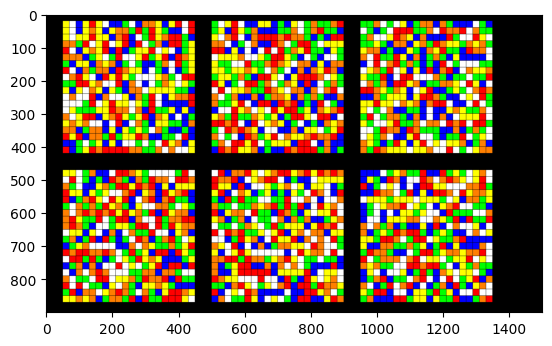

In [7]:
def swap_coord(s,t,p,q):
    tmp = s[p[0]][p[1]]
    s[p[0]][p[1]] = t[q[0]][q[1]]
    t[q[0]][q[1]] = tmp

def conv(c):
    if(c == 'Blanc'): return ColorsRGB[0]
    if(c == 'Jaune'): return ColorsRGB[1]
    if(c == 'Bleu'): return ColorsRGB[2]
    if(c == 'Orange'): return ColorsRGB[3]
    if(c == 'Vert'): return ColorsRGB[4]
    if(c == 'Rouge'): return ColorsRGB[5]

def num_size(s):
    if(s%2 ==0): return ((s-2)*(s-2))//4
    else: return ((s-2)*(s-2)-1)//4

def all_coord(size):
  s = size-2
  n = num_size(size)
  T = np.empty((n,4,2),dtype='int')
  k = 0
  x = s
  a = []
  b = []
  c = []
  d = []
  for j in range(s//2):
    for i in range(x-1):
      T[k][0][0] = j+1
      T[k][0][1] = i+j+1

      T[k][1][0] = i+j+1
      T[k][1][1] = s-j

      T[k][2][0] = s-j
      T[k][2][1] = s-i-j

      T[k][3][0] = s-i-j
      T[k][3][1] = j+1

      k = k+1
    x = x-2
  return T

class Rubik:

  def __init__(self, size):

    self.size = size

    self.WhiteFace = np.empty((size,size),dtype='object')
    self.BlueFace = np.empty((size,size),dtype='object')
    self.OrangeFace = np.empty((size,size),dtype='object')
    self.GreenFace = np.empty((size,size),dtype='object')
    self.RedFace = np.empty((size,size),dtype='object')
    self.YellowFace = np.empty((size,size),dtype='object')

    for i in range(size):
      for j in range(size):
        self.WhiteFace[i][j] = 'Blanc'
        self.BlueFace[i][j] = 'Bleu'
        self.OrangeFace[i][j] = 'Orange'
        self.GreenFace[i][j] = 'Vert'
        self.RedFace[i][j] = 'Rouge'
        self.YellowFace[i][j] = 'Jaune'

  def print_cube(self):

    tmp = self.good_orientation()

    print(np.matrix(tmp.WhiteFace))
    print("\n")
    print(np.matrix(tmp.BlueFace))
    print("\n")
    print(np.matrix(tmp.OrangeFace))
    print("\n")
    print(np.matrix(tmp.GreenFace))
    print("\n")
    print(np.matrix(tmp.RedFace))
    print("\n")
    print(np.matrix(tmp.YellowFace))

  def swap_own(self,Face):

    s = self.size

    tc = all_coord(s)
    n = int(s-1)

    for i in range(n):
      swap_coord(Face,Face,[0,i],[i,n])
      swap_coord(Face,Face,[0,i],[n,n-i])
      swap_coord(Face,Face,[0,i],[n-i,0])

    for i in range(num_size(s)):
      swap_coord(Face,Face,tc[i][0],tc[i][1])
      swap_coord(Face,Face,tc[i][0],tc[i][2])
      swap_coord(Face,Face,tc[i][0],tc[i][3])

  def apply_U_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.WhiteFace)

    if(slice == s):
      self.apply_D_move(1,nb_t)
      self.apply_D_move(1,nb_t)
      self.apply_D_move(1,nb_t)

    else:
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.OrangeFace,self.BlueFace,[sl,i],[sl,i])
          swap_coord(self.OrangeFace,self.RedFace,[sl,i],[sl,i])
          swap_coord(self.OrangeFace,self.GreenFace,[sl,i],[sl,i])

  def apply_D_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.YellowFace)

    if(slice == s):
      self.apply_U_move(1,nb_t)
      self.apply_U_move(1,nb_t)
      self.apply_U_move(1,nb_t)

    else:
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.OrangeFace,self.GreenFace,[n-sl,i],[n-sl,i])
          swap_coord(self.OrangeFace,self.RedFace,[n-sl,i],[n-sl,i])
          swap_coord(self.OrangeFace,self.BlueFace,[n-sl,i],[n-sl,i])

  def apply_R_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.OrangeFace)

    if(slice == s):
      self.apply_L_move(1,nb_t)
      self.apply_L_move(1,nb_t)
      self.apply_L_move(1,nb_t)

    else:
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.GreenFace,[i,n-sl],[n-i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[i,n-sl],[i,n-sl])
          swap_coord(self.WhiteFace,self.BlueFace,[i,n-sl],[i,n-sl])

  def apply_L_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.RedFace)

    if(slice == s):
      self.apply_R_move(1,nb_t)
      self.apply_R_move(1,nb_t)
      self.apply_R_move(1,nb_t)

    else :
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.BlueFace,[i,sl],[i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[i,sl],[i,sl])
          swap_coord(self.WhiteFace,self.GreenFace,[i,sl],[n-i,n-sl])

  def apply_F_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.BlueFace)

    if(slice == s):
      self.apply_B_move(1,nb_t)
      self.apply_B_move(1,nb_t)
      self.apply_B_move(1,nb_t)

    else :
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.OrangeFace,[n-sl,i],[i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[n-sl,i],[sl,n-i])
          swap_coord(self.WhiteFace,self.RedFace,[n-sl,i],[n-i,n-sl])

  def apply_B_move(self,slice,nb_t):

    s = self.size

    if(slice == 1):
      for j in range(nb_t):
        self.swap_own(self.GreenFace)

    if(slice == s):
      self.apply_F_move(1,nb_t)
      self.apply_F_move(1,nb_t)
      self.apply_F_move(1,nb_t)

    else :
      n = s - 1
      sl = slice - 1

      for j in range(nb_t):
        for i in range(s):
          swap_coord(self.WhiteFace,self.RedFace,[sl,i],[n-i,sl])
          swap_coord(self.WhiteFace,self.YellowFace,[sl,i],[n-sl,n-i])
          swap_coord(self.WhiteFace,self.OrangeFace,[sl,i],[i,n-sl])

  def apply_Uw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_U_move(i,nb_t)

  def apply_Dw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_D_move(i,nb_t)

  def apply_Rw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_R_move(i,nb_t)

  def apply_Lw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_L_move(i,nb_t)

  def apply_Fw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_F_move(i,nb_t)

  def apply_Bw_move(self,slice,nb_t):
    for i in range(1,slice+1):
      self.apply_B_move(i,nb_t)

  def apply_move(self,m):
    n = m.nb_w()
    nb_t = m.nb_turn()
    sgl_move = m.ext_sgl_move()

    if(sgl_move == 'U'):
      r.apply_Uw_move(n,nb_t)
    elif(sgl_move == 'D'):
      r.apply_Dw_move(n,nb_t)
    elif(sgl_move == 'R'):
      r.apply_Rw_move(n,nb_t)
    elif(sgl_move == 'L'):
      r.apply_Lw_move(n,nb_t)
    elif(sgl_move == 'F'):
      r.apply_Fw_move(n,nb_t)
    elif(sgl_move == 'B'):
      r.apply_Bw_move(n,nb_t)

  def apply_scr(self,scr):
    text = scr.split()
    for i in range(len(text)):
      r.apply_move(Move(text[i]))

  def apply_scr_image(self,file_path):

    Ic = ImageCube(file_path,self.size)

    for i in range(self.size):
      for j in range(self.size):
        self.WhiteFace[i][j] = Ic.ImageWhite.pict[i][j]
        self.BlueFace[i][j] = Ic.ImageBlue.pict[i][j]
        self.OrangeFace[i][j] = Ic.ImageOrange.pict[i][j]
        self.GreenFace[i][j] = Ic.ImageGreen.pict[i][j]
        self.RedFace[i][j] = Ic.ImageRed.pict[i][j]
        self.YellowFace[i][j] = Ic.ImageYellow.pict[i][j]

  def good_orientation(self):

    tmp = copy.deepcopy(self)

    size = tmp.size
    n = int(size//2)
    c1 = tmp.WhiteFace[n][n]
    c2 = tmp.BlueFace[n][n]

    if(size%2 == 1) :

      c1 = tmp.WhiteFace[n][n]
      c2 = tmp.BlueFace[n][n]

      if(c1 == 'Blanc' and c2 == 'Orange') : tmp.apply_Dw_move(size,1)
      elif(c1 == 'Blanc' and c2 == 'Vert') : tmp.apply_Dw_move(size,2)
      elif(c1 == 'Blanc' and c2 == 'Rouge') : tmp.apply_Uw_move(size,1)

      elif(c1 == 'Bleu' and c2 == 'Blanc') :
        tmp.apply_Dw_move(size,2)
        tmp.apply_Lw_move(size,1)
      elif(c1 == 'Bleu' and c2 == 'Rouge') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Lw_move(size,1)
      elif(c1 == 'Bleu' and c2 == 'Jaune') : tmp.apply_Lw_move(size,1)
      elif(c1 == 'Bleu' and c2 == 'Orange') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Lw_move(size,1)

      elif(c1 == 'Orange' and c2 == 'Blanc') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Fw_move(size,1)
      elif(c1 == 'Orange' and c2 == 'Bleu') :
        tmp.apply_Fw_move(size,1)
      elif(c1 == 'Orange' and c2 == 'Jaune') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Fw_move(size,1)
      elif(c1 == 'Orange' and c2 == 'Vert') :
        tmp.apply_Dw_move(size,2)
        tmp.apply_Fw_move(size,1)

      elif(c1 == 'Vert' and c2 == 'Blanc') : tmp.apply_Rw_move(size,1)
      elif(c1 == 'Vert' and c2 == 'Orange') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Rw_move(size,1)
      elif(c1 == 'Vert' and c2 == 'Jaune') :
        tmp.apply_Dw_move(size,2)
        tmp.apply_Rw_move(size,1)
      elif(c1 == 'Vert' and c2 == 'Rouge') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Rw_move(size,1)

      elif(c1 == 'Rouge' and c2 == 'Blanc') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Bw_move(size,1)
      elif(c1 == 'Rouge' and c2 == 'Vert') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Bw_move(size,1)
      elif(c1 == 'Rouge' and c2 == 'Jaune') :
        tmp.apply_Uw_move(size,2)
        tmp.apply_Bw_move(size,1)
      elif(c1 == 'Rouge' and c2 == 'Bleu') : tmp.apply_Bw_move(size,1)

      elif(c1 == 'Jaune' and c2 == 'Bleu') : tmp.apply_Fw_move(size,2)
      elif(c1 == 'Jaune' and c2 == 'Rouge') :
        tmp.apply_Dw_move(size,1)
        tmp.apply_Fw_move(size,2)
      elif(c1 == 'Jaune' and c2 == 'Vert') :
        tmp.apply_Uw_move(size,2)
        tmp.apply_Fw_move(size,2)
      elif(c1 == 'Jaune' and c2 == 'Orange') :
        tmp.apply_Uw_move(size,1)
        tmp.apply_Fw_move(size,2)

    return tmp

  def show_scr(self):

    # Convert the pixels into an array using numpy
    array = np.zeros((900,1500,3), dtype=np.uint8)

    for i in range(900):
      for j in range(1500):
        array[i][j][0] = 0
        array[i][j][1] = 0
        array[i][j][2] = 0

    Colors = ['Blanc','Jaune','Bleu','Orange','Vert','Rouge']
    ColorsRGB = [[255,255,255],[255,255,0],[0,0,255],[255,127,0],[0,255,0],[255,0,0]]

    rg = r.good_orientation()

    n = r.size
    size = int(400//n)

    # White

    white_face = rg.WhiteFace

    for k in range(n):
      for l in range(n):
        for i in range(size):
          for j in range(size):
            array[i+size*k+20][j+size*l+50][0] = conv(white_face[k][l])[0]
            array[i+size*k+20][j+size*l+50][1] = conv(white_face[k][l])[1]
            array[i+size*k+20][j+size*l+50][2] = conv(white_face[k][l])[2]

    for i in range(0,n+1):
      for j in range(0,1500):
        array[20+size*i][j][0] = 0
        array[20+size*i][j][1] = 0
        array[20+size*i][j][2] = 0

      for k in range(0,900):
        array[k][50+size*i][0] = 0
        array[k][50+size*i][1] = 0
        array[k][50+size*i][2] = 0

    # Blue

    blue_face = rg.BlueFace

    for k in range(n):
      for l in range(n):
        for i in range(size):
          for j in range(size):
            array[i+size*k+20][j+size*l+500][0] = conv(blue_face[k][l])[0]
            array[i+size*k+20][j+size*l+500][1] = conv(blue_face[k][l])[1]
            array[i+size*k+20][j+size*l+500][2] = conv(blue_face[k][l])[2]

    for i in range(0,n+1):
      for j in range(0,1000):
        array[20+size*i][j][0] = 0
        array[20+size*i][j][1] = 0
        array[20+size*i][j][2] = 0

      for k in range(0,900):
        array[k][500+size*i][0] = 0
        array[k][500+size*i][1] = 0
        array[k][500+size*i][2] = 0

    # Orange

    orange_face = rg.OrangeFace

    for k in range(n):
      for l in range(n):
        for i in range(size):
          for j in range(size):
            array[i+size*k+20][j+size*l+950][0] = conv(orange_face[k][l])[0]
            array[i+size*k+20][j+size*l+950][1] = conv(orange_face[k][l])[1]
            array[i+size*k+20][j+size*l+950][2] = conv(orange_face[k][l])[2]

    for i in range(0,n+1):
      for j in range(0,1500):
        array[20+size*i][j][0] = 0
        array[20+size*i][j][1] = 0
        array[20+size*i][j][2] = 0

      for k in range(0,900):
        array[k][950+size*i][0] = 0
        array[k][950+size*i][1] = 0
        array[k][950+size*i][2] = 0


    # Yellow

    yellow_face = rg.YellowFace

    for k in range(n):
      for l in range(n):
        for i in range(size):
          for j in range(size):
            array[i+size*k+470][j+size*l+50][0] = conv(yellow_face[k][l])[0]
            array[i+size*k+470][j+size*l+50][1] = conv(yellow_face[k][l])[1]
            array[i+size*k+470][j+size*l+50][2] = conv(yellow_face[k][l])[2]

    for i in range(0,n+1):
      for j in range(0,1000):
        array[470+size*i][j][0] = 0
        array[470+size*i][j][1] = 0
        array[470+size*i][j][2] = 0

      for k in range(0,900):
        array[k][50+size*i][0] = 0
        array[k][50+size*i][1] = 0
        array[k][50+size*i][2] = 0

    # Green

    green_face = rg.GreenFace

    for k in range(n):
      for l in range(n):
        for i in range(size):
          for j in range(size):
            array[i+size*k+470][j+size*l+500][0] = conv(green_face[k][l])[0]
            array[i+size*k+470][j+size*l+500][1] = conv(green_face[k][l])[1]
            array[i+size*k+470][j+size*l+500][2] = conv(green_face[k][l])[2]

    for i in range(0,n+1):
      for j in range(0,1000):
        array[470+size*i][j][0] = 0
        array[470+size*i][j][1] = 0
        array[470+size*i][j][2] = 0

      for k in range(0,900):
        array[k][500+size*i][0] = 0
        array[k][500+size*i][1] = 0
        array[k][500+size*i][2] = 0

    # Red

    red_face = rg.RedFace

    for k in range(n):
      for l in range(n):
        for i in range(size):
          for j in range(size):
            array[i+size*k+470][j+size*l+950][0] = conv(red_face[k][l])[0]
            array[i+size*k+470][j+size*l+950][1] = conv(red_face[k][l])[1]
            array[i+size*k+470][j+size*l+950][2] = conv(red_face[k][l])[2]

    for i in range(0,n+1):
      for j in range(0,1500):
        array[470+size*i][j][0] = 0
        array[470+size*i][j][1] = 0
        array[470+size*i][j][2] = 0

      for k in range(0,900):
        array[k][950+size*i][0] = 0
        array[k][950+size*i][1] = 0
        array[k][950+size*i][2] = 0

    # Use PIL to create an image from the new array of pixels
    new_image = Image.fromarray(array)
    plt.imshow(new_image)
    plt.show()


#scr = "Fw' Dw2 Rw' Fw' Rw Lw2 B' Rw2 D B2 D2 Fw2 F' Lw D Lw2 D L2 D2 Uw2 L2 F' Rw B Bw' D' Uw' Lw F2 U2 Dw2 Rw' Fw' Uw U' R U Uw' D2 B' R' Uw Lw Fw2 Uw2 U' R U2 Lw B' D R2 L2 D2 Fw2 L2 U2 Lw' U R2"
s = Scramble(20)
scr = s.return_scr()
r = Rubik(20)
r.apply_scr(scr)
r.show_scr()

# Extraction

## Class RubikExtract

In [8]:
def convert_corners_to_letter(c1,c2):
  if(c1=='Blanc'):
    if(c2=='Rouge'): return 'A'
    if(c2=='Vert'): return 'B'
    if(c2=='Orange'): return 'C'
    if(c2=='Bleu'): return 'D'

  if(c1=='Bleu'):
    if(c2=='Rouge'): return 'E'
    if(c2=='Blanc'): return 'F'
    if(c2=='Orange'): return 'G'
    if(c2=='Jaune'): return 'H'

  if(c1=='Orange'):
    if(c2=='Bleu'): return 'I'
    if(c2=='Blanc'): return 'J'
    if(c2=='Vert'): return 'K'
    if(c2=='Jaune'): return 'L'

  if(c1=='Vert'):
    if(c2=='Orange'): return 'M'
    if(c2=='Blanc'): return 'N'
    if(c2=='Rouge'): return 'O'
    if(c2=='Jaune'): return 'P'

  if(c1=='Rouge'):
    if(c2=='Vert'): return 'Q'
    if(c2=='Blanc'): return 'R'
    if(c2=='Bleu'): return 'S'
    if(c2=='Jaune'): return 'T'

  if(c1=='Jaune'):
    if(c2=='Rouge'): return 'U'
    if(c2=='Bleu'): return 'V'
    if(c2=='Orange'): return 'W'
    if(c2=='Vert'): return 'X'

def convert_edges_to_letter(c1,c2):
  if(c1=='Blanc'):
    if(c2=='Vert'): return 'A'
    if(c2=='Orange'): return 'B'
    if(c2=='Bleu'): return 'C'
    if(c2=='Rouge'): return 'D'

  if(c1=='Bleu'):
    if(c2=='Blanc'): return 'E'
    if(c2=='Orange'): return 'F'
    if(c2=='Jaune'): return 'G'
    if(c2=='Rouge'): return 'H'

  if(c1=='Orange'):
    if(c2=='Blanc'): return 'I'
    if(c2=='Vert'): return 'J'
    if(c2=='Jaune'): return 'K'
    if(c2=='Bleu'): return 'L'

  if(c1=='Vert'):
    if(c2=='Blanc'): return 'M'
    if(c2=='Rouge'): return 'N'
    if(c2=='Jaune'): return 'O'
    if(c2=='Orange'): return 'P'

  if(c1=='Rouge'):
    if(c2=='Blanc'): return 'Q'
    if(c2=='Bleu'): return 'R'
    if(c2=='Jaune'): return 'S'
    if(c2=='Vert'): return 'T'

  if(c1=='Jaune'):
    if(c2=='Bleu'): return 'U'
    if(c2=='Orange'): return 'V'
    if(c2=='Vert'): return 'W'
    if(c2=='Rouge'): return 'X'

def conv_center(t):
  T = []
  for i in range(len(t)):
    if(t[i]=='Blanc'): T.append(0)
    elif(t[i]=='Bleu'): T.append(1)
    elif(t[i]=='Orange'): T.append(2)
    elif(t[i]=='Vert'): T.append(3)
    elif(t[i]=='Rouge'): T.append(4)
    elif(t[i]=='Jaune'): T.append(5)
  return T

#print(all_coord(6))

class RubikExtract:

  def __init__(self, rubik):

    self.size = rubik.size

    # Coins

    self.Corners = []
    n = int(self.size - 1)
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[0][0],rubik.RedFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[0][n],rubik.GreenFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[n][n],rubik.OrangeFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.WhiteFace[n][0],rubik.BlueFace[0][0]))

    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[0][0],rubik.RedFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[0][n],rubik.WhiteFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[n][n],rubik.OrangeFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.BlueFace[n][0],rubik.YellowFace[0][0]))

    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[0][0],rubik.BlueFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[0][n],rubik.WhiteFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[n][n],rubik.GreenFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.OrangeFace[n][0],rubik.YellowFace[0][n]))

    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[0][0],rubik.OrangeFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[0][n],rubik.WhiteFace[0][0]))
    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[n][n],rubik.RedFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.GreenFace[n][0],rubik.YellowFace[n][n]))

    self.Corners.append(convert_corners_to_letter(rubik.RedFace[0][0],rubik.GreenFace[0][n]))
    self.Corners.append(convert_corners_to_letter(rubik.RedFace[0][n],rubik.WhiteFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.RedFace[n][n],rubik.BlueFace[n][0]))
    self.Corners.append(convert_corners_to_letter(rubik.RedFace[n][0],rubik.YellowFace[n][0]))

    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[0][0],rubik.RedFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[0][n],rubik.BlueFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[n][n],rubik.OrangeFace[n][n]))
    self.Corners.append(convert_corners_to_letter(rubik.YellowFace[n][0],rubik.GreenFace[n][n]))

    # Edges

    self.Edges = []
    n_edge_type = int((self.size - 1)//2)

    for i in range(n_edge_type):
      v = []

      a = int(self.size//2+i)
      b = int((self.size-1)//2-i)
      c = int(self.size-1)

      v.append(convert_edges_to_letter(rubik.WhiteFace[0][a],rubik.GreenFace[0][b]))
      v.append(convert_edges_to_letter(rubik.WhiteFace[a][c],rubik.OrangeFace[0][b]))
      v.append(convert_edges_to_letter(rubik.WhiteFace[c][b],rubik.BlueFace[0][b]))
      v.append(convert_edges_to_letter(rubik.WhiteFace[b][0],rubik.RedFace[0][b]))

      v.append(convert_edges_to_letter(rubik.BlueFace[0][a],rubik.WhiteFace[c][a]))
      v.append(convert_edges_to_letter(rubik.BlueFace[a][c],rubik.OrangeFace[a][0]))
      v.append(convert_edges_to_letter(rubik.BlueFace[c][b],rubik.YellowFace[0][b]))
      v.append(convert_edges_to_letter(rubik.BlueFace[b][0],rubik.RedFace[b][c]))

      v.append(convert_edges_to_letter(rubik.OrangeFace[0][a],rubik.WhiteFace[b][c]))
      v.append(convert_edges_to_letter(rubik.OrangeFace[a][c],rubik.GreenFace[a][0]))
      v.append(convert_edges_to_letter(rubik.OrangeFace[c][b],rubik.YellowFace[b][c]))
      v.append(convert_edges_to_letter(rubik.OrangeFace[b][0],rubik.BlueFace[b][c]))

      v.append(convert_edges_to_letter(rubik.GreenFace[0][a],rubik.WhiteFace[0][b]))
      v.append(convert_edges_to_letter(rubik.GreenFace[a][c],rubik.RedFace[a][0]))
      v.append(convert_edges_to_letter(rubik.GreenFace[c][b],rubik.YellowFace[c][a]))
      v.append(convert_edges_to_letter(rubik.GreenFace[b][0],rubik.OrangeFace[b][c]))

      v.append(convert_edges_to_letter(rubik.RedFace[0][a],rubik.WhiteFace[a][0]))
      v.append(convert_edges_to_letter(rubik.RedFace[a][c],rubik.BlueFace[a][0]))
      v.append(convert_edges_to_letter(rubik.RedFace[c][b],rubik.YellowFace[a][0]))
      v.append(convert_edges_to_letter(rubik.RedFace[b][0],rubik.GreenFace[b][c]))

      v.append(convert_edges_to_letter(rubik.YellowFace[0][a],rubik.BlueFace[c][a]))
      v.append(convert_edges_to_letter(rubik.YellowFace[a][c],rubik.OrangeFace[c][a]))
      v.append(convert_edges_to_letter(rubik.YellowFace[c][b],rubik.GreenFace[c][a]))
      v.append(convert_edges_to_letter(rubik.YellowFace[b][0],rubik.RedFace[c][a]))

      self.Edges.append(v)

    # Centres

    self.Centers = []
    n_center_type = num_size(self.size)

    for i in range(n_center_type):

      ct = all_coord(self.size)[i]
      T = []

      T.append(rubik.WhiteFace[ct[0][0]][ct[0][1]])
      T.append(rubik.WhiteFace[ct[1][0]][ct[1][1]])
      T.append(rubik.WhiteFace[ct[2][0]][ct[2][1]])
      T.append(rubik.WhiteFace[ct[3][0]][ct[3][1]])

      T.append(rubik.BlueFace[ct[0][0]][ct[0][1]])
      T.append(rubik.BlueFace[ct[1][0]][ct[1][1]])
      T.append(rubik.BlueFace[ct[2][0]][ct[2][1]])
      T.append(rubik.BlueFace[ct[3][0]][ct[3][1]])

      T.append(rubik.OrangeFace[ct[0][0]][ct[0][1]])
      T.append(rubik.OrangeFace[ct[1][0]][ct[1][1]])
      T.append(rubik.OrangeFace[ct[2][0]][ct[2][1]])
      T.append(rubik.OrangeFace[ct[3][0]][ct[3][1]])

      T.append(rubik.GreenFace[ct[0][0]][ct[0][1]])
      T.append(rubik.GreenFace[ct[1][0]][ct[1][1]])
      T.append(rubik.GreenFace[ct[2][0]][ct[2][1]])
      T.append(rubik.GreenFace[ct[3][0]][ct[3][1]])

      T.append(rubik.RedFace[ct[0][0]][ct[0][1]])
      T.append(rubik.RedFace[ct[1][0]][ct[1][1]])
      T.append(rubik.RedFace[ct[2][0]][ct[2][1]])
      T.append(rubik.RedFace[ct[3][0]][ct[3][1]])

      T.append(rubik.YellowFace[ct[0][0]][ct[0][1]])
      T.append(rubik.YellowFace[ct[1][0]][ct[1][1]])
      T.append(rubik.YellowFace[ct[2][0]][ct[2][1]])
      T.append(rubik.YellowFace[ct[3][0]][ct[3][1]])

      self.Centers.append(conv_center(T))

  def CornerExtract(self):
    return self.Corners

  def EdgeExtract(self,type):
    return self.Edges[type]

  def CenterExtract(self,type):
    return self.Centers[type]

scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
#r.apply_scr(scr)

E = RubikExtract(r)
print(E.CenterExtract(0))

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]


# Résolution



## SolveWing

In [9]:
def swap(liste,p,q):
  tmp = liste[p]
  liste[p] = liste[q]
  liste[q] = tmp

class SolveWing:

  def __init__(self,W):

    self.array_wing = W

  def all_wing_solved(self):
    for i in range(24):
      base = ord(self.array_wing[i]) - 65
      if(base != i):
          return False
    return True

  def nouveau_cycle_wing(self):
    for i in range(24):
      base = ord(self.array_wing[i]) - 65
      if(base != i):
        return i
    return -1

  def solve_wing(self):

    tmp = SolveWing([c for c in self.array_wing])
    T = []
    buffer = tmp.array_wing[20]

    if(tmp.array_wing[20] != 'U'):
      while True:
        T.append(tmp.array_wing[20])
        swap(tmp.array_wing,ord(buffer)-65,20)
        buffer = tmp.array_wing[20]
        if tmp.array_wing[20] == 'U':
          break
    if(tmp.all_wing_solved()):
      return T
    else:
      while True:
        buffer = tmp.nouveau_cycle_wing()
        j = chr(buffer+65)
        T.append(j)
        swap(tmp.array_wing,buffer,20)
        while True:
          T.append(tmp.array_wing[20])
          buffer = tmp.array_wing[20]
          swap(tmp.array_wing,ord(buffer)-65,20)
          if(tmp.array_wing[20] == 'U'):
            break
        if(tmp.all_wing_solved()):
          break

      return T


scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SW = SolveWing(E.EdgeExtract(0))
print(SW.solve_wing())

['Q', 'V', 'K', 'D', 'M', 'C', 'J', 'T', 'I', 'L', 'E', 'B', 'R', 'F', 'H', 'A', 'G', 'O', 'N', 'P', 'W', 'X']


## SolveEdge

In [10]:
def convert_edges(c):

  if(c == 'A'): return 'M'
  if(c == 'B'): return 'I'
  if(c == 'C'): return 'E'
  if(c == 'D'): return 'Q'

  if(c == 'E'): return 'C'
  if(c == 'F'): return 'L'
  if(c == 'G'): return 'U'
  if(c == 'H'): return 'R'

  if(c == 'I'): return 'B'
  if(c == 'J'): return 'P'
  if(c == 'K'): return 'V'
  if(c == 'L'): return 'F'

  if(c == 'M'): return 'A'
  if(c == 'N'): return 'T'
  if(c == 'O'): return 'W'
  if(c == 'P'): return 'J'

  if(c == 'Q'): return 'D'
  if(c == 'R'): return 'H'
  if(c == 'S'): return 'X'
  if(c == 'T'): return 'N'

  if(c == 'U'): return 'G'
  if(c == 'V'): return 'K'
  if(c == 'W'): return 'O'
  if(c == 'X'): return 'S'

  else: return 'Z'

def swap_edges(v):
  base = ord(v[20]) - 65
  hom_1 = ord(convert_edges(v[20])) - 65

  swap(v,20,base)
  swap(v,6,hom_1)

class SolveEdge:

  def __init__(self,E):

    self.array_edge = E

  def cube_solved_flip(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65
      hom_1 = ord(convert_edges(self.array_edge[i])) - 65
      if(base != i and hom_1 != i):
        return False
    return True

  def cube_solved_edge(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65
      if(base != i):
          return False
    return True

  def find_not_solved_edge(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65
      hom_1 = ord(convert_edges(self.array_edge[i])) - 65
      if(i != base and i != hom_1 and i != 6  and i != 20):
          return i
    return -1


  def find_flip(self):
    for i in range(24):
      base = ord(self.array_edge[i]) - 65;
      hom_1 = ord(convert_edges(self.array_edge[i]) )- 65;
      if(i == hom_1 and i != 6  and i != 20):
        return i
    return -1

  def solve_edge(self):

    tmp = SolveEdge([c for c in self.array_edge])
    vect = []
    while(tmp.array_edge[20] != 'U' and tmp.array_edge[20] != 'G'):
      vect.append(tmp.array_edge[20])
      swap_edges(tmp.array_edge)

    if(tmp.cube_solved_edge()): return vect

    if(not tmp.cube_solved_flip()):

      while(not tmp.cube_solved_flip()):

        k = tmp.find_not_solved_edge()
        j = chr(k+65)
        c = tmp.array_edge[k]
        hom_1 = ord(convert_edges(j)) - 65

        swap(tmp.array_edge,20,k)
        swap(tmp.array_edge,6,hom_1)

        vect.append(chr(k+65))

        while(tmp.array_edge[20] != 'U' and tmp.array_edge[20] != 'G'):

          vect.append(tmp.array_edge[20]);
          swap_edges(tmp.array_edge)

    if(tmp.cube_solved_edge()): return vect

    while(not tmp.cube_solved_edge()):

      k = tmp.find_flip()
      j = chr(k+65)
      c = tmp.array_edge[k];
      hom_1 = ord(convert_edges(j)) - 65

      swap(tmp.array_edge,20,k)
      swap(tmp.array_edge,6,hom_1)

      vect.append(chr(k+65))
      vect.append(tmp.array_edge[20])
      swap_edges(tmp.array_edge)

    return vect

scr = "L2 D2 F' L2 R2 D2 F' D' R' U D' R' D' R' F R' B U B' U2"

r = Rubik(3)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SE = SolveEdge(E.EdgeExtract(0))
print(SE.solve_edge())

['N', 'E', 'K', 'O', 'S', 'A', 'R', 'D', 'M', 'B', 'L', 'I']


## SolveCorner

In [11]:
def convert_corners(c):

  if(c == 'A'): return 'Q'
  if(c == 'B'): return 'M'
  if(c == 'C'): return 'I'
  if(c == 'D'): return 'E'

  if(c == 'E'): return 'R'
  if(c == 'F'): return 'C'
  if(c == 'G'): return 'L'
  if(c == 'H'): return 'U'

  if(c == 'I'): return 'F'
  if(c == 'J'): return 'B'
  if(c == 'K'): return 'P'
  if(c == 'L'): return 'V'

  if(c == 'M'): return 'J'
  if(c == 'N'): return 'A'
  if(c == 'O'): return 'T'
  if(c == 'P'): return 'W'

  if(c == 'Q'): return 'N'
  if(c == 'R'): return 'D'
  if(c == 'S'): return 'H'
  if(c == 'T'): return 'X'

  if(c == 'U'): return 'S'
  if(c == 'V'): return 'G'
  if(c == 'W'): return 'K'
  if(c == 'X'): return 'O'

  else: return 'Z'


def swap_corners(v):

  base = ord(v[0]) - 65
  hom_1 = ord(convert_corners(v[0])) - 65
  hom_2 = ord(convert_corners(convert_corners(v[0]))) - 65

  swap(v,0,base);
  swap(v,16,hom_1)
  swap(v,13,hom_2)

class SolveCorner:

  def __init__(self,Co):

    self.array_corner = Co

  def cube_solved_twist(self):

    for i in range(24):
      base = ord(self.array_corner[i]) - 65
      hom_1 = ord(convert_corners(self.array_corner[i])) - 65
      hom_2 = ord(convert_corners(convert_corners(self.array_corner[i]))) - 65
      if(base != i and hom_1 != i and hom_2 != i):
        return False
    return True


  def cube_solved_corner(self):

    for i in range(24):
      base = ord(self.array_corner[i]) - 65
      if(base != i):
        return False
    return True


  def find_not_solved_corner(self):

    for i in range(24):
      base = ord(self.array_corner[i]) - 65
      hom_1 = ord(convert_corners(self.array_corner[i])) - 65
      hom_2 = ord(convert_corners(convert_corners(self.array_corner[i]))) - 65
      if(i != base and i != hom_1 and i != hom_2 and i != 0  and i != 13  and i != 16):
        return i
    return -1


  def find_twist(self):

    for i in range(24):

      base = ord(self.array_corner[i]) - 65
      hom_1 = ord(convert_corners(self.array_corner[i])) - 65
      hom_2 = ord(convert_corners(convert_corners(self.array_corner[i]))) - 65;
      if((i == hom_1 or i == hom_2) and i != 0  and i != 13  and i != 16):
        return i

    return -1

  def solve_corner(self):

    tmp = SolveCorner([c for c in self.array_corner])
    vect = []
    while(tmp.array_corner[0] != 'A' and tmp.array_corner[0] != 'N' and tmp.array_corner[0] != 'Q'):

      vect.append(tmp.array_corner[0])
      swap_corners(tmp.array_corner)

    if(tmp.cube_solved_corner()): return vect

    if(not tmp.cube_solved_twist()):

      while(not tmp.cube_solved_twist()):

        k = tmp.find_not_solved_corner()
        j = chr(k+65)
        c = tmp.array_corner[k]
        hom_1 = ord(convert_corners(j)) - 65
        hom_2 = ord(convert_corners(convert_corners(j))) - 65

        swap(tmp.array_corner,0,k)
        swap(tmp.array_corner,16,hom_1)
        swap(tmp.array_corner,13,hom_2)

        vect.append(chr(k+65))

        while(tmp.array_corner[0] != 'A' and tmp.array_corner[0] != 'N' and tmp.array_corner[0] != 'Q'):

          vect.append(tmp.array_corner[0])
          swap_corners(tmp.array_corner)

    if(tmp.cube_solved_corner()): return vect

    while(not tmp.cube_solved_corner()):

      k = tmp.find_twist()
      j = chr(k+65)
      c = tmp.array_corner[k]
      hom_1 = ord(convert_corners(j)) - 65
      hom_2 = ord(convert_corners(convert_corners(j))) - 65

      swap(tmp.array_corner,0,k)
      swap(tmp.array_corner,16,hom_1)
      swap(tmp.array_corner,13,hom_2)

      vect.append(chr(k+65))
      vect.append(tmp.array_corner[0])
      swap_corners(tmp.array_corner)

    return vect

scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SC = SolveCorner(E.CornerExtract())
print(SC.solve_corner())

['M', 'U', 'V', 'R', 'W', 'T', 'C', 'I']


## SolveCenter

In [12]:
def convert_center_number_to_letter(t):
  T = []
  for i in range(len(t)):
    T.append(chr(t[i]+65))
  return T

def conv_center(t):
  T = []
  for i in range(len(t)):
    if(t[i]=='Blanc'): T.append(0)
    elif(t[i]=='Bleu'): T.append(1)
    elif(t[i]=='Orange'): T.append(2)
    elif(t[i]=='Vert'): T.append(3)
    elif(t[i]=='Rouge'): T.append(4)
    elif(t[i]=='Jaune'): T.append(5)
  return T


class SolveCenter:

  def __init__(self,Ce):

    self.array_center = Ce


  def center_solved(self,c):
    if(c==0):
      for i in range(0,4):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==1):
      for i in range(4,8):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==2):
      for i in range(8,12):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==3):
      for i in range(12,16):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==4):
      for i in range(16,20):
        if(self.array_center[i]!=c): return False
      return True
    elif(c==5):
      for i in range(20,24):
        if(self.array_center[i]!=c): return False
      return True
    else: return False

  def all_center_solved(self):
    for i in range(6):
      if(not self.center_solved(i)): return False
    return True

  def new_center(self,c):
    if(c==0):
      for i in range(3,-1,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==1):
      for i in range(7,3,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==2):
      for i in range(11,7,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==3):
      for i in range(15,11,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==4):
      for i in range(19,15,-1):
        if(self.array_center[i]!=c): return i
      return -1
    elif(c==5):
      for i in range(23,19,-1):
        if(self.array_center[i]!=c): return i
      return -1
    else: return -1

  def new_center_break(self,c):
    if(not self.center_solved(1) and c!=1):
      return self.new_center(1)
    elif(not self.center_solved(2) and c!=2):
      return self.new_center(2)
    elif(not self.center_solved(3) and c!=3):
      return self.new_center(3)
    elif(not self.center_solved(4) and c!=4):
      return self.new_center(4)
    else: return self.new_center(5)

  def solve_center(self):
    tmp = SolveCenter([c for c in self.array_center])

    T = []
    j = 0
    buffer = tmp.new_center(tmp.array_center[1])
    if(not tmp.center_solved(0)):
      while True:
        T.append(buffer)
        swap(tmp.array_center,buffer,1)
        k = tmp.array_center[buffer]
        j = 1
        buffer = tmp.new_center(tmp.array_center[1])
        if(tmp.center_solved(0)):
          break
    if(tmp.all_center_solved()):
      return convert_center_number_to_letter(T)
    else:
      if(j == 1): h = k
      else: h = 0
      while True:
        buffer = tmp.new_center_break(h)
        T.append(buffer)
        swap(tmp.array_center,buffer,1)
        while True:
          T.append(tmp.new_center(tmp.array_center[1]))
          buffer = tmp.new_center(tmp.array_center[1])
          swap(tmp.array_center,buffer,1)
          h = tmp.array_center[buffer]
          if(tmp.array_center[1] == 0):
            break
        if(tmp.all_center_solved()):
          break
      return convert_center_number_to_letter(T)

scr = "U 2Dw 2Rw 2Lw2 R 2Rw' 2Dw' F 2Uw2 2Lw 2Rw2 2Uw' 2Rw' F U 2Bw' 2Lw 2Fw' 2Lw2 B"

r = Rubik(4)
r.apply_scr(scr)
#r.print_cube()

E = RubikExtract(r)
SCe = SolveCenter(E.CenterExtract(0))
print(SCe.solve_center())

['H', 'O', 'S', 'F', 'D', 'L', 'A', 'K', 'X', 'R', 'J', 'Q', 'W', 'N', 'I', 'E', 'M', 'V']


## Class Solve

In [42]:
class Solve:

  def __init__(self,r):

    self.size = r.size

    E = RubikExtract(r.good_orientation())

    self.Centers = []
    self.Wings = []

    if(self.size > 3):
      for i in range(num_size(self.size)):
        SCe = SolveCenter(E.CenterExtract(i))
        self.Centers.append(SCe.solve_center())

      for i in range(((self.size)-1)//2):
        SW = SolveWing(E.EdgeExtract(i))
        self.Wings.append(SW.solve_wing())

    if(self.size % 2 == 1):
      self.Edges = []
      SE = SolveEdge(E.EdgeExtract(0))
      self.Edges = SE.solve_edge()

    self.Corners = []
    SC = SolveCorner(E.CornerExtract())
    self.Corners = SC.solve_corner()

  def solve_center(self,type):

    return self.Centers[type]

  def solve_wing(self,type):

    return self.Wings[type]

  def solve_edge(self):

    return self.Edges

  def solve_corner(self):

    return self.Corners

# Algorithmes


## U2/r2/OP

In [23]:
def invert(s):
  v = s.split()
  l = len(v)
  T = []
  for i in range(l):
    c = v[l-i-1]
    len_c = len(c)
    if(c[-1] == "'"): T.append(c[0:(len_c-1)])
    elif(c[-1] == '2'): T.append(c)
    else: T.append(c+"'")
  return ' '.join(T)

# Centres

def return_single_corner_alg(n):
  if(n=='B'): return ("R D' R U' R' U' R U R' F' R U R' U' R' F R D R'")
  elif(n=='C'): return ("F R U' R' U' R U R' F' R U R' U' R' F R F'")
  elif(n=='D'): return ("F U' R' U' R U R' F' R U R' U' R' F R2 F'")
  elif(n=='E'): return ("F' D R U' R' U' R U R' F' R U R' U' R' F R D' F")
  elif(n=='F'): return ("F2 D R U' R' U' R U R' F' R U R' U' R' F R D' F2")
  elif(n=='G'): return ("D R2 U' R' U' R U R' F' R U R' U' R' F D'")
  elif(n=='H'): return ("D R U' R' U' R U R' F' R U R' U' R' F R D'")
  elif(n=='I'): return ("U' R' U' R U R' F' R U R' U' R' F R2")
  elif(n=='J'): return ("R' U' R' U' R U R' F' R U R' U' R' F R'")
  elif(n=='K'): return ("R2 U' R' U' R U R' F' R U R' U' R' F")
  elif(n=='L'): return ("R U' R' U' R U R' F' R U R' U' R' F R")
  elif(n=='M'): return ("R' F R U' R' U' R U R' F' R U R' U' R' F R F' R")
  elif(n=='O'): return ("D' R2 U' R' U' R U R' F' R U R' U' R' F D")
  elif(n=='P'): return ("D' R U' R' U' R U R' F' R U R' U' R' F R D")
  elif(n=='R'): return ("F2 R U' R' U' R U R' F' R U R' U' R' F R F2")
  elif(n=='S'): return ("D2 R2 U' R' U' R U R' F' R U R' U' R' F D2")
  elif(n=='T'): return ("D2 R U' R' U' R U R' F' R U R' U' R' F R D2")
  elif(n=='U'): return ("F' R U' R' U' R U R' F' R U R' U' R' F R F")
  elif(n=='V'): return ("D' F' R U' R' U' R U R' F' R U R' U' R' F R F D")
  elif(n=='W'): return ("D2 F' R U' R' U' R U R' F' R U R' U' R' F R F D2")
  elif(n=='X'): return ("D F' R U' R' U' R U R' F' R U R' U' R' F R F D'")

# Edge

def return_single_edge_alg(n):
  if(n=='A'): return("M2")
  elif(n=='B'): return("R' U R U' M2 U R' U' R")
  elif(n=='C'): return("U2 M' U2 M'")
  elif(n=='D'): return("L U' L' U M2 U' L U L'")
  elif(n=='E'): return("D M' U R2 U' M U R2 U' D' M2")
  elif(n=='F'): return("U R U' M2 U R' U'")
  elif(n=='H'): return("U' L' U M2 U' L U")
  elif(n=='I'): return("B' R B M2 B' R' B")
  elif(n=='J'): return("R' B' R B M2 B' R' B R")
  elif(n=='K'): return("B' R' B M2 B' R B")
  elif(n=='L'): return("B' R2 B M2 B' R2 B")
  elif(n=='M'): return("B' R B U R2 U' M2 U R2 U' B' R' B")
  elif(n=='N'): return("U' L U M2 U' L' U")
  elif(n=='O'): return("M2 D U R2 U' M' U R2 U' M D'")
  elif(n=='P'): return("U R' U' M2 U R U'")
  elif(n=='Q'): return("B L' B' M2 B L B'")
  elif(n=='R'): return("B L2 B' M2 B L2 B'")
  elif(n=='S'): return("B L B' M2 B L' B'")
  elif(n=='T'): return("L B L' B' M2 B L B' L'")
  elif(n=='V'): return("U R2 U' M2 U R2 U'")
  elif(n=='W'): return("M U2 M U2")
  elif(n=='X'): return("U' L2 U M2 U' L2 U")

# Wing

def r2(i):
  if(i == 1):
    return "2R"
  else:
    y = i+1
    return (str(y)+"R")

def l2(i):
  if(i == 1):
    return "2L"
  else:
    y = i+1
    return (str(y)+"L")

def f2(i):
  if(i == 1):
    return "2F"
  else:
    y = i+1
    return (str(y)+"F")

def b2(i):
  if(i == 1):
    return "2B"
  else:
    y = i+1
    return (str(y)+"B")

def u2(i):
  if(i == 1):
    return "2U"
  else:
    y = i+1
    return (str(y)+"U")

def d2(i):
  if(i == 1):
    return "2D"
  else:
    y = i+1
    return (str(y)+"D")

def return_single_wing_alg(n,t,size):
  s = int((size-1)//2)-t
  if(n=='A'): return(r2(s)+"2")
  elif(n=='B'): return("R' U R U' "+r2(s)+"2 U R' U' R")
  elif(n=='C'): return(l2(s)+"' B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B "+l2(s))
  elif(n=='D'): return("L U' L' U "+r2(s)+"2 U' L U L'")
  elif(n=='E'): return("D "+r2(s)+" U R2 U' "+r2(s)+"' U R2 U' D' "+r2(s)+"2")
  elif(n=='F'): return("U R U' "+r2(s)+"2 U R' U'")
  elif(n=='G'): return(l2(s)+"2 B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B "+l2(s)+"2")
  elif(n=='H'): return("U' L' U "+r2(s)+"2 U' L U")
  elif(n=='I'): return("B' R B "+r2(s)+"2 B' R' B")
  elif(n=='J'): return("R' B' R B "+r2(s)+"2 B' R' B R")
  elif(n=='K'): return("B' R' B "+r2(s)+"2 B' R B")
  elif(n=='L'): return("B' R2 B "+r2(s)+"2 B' R2 B")
  elif(n=='M'): return("B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B")
  elif(n=='N'): return("U' L U "+r2(s)+"2 U' L' U")
  elif(n=='O'): return(r2(s)+"2 D U R2 U' "+r2(s)+" U R2 U' "+r2(s)+"' D'")
  elif(n=='P'): return("U R' U' "+r2(s)+"2 U R U'")
  elif(n=='Q'): return("B L' B' "+r2(s)+"2 B L B'")
  elif(n=='R'): return("B L2 B' "+r2(s)+"2 B L2 B'")
  elif(n=='S'): return("B L B' "+r2(s)+"2 B L' B'")
  elif(n=='T'): return("L B L' B' "+r2(s)+"2 B L B' L'")
  elif(n=='V'): return("U R2 U' "+r2(s)+"2 U R2 U'")
  elif(n=='W'): return(l2(s)+" B' R B U R2 U' "+r2(s)+"2 U R2 U' B' R' B "+l2(s)+"'")
  elif(n=='X'): return("U' L2 U "+r2(s)+"2 U' L2 U")

# Centre

def alg(i,s,c):

  #cas mouvement 'L'

  if(c[0]=='L'):
    if(len(c)==1):
      if(i==1):
        return("2L")
      elif(i==s//2 and s%2==1):
        return("M")
      elif(i<s//2):
        return(str(i+1)+"L")
      else:
        return(str(s-i)+"R'")

    if(c[1]=='2'):
      if(i==1):
        return("2L2")
      elif(i==s//2 and s%2==1):
        return("M2")
      elif(i<s//2):
        return(str(i+1)+"L2")
      else:
        return(str(s-i)+"R2")

    else:
      if(i==1):
        return("2L'")
      elif(i==s//2 and s%2==1):
        return("M'")
      elif(i<s//2):
        return(str(i+1)+"L'")
      else:
        return(str(s-i)+"R")

  #cas mouvement 'R'

  if(c[0]=='R'):
    if(len(c)==1):
      if(i==1):
        return("2R")
      elif(i==s//2 and s%2==1):
        return("M'")
      elif(i<s//2):
        return(str(i+1)+"R")
      else:
        return(str(s-i)+"L'")

    if(c[1]=='2'):
      if(i==1):
        return("2R2")
      elif(i==s//2 and s%2==1):
        return("M2")
      elif(i<s//2):
        return(str(i+1)+"r2")
      else:
        return(str(s-i)+"L2")

    else:
      if(i==1):
        return("2R'")
      elif(i==s//2 and s%2==1):
        return("M")
      elif(i<s//2):
        return(str(i+1)+"R'")
      else:
        return(str(s-i)+"L")

  #cas mouvement 'U'

  if(c[0]=='U'):
    if(len(c)==1):
      if(i==1):
        return("2U")
      elif(i==s//2 and s%2==1):
        return("E'")
      elif(i<s//2):
        return(str(i+1)+"U")
      else:
        return(str(s-i)+"D'")

    if(c[1]=='2'):
      if(i==1):
        return("2U2")
      elif(i==s//2 and s%2==1):
        return("E2")
      elif(i<s//2):
        return(str(i+1)+"U2")
      else:
        return(str(s-i)+"D2")

    else:
      if(i==1):
        return("2U'")
      elif(i==s//2 and s%2==1):
        return("E")
      elif(i<s//2):
        return(str(i+1)+"U'")
      else:
        return(str(s-i)+"D")

  #cas mouvement 'D'

  if(c[0]=='D'):
    if(len(c)==1):
      if(i==1):
        return("2D")
      elif(i==s//2 and s%2==1):
        return("E")
      elif(i<s//2):
        return(str(i+1)+"D")
      else:
        return(str(s-i)+"U'")

    if(c[1]=='2'):
      if(i==1):
        return("2D2")
      elif(i==s//2 and s%2==1):
        return("E2")
      elif(i<s//2):
        return(str(i+1)+"D2")
      else:
        return(str(s-i)+"U2")

    else:
      if(i==1):
        return("2D'")
      elif(i==s//2 and s%2==1):
        return("E'")
      elif(i<s//2):
        return(str(i+1)+"D'")
      else:
        return(str(s-i)+"U")

def alg2(i,c):

  if(i==1):
    return('2'+c)
  else:
    return(str(i+1)+c)

def return_single_center_alg(t,n,s):
  tc = all_coord(s)
  i = int(tc[t][0][1])
  j = int(tc[t][0][0])

  if(n=='A'): return("U")
  elif(n=='C'): return("U'")
  elif(n=='D'): return("U2")

  elif(n=='E'): return(alg2(j,'U')+"' U "+alg(i,s,"L")+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" U' "+alg2(j,'U'))
  elif(n=='F'): return(alg2(j,'L')+"' "+alg(i,s,"U2")+" "+alg2(j,'L')+" U2 "+alg2(j,"L")+"' "+alg(i,s,"U2")+" "+alg2(j,'L'))
  elif(n=='G'): return(alg2(j,'D')+"' U' "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" U "+alg2(j,'D'))
  elif(n=='H'): return(alg(i,s,"D")+" "+alg2(j,'L')+" "+alg(i,s,"D'")+" "+alg2(j,'L')+"' U2 "+alg2(j,"L")+" "+alg(i,s,"D")+" "+alg2(j,'L')+"' "+alg(i,s,"D'"))

  elif(n=='I'): return("U "+alg(i,s,'L')+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" U'")
  elif(n=='J'): return(alg2(j,'L')+"' "+alg(i,s,"U'")+" "+alg2(j,"L")+" U2 "+alg2(j,"L")+"' "+alg(i,s,'U')+" "+alg2(j,"L"))
  elif(n=='K'): return("U' "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U")
  elif(n=='L'): return(alg2(j,'L')+" "+alg(i,s,"D'")+" "+alg2(j,"L")+"' U2 "+alg2(j,"L")+" "+alg(i,s,'D')+" "+alg2(j,"L")+"'")

  elif(n=='M'): return("U "+alg2(j,'U')+" "+alg(i,s,"L")+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" "+alg2(j,'U')+"' U'")
  elif(n=='N'): return(alg(i,s,"U")+" "+alg2(j,'L')+"' "+alg(i,s,"U'")+" "+alg2(j,'L')+" U2 "+alg2(j,"L")+"' "+alg(i,s,"U")+" "+alg2(j,'L')+" "+alg(i,s,"U'"))
  elif(n=='O'): return("U' "+alg2(j,'D')+" "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" "+alg2(j,'D')+"' U")
  elif(n=='P'): return(alg2(j,'L')+" "+alg(i,s,"D2")+" "+alg2(j,"L")+"' U2 "+alg2(j,"L")+" "+alg(i,s,'D2')+" "+alg2(j,"L")+"'")

  elif(n=='Q'): return("U "+alg(i,s,'L')+" "+alg2(j,'U')+"' "+alg(i,s,"L'")+" U2 "+alg(i,s,"L")+" "+alg2(j,'U')+" "+alg(i,s,"L'")+" U'")
  elif(n=='R'): return(alg2(j,'L')+"' "+alg(i,s,"U")+" "+alg2(j,"L")+" U2 "+alg2(j,"L")+"' "+alg(i,s,"U'")+" "+alg2(j,"L"))
  elif(n=='S'): return("U' "+alg(i,s,"R'")+" "+alg2(j,'D')+" "+alg(i,s,"R")+" U2 "+alg(i,s,"R'")+" "+alg2(j,'D')+"' "+alg(i,s,"R")+" U")
  elif(n=='T'): return(alg2(j,'L')+" "+alg(i,s,"D")+" "+alg2(j,"L")+"' U2 "+alg2(j,"L")+" "+alg(i,s,"D'")+" "+alg2(j,"L")+"'")

  elif(n=='U'): return("D' "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' D")
  elif(n=='V'): return("D2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' D2")
  elif(n=='W'): return("D "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' D'")
  elif(n=='X'): return(alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"' U2 "+alg2(j,'L')+" B2 "+alg(i,s,"D2")+" B2 "+alg2(j,'L')+"'")

# Parité

def return_wing_parity(size,i):
  string = ""
  s = int((size-1)//2)-i
  string = string+"D' L' F "+l2(s)+"' U2 "+l2(s)+"' U2 F2 "+l2(s)+"' F2 "+r2(s)+" U2 "+r2(s)+"' U2 "+l2(s)+"2 F' L D"
  return string

def return_edge_parity():
  return("U' F2 U M2 U' F2 U")

def return_corner_parity(size):
  string = ""
  string = string+"U2 R U R' U' "+str(int(size//2))+"Rw2 F2 U2 "+str(int(size//2))+"Rw2 R2 U2 F2 "+str(int(size//2))+"Rw2 U R U' R' U2"
  return string


## Comms de centres 3-style

In [24]:
def return_3S_alg(c1,c2,s,t):

  tc = all_coord(s)
  i,j = int(tc[t][0][1]),int(tc[t][0][0])
  l,lp,l2,r,rp,r2,u,up,u2,d,dp,d2 = alg(i,s,"L"),alg(i,s,"L'"),alg(i,s,"L2"),alg(i,s,"R"),alg(i,s,"R'"),alg(i,s,"R2"),alg(i,s,"U"),alg(i,s,"U'"),alg(i,s,"U2"),alg(i,s,"D"),alg(i,s,"D'"),alg(i,s,"D2")
  L,R,U,D = alg2(j,'L'),alg2(j,'R'),alg2(j,'U'),alg2(j,'D')

  if(c1 == 'A' and c2 == 'H') : return(R+" "+d2+" "+R+"' U "+R+" "+d2+" "+R+"' U'")
  elif(c1 == 'H' and c2 == 'A') : return("U "+R+" "+d2+" "+R+"' U' "+R+" "+d2+" "+R+"'")
  elif(c1 == 'C' and c2 == 'H') : return(R+" "+d2+" "+R+"' U' "+R+" "+d2+" "+R+"' U")
  elif(c1 == 'H' and c2 == 'C') : return("U' "+R+" "+d2+" "+R+"' U "+R+" "+d2+" "+R+"'")
  elif(c1 == 'D' and c2 == 'H') : return(R+" "+d2+" "+R+"' U2 "+R+" "+d2+" "+R+"' U2")
  elif(c1 == 'H' and c2 == 'D') : return("U2 "+R+" "+d2+" "+R+"' U2 "+R+" "+d2+" "+R+"'")

  elif(c1 == 'E' and c2 == 'M') : return(lp+" U' "+l+" "+U+"2 "+lp+" U "+l+" "+U+"2")
  elif(c1 == 'M' and c2 == 'E') : return(U+"2 "+lp+" U' "+l+" "+U+"2 "+lp+" U "+l)
  elif(c1 == 'E' and c2 == 'Q') : return(lp+" U' "+l+" "+U+"' "+lp+" U "+l+" "+U)
  elif(c1 == 'Q' and c2 == 'E') : return(U+"' "+lp+" U' "+l+" "+U+" "+lp+" U "+l)
  elif(c1 == 'E' and c2 == 'I') : return(lp+" U' "+l+" "+U+" "+lp+" U "+l+" "+U+"'")
  elif(c1 == 'I' and c2 == 'E') : return(U+" "+lp+" U' "+l+" "+U+"' "+lp+" U "+l)

  elif(c1 == 'N' and c2 == 'F') : return(L+" U2 "+L+"' "+u2+" "+L+" U2 "+L+"' "+u2)
  elif(c1 == 'F' and c2 == 'N') : return(u2+" "+L+" U2 "+L+"' "+u2+" "+L+" U2 "+L+"'")
  elif(c1 == 'N' and c2 == 'R') : return(L+" U2 "+L+"' "+u+" "+L+" U2 "+L+"' "+up)
  elif(c1 == 'R' and c2 == 'N') : return(u+" "+L+" U2 "+L+"' "+up+" "+L+" U2 "+L+"'")
  elif(c1 == 'N' and c2 == 'J') : return(L+" U2 "+L+"' "+up+" "+L+" U2 "+L+"' "+u)
  elif(c1 == 'J' and c2 == 'N') : return(up+" "+L+" U2 "+L+"' "+u+" "+L+" U2 "+L+"'")

  elif(c1 == 'A' and c2 == 'J') : return(R+"' "+u+" "+R+" "+" U "+R+"' "+up+" "+R+" U'")
  elif(c1 == 'J' and c2 == 'A') : return("U "+R+"' "+u+" "+R+" "+" U' "+R+"' "+up+" "+R)
  elif(c1 == 'A' and c2 == 'N') : return(R+"' "+u2+" "+R+" "+" U "+R+"' "+u2+" "+R+" U'")
  elif(c1 == 'N' and c2 == 'A') : return("U "+R+"' "+u2+" "+R+" "+" U' "+R+"' "+u2+" "+R)
  elif(c1 == 'A' and c2 == 'R') : return(R+"' "+up+" "+R+" "+" U "+R+"' "+u+" "+R+" U'")
  elif(c1 == 'R' and c2 == 'A') : return("U "+R+"' "+up+" "+R+" "+" U' "+R+"' "+u+" "+R)

  elif(c1 == 'C' and c2 == 'J') : return(R+"' "+u+" "+R+" "+" U' "+R+"' "+up+" "+R+" U")
  elif(c1 == 'J' and c2 == 'C') : return("U' "+R+"' "+u+" "+R+" "+" U "+R+"' "+up+" "+R)
  elif(c1 == 'C' and c2 == 'N') : return(R+"' "+u2+" "+R+" "+" U' "+R+"' "+u2+" "+R+" U")
  elif(c1 == 'N' and c2 == 'C') : return("U' "+R+"' "+u2+" "+R+" "+" U "+R+"' "+u2+" "+R)
  elif(c1 == 'C' and c2 == 'R') : return(R+"' "+up+" "+R+" "+" U' "+R+"' "+u+" "+R+" U")
  elif(c1 == 'R' and c2 == 'C') : return("U' "+R+"' "+up+" "+R+" "+" U "+R+"' "+u+" "+R)

  elif(c1 == 'D' and c2 == 'J') : return(R+"' "+u+" "+R+" "+" U2 "+R+"' "+up+" "+R+" U2")
  elif(c1 == 'J' and c2 == 'D') : return("U2 "+R+"' "+u+" "+R+" "+" U2 "+R+"' "+up+" "+R)
  elif(c1 == 'D' and c2 == 'N') : return(R+"' "+u2+" "+R+" "+" U2 "+R+"' "+u2+" "+R+" U2")
  elif(c1 == 'N' and c2 == 'D') : return("U2 "+R+"' "+u2+" "+R+" "+" U2 "+R+"' "+u2+" "+R)
  elif(c1 == 'D' and c2 == 'R') : return(R+"' "+up+" "+R+" "+" U2 "+R+"' "+u+" "+R+" U2")
  elif(c1 == 'R' and c2 == 'D') : return("U2 "+R+"' "+up+" "+R+" "+" U2 "+R+"' "+u+" "+R)
  elif(c1 == 'F' and c2 == 'D') : return(L+"' "+u2+" "+L+" U2 "+L+"' "+u2+" "+L+" U2")
  if(c1 == 'D' and c2 == 'F') : return("U2 "+L+"' "+u2+" "+L+" U2 "+L+"' "+u2+" "+L)

  elif(c1 == 'H' and c2 == 'L') : return(L+"' U2 "+L+" "+dp+" "+L+"' U2 "+L+" "+d)
  elif(c1 == 'L' and c2 == 'H') : return(dp+" "+L+"' U2 "+L+" "+d+" "+L+"' U2 "+L)
  elif(c1 == 'H' and c2 == 'P') : return(L+"' U2 "+L+" "+d2+" "+L+"' U2 "+L+" "+d2)
  elif(c1 == 'P' and c2 == 'H') : return(d2+" "+L+"' U2 "+L+" "+d2+" "+L+"' U2 "+L)
  elif(c1 == 'H' and c2 == 'T') : return(L+"' U2 "+L+" "+d+" "+L+"' U2 "+L+" "+dp)
  elif(c1 == 'T' and c2 == 'H') : return(d+" "+L+"' U2 "+L+" "+dp+" "+L+"' U2 "+L)

  elif(c1 == 'L' and c2 == 'D') : return(L+" "+dp+" "+L+"' U2 "+L+" "+d+" "+L+"' U2")
  elif(c1 == 'D' and c2 == 'L') : return("U2 "+L+" "+dp+" "+L+"' U2 "+L+" "+d+" "+L+"'")
  elif(c1 == 'P' and c2 == 'D') : return(L+" "+d2+" "+L+"' U2 "+L+" "+d2+" "+L+"' U2")
  elif(c1 == 'D' and c2 == 'P') : return("U2 "+L+" "+d2+" "+L+"' U2 "+L+" "+d2+" "+L+"'")
  elif(c1 == 'T' and c2 == 'D') : return(L+" "+d+" "+L+"' U2 "+L+" "+dp+" "+L+"' U2")
  elif(c1 == 'D' and c2 == 'T') : return("U2 "+L+" "+d+" "+L+"' U2 "+L+" "+dp+" "+L+"'")

  elif(c1 == 'S' and c2 == 'C') : return(rp+" "+D+" "+r+" U "+rp+" "+D+"' "+r+" U'")
  elif(c1 == 'C' and c2 == 'S') : return("U "+rp+" "+D+" "+r+" U' "+rp+" "+D+"' "+r)
  elif(c1 == 'K' and c2 == 'C') : return(rp+" "+D+"' "+r+" U "+rp+" "+D+" "+r+" U'")
  elif(c1 == 'C' and c2 == 'K') : return("U "+rp+" "+D+"' "+r+" U' "+rp+" "+D+" "+r)

  elif(c1 == 'O' and c2 == 'G') : return(l+" U' "+lp+" "+D+"2 "+l+" U "+lp+" "+D+"2")
  elif(c1 == 'G' and c2 == 'O') : return(D+"2 "+l+" U' "+lp+" "+D+"2 "+l+" U "+lp)
  elif(c1 == 'O' and c2 == 'K') : return(l+" U' "+lp+" "+D+" "+l+" U "+lp+" "+D+"'")
  elif(c1 == 'K' and c2 == 'O') : return(D+" "+l+" U' "+lp+" "+D+"' "+l+" U "+lp)
  elif(c1 == 'O' and c2 == 'S') : return(l+" U' "+lp+" "+D+"' "+l+" U "+lp+" "+D)
  elif(c1 == 'S' and c2 == 'O') : return(D+"' "+l+" U' "+lp+" "+D+" "+l+" U "+lp)

  elif(c1 == 'I' and c2 == 'A') : return(l+" "+U+" "+lp+" U' "+l+" "+U+"' "+lp+" U")
  elif(c1 == 'A' and c2 == 'I') : return("U' "+l+" "+U+" "+lp+" U "+l+" "+U+"' "+lp)
  elif(c1 == 'Q' and c2 == 'A') : return(l+" "+U+"' "+lp+" U' "+l+" "+U+" "+lp+" U")
  elif(c1 == 'A' and c2 == 'Q') : return("U' "+l+" "+U+"' "+lp+" U "+l+" "+U+" "+lp)

  elif(c1 == 'V' and c2 == 'E') : return("U' "+lp+" U "+R+"2 U' "+l+" U "+R+"2")
  elif(c1 == 'E' and c2 == 'V') : return(R+"2 U' "+lp+" U "+R+"2 U' "+l+" U")
  elif(c1 == 'V' and c2 == 'O') : return("U' "+l+" U "+R+"2 U' "+lp+" U "+R+"2")
  elif(c1 == 'O' and c2 == 'V') : return(R+"2 U' "+l+" U "+R+"2 U' "+lp+" U")

  elif(c1 == 'F' and c2 == 'U') : return("U' "+l2+" U "+R+" U' "+l2+" U "+R+"'")
  elif(c1 == 'U' and c2 == 'F') : return(R+" U' "+l2+" U "+R+"' U' "+l2+" U")
  elif(c1 == 'A' and c2 == 'U') : return(R+"' U "+R+" U' "+l2+" U "+R+"' U' "+l2+" "+R)
  elif(c1 == 'U' and c2 == 'A') : return(R+"' "+l2+" U "+R+" U' "+l2+" U "+R+"' U' "+R)

  elif(c1 == 'D' and c2 == 'U') : return(R+"' U2 "+R+" U' "+l2+" U "+R+"' U' "+l2+" U' "+R)
  elif(c1 == 'U' and c2 == 'D') : return(R+"' U "+l2+" U "+R+" U' "+l2+" U "+R+"' U2 "+R)

  elif(c1 == 'I' and c2 == 'M') : return(U+" "+lp+" U' "+l+" "+U+" "+lp+" U "+l+" "+U+"2")
  elif(c1 == 'M' and c2 == 'I') : return(U+"2 "+lp+" U' "+l+" "+U+"' "+lp+" U "+l+" "+U+"'")
  elif(c1 == 'I' and c2 == 'Q') : return(U+" "+lp+" U' "+l+" "+U+"2 "+lp+" U "+l+" "+U)
  elif(c1 == 'Q' and c2 == 'I') : return(U+"' "+lp+" U' "+l+" "+U+"2 "+lp+" U "+l+" "+U+"'")
  elif(c1 == 'Q' and c2 == 'M') : return(U+"' "+lp+" U' "+l+" "+U+"' "+lp+" U "+l+" "+U+"2")
  elif(c1 == 'M' and c2 == 'Q') : return(U+"2 "+lp+" U' "+l+" "+U+" "+lp+" U "+l+" "+U)

  elif(c1 == 'L' and c2 == 'P') : return(dp+" "+L+"' U2 "+L+" "+dp+" "+L+"' U2 "+L+" "+d2)
  elif(c1 == 'P' and c2 == 'L') : return(d2+" "+L+"' U2 "+L+" "+d+" "+L+"' U2 "+L+" "+d)
  elif(c1 == 'L' and c2 == 'T') : return(dp+" "+L+"' U2 "+L+" "+d2+" "+L+"' U2 "+L+" "+dp)
  elif(c1 == 'T' and c2 == 'L') : return(d+" "+L+"' U2 "+L+" "+d2+" "+L+"' U2 "+L+" "+d)
  elif(c1 == 'T' and c2 == 'P') : return(d+" "+L+"' U2 "+L+" "+d+" "+L+"' U2 "+L+" "+d2)
  elif(c1 == 'P' and c2 == 'T') : return(d2+" "+L+"' U2 "+L+" "+dp+" "+L+"' U2 "+L+" "+dp)

  elif(c1 == 'X' and c2 == 'L') : return(L+"2 U2 "+L+" "+dp+" "+L+"' U2 "+L+" "+d+" "+L)
  elif(c1 == 'L' and c2 == 'X') : return(L+"' "+dp+" "+L+"' U2 "+L+" "+d+" "+L+"' U2 "+L+"2")
  elif(c1 == 'X' and c2 == 'P') : return(L+"2 U2 "+L+" "+d2+" "+L+"' U2 "+L+" "+d2+" "+L)
  elif(c1 == 'P' and c2 == 'X') : return(L+"' "+d2+" "+L+"' U2 "+L+" "+d2+" "+L+"' U2 "+L+"2")
  elif(c1 == 'X' and c2 == 'T') : return(L+"2 U2 "+L+" "+d+" "+L+"' U2 "+L+" "+dp+" "+L)
  elif(c1 == 'T' and c2 == 'X') : return(L+"' "+d+" "+L+"' U2 "+L+" "+dp+" "+L+"' U2 "+L+"2")

  elif(c1 == 'U' and c2 == 'I') : return(l2+" U' "+l+" "+U+" "+lp+" U "+l+" "+U+"' "+l)
  elif(c1 == 'I' and c2 == 'U') : return(lp+" "+U+" "+lp+" U' "+l+" "+U+"' "+lp+" U "+l2)
  elif(c1 == 'U' and c2 == 'Q') : return(l2+" U' "+l+" "+U+"' "+lp+" U "+l+" "+U+" "+l)
  elif(c1 == 'Q' and c2 == 'U') : return(lp+" "+U+"' "+lp+" U' "+l+" "+U+" "+lp+" U "+l2)
  elif(c1 == 'I' and c2 == 'O') : return(l2+" "+U+" "+lp+" U' "+l+" "+U+"' "+lp+" U "+lp)
  elif(c1 == 'O' and c2 == 'I') : return(l+" U' "+l+" "+U+" "+lp+" U "+l+" "+U+"' "+l2)

  elif(c1 == 'V' and c2 == 'S') : return(D+"' "+return_3S_alg('V','O',s,t)+" "+D)
  elif(c1 == 'S' and c2 == 'V') : return(D+"' "+return_3S_alg('O','V',s,t)+" "+D)
  elif(c1 == 'V' and c2 == 'K') : return(D+" "+return_3S_alg('V','O',s,t)+" "+D+"'")
  elif(c1 == 'K' and c2 == 'V') : return(D+" "+return_3S_alg('O','V',s,t)+" "+D+"'")

  elif(c1 == 'C' and c2 == 'X') : return(L+" "+return_3S_alg('C','N',s,t)+" "+L+"'")
  elif(c1 == 'X' and c2 == 'C') : return(L+" "+return_3S_alg('N','C',s,t)+" "+L+"'")
  elif(c1 == 'X' and c2 == 'N') : return(L+" "+return_3S_alg('N','D',s,t)+" "+L+"'")
  elif(c1 == 'N' and c2 == 'X') : return(L+" "+return_3S_alg('D','N',s,t)+" "+L+"'")

  elif(c1 == 'V' and c2 == 'M') : return(U+"2 "+return_3S_alg('V','E',s,t)+" "+U+"2")
  elif(c1 == 'M' and c2 == 'V') : return(U+"2 "+return_3S_alg('E','V',s,t)+" "+U+"2")
  elif(c1 == 'E' and c2 == 'A') : return(U+"' "+return_3S_alg('I','A',s,t)+" "+U)
  elif(c1 == 'A' and c2 == 'E') : return(U+"' "+return_3S_alg('A','I',s,t)+" "+U)
  elif(c1 == 'O' and c2 == 'C') : return(D+"' "+return_3S_alg('K','C',s,t)+" "+D)
  elif(c1 == 'C' and c2 == 'O') : return(D+"' "+return_3S_alg('C','K',s,t)+" "+D)

  elif( c1 == 'A' and c2 == 'F') : return("F2 "+return_3S_alg('A','H',s,t)+" F2")
  elif( c1 == 'A' and c2 == 'G') : return("F "+return_3S_alg('A','H',s,t)+" F'")
  elif( c1 == 'A' and c2 == 'K') : return("R2 "+return_3S_alg('A','I',s,t)+" R2")
  elif( c1 == 'A' and c2 == 'L') : return("R2 "+return_3S_alg('A','J',s,t)+" R2")
  elif( c1 == 'A' and c2 == 'M') : return("B "+return_3S_alg('A','N',s,t)+" B'")
  elif( c1 == 'A' and c2 == 'O') : return("B' "+return_3S_alg('A','N',s,t)+" B")
  elif( c1 == 'A' and c2 == 'P') : return("B2 "+return_3S_alg('A','N',s,t)+" B2")
  elif( c1 == 'A' and c2 == 'S') : return("L2 "+return_3S_alg('A','Q',s,t)+" L2")
  elif( c1 == 'A' and c2 == 'T') : return("L2 "+return_3S_alg('A','R',s,t)+" L2")
  elif( c1 == 'A' and c2 == 'V') : return("D' "+return_3S_alg('A','U',s,t)+" D")
  elif( c1 == 'A' and c2 == 'W') : return("D2 "+return_3S_alg('A','U',s,t)+" D2")
  elif( c1 == 'A' and c2 == 'X') : return("D "+return_3S_alg('A','U',s,t)+" D'")
  elif( c1 == 'C' and c2 == 'E') : return("F' "+return_3S_alg('C','H',s,t)+" F")
  elif( c1 == 'C' and c2 == 'F') : return("F2 "+return_3S_alg('C','H',s,t)+" F2")
  elif( c1 == 'C' and c2 == 'G') : return("F "+return_3S_alg('C','H',s,t)+" F'")
  elif( c1 == 'C' and c2 == 'I') : return("R "+return_3S_alg('C','J',s,t)+" R'")
  elif( c1 == 'C' and c2 == 'L') : return("R' "+return_3S_alg('C','K',s,t)+" R")
  elif( c1 == 'C' and c2 == 'M') : return("B "+return_3S_alg('C','N',s,t)+" B'")
  elif( c1 == 'C' and c2 == 'P') : return("B2 "+return_3S_alg('C','N',s,t)+" B2")
  elif( c1 == 'C' and c2 == 'Q') : return("L "+return_3S_alg('C','R',s,t)+" L'")
  elif( c1 == 'C' and c2 == 'T') : return("L2 "+return_3S_alg('C','R',s,t)+" L2")
  elif( c1 == 'C' and c2 == 'U') : return("D' "+return_3S_alg('C','X',s,t)+" D")
  elif( c1 == 'C' and c2 == 'V') : return("D2 "+return_3S_alg('C','X',s,t)+" D2")
  elif( c1 == 'C' and c2 == 'W') : return("D "+return_3S_alg('C','X',s,t)+" D'")
  elif( c1 == 'D' and c2 == 'E') : return("F "+return_3S_alg('D','F',s,t)+" F'")
  elif( c1 == 'D' and c2 == 'G') : return("F' "+return_3S_alg('D','F',s,t)+" F")
  elif( c1 == 'D' and c2 == 'I') : return("R "+return_3S_alg('D','J',s,t)+" R'")
  elif( c1 == 'D' and c2 == 'K') : return("R "+return_3S_alg('D','L',s,t)+" R'")
  elif( c1 == 'D' and c2 == 'M') : return("B "+return_3S_alg('D','N',s,t)+" B'")
  elif( c1 == 'D' and c2 == 'O') : return("B' "+return_3S_alg('D','N',s,t)+" B")
  elif( c1 == 'D' and c2 == 'Q') : return("L "+return_3S_alg('D','R',s,t)+" L'")
  elif( c1 == 'D' and c2 == 'S') : return("L "+return_3S_alg('D','T',s,t)+" L'")
  elif( c1 == 'D' and c2 == 'V') : return("D' "+return_3S_alg('D','U',s,t)+" D")
  elif( c1 == 'D' and c2 == 'W') : return("D2 "+return_3S_alg('D','U',s,t)+" D2")
  elif( c1 == 'D' and c2 == 'X') : return("D "+return_3S_alg('D','U',s,t)+" D'")
  elif( c1 == 'E' and c2 == 'C') : return("F' "+return_3S_alg('H','C',s,t)+" F")
  elif( c1 == 'E' and c2 == 'D') : return("F "+return_3S_alg('F','D',s,t)+" F'")
  elif( c1 == 'E' and c2 == 'J') : return("R' "+return_3S_alg('E','I',s,t)+" R")
  elif( c1 == 'E' and c2 == 'K') : return("R2 "+return_3S_alg('E','I',s,t)+" R2")
  elif( c1 == 'E' and c2 == 'L') : return("R "+return_3S_alg('E','I',s,t)+" R'")
  elif( c1 == 'E' and c2 == 'N') : return("B' "+return_3S_alg('E','M',s,t)+" B")
  elif( c1 == 'E' and c2 == 'O') : return("B2 "+return_3S_alg('E','M',s,t)+" B2")
  elif( c1 == 'E' and c2 == 'P') : return("B "+return_3S_alg('E','M',s,t)+" B'")
  elif( c1 == 'E' and c2 == 'R') : return("L' "+return_3S_alg('E','Q',s,t)+" L")
  elif( c1 == 'E' and c2 == 'S') : return("L2 "+return_3S_alg('E','Q',s,t)+" L2")
  elif( c1 == 'E' and c2 == 'T') : return("L "+return_3S_alg('E','Q',s,t)+" L'")
  elif( c1 == 'E' and c2 == 'U') : return("D "+return_3S_alg('E','V',s,t)+" D'")
  elif( c1 == 'E' and c2 == 'W') : return("D' "+return_3S_alg('E','V',s,t)+" D")
  elif( c1 == 'E' and c2 == 'X') : return("D2 "+return_3S_alg('E','V',s,t)+" D2")
  elif( c1 == 'F' and c2 == 'A') : return("F2 "+return_3S_alg('H','A',s,t)+" F2")
  elif( c1 == 'F' and c2 == 'C') : return("F2 "+return_3S_alg('H','C',s,t)+" F2")
  elif( c1 == 'F' and c2 == 'I') : return("F' "+return_3S_alg('E','I',s,t)+" F")
  elif( c1 == 'F' and c2 == 'J') : return("R' "+return_3S_alg('F','I',s,t)+" R")
  elif( c1 == 'F' and c2 == 'K') : return("R2 "+return_3S_alg('F','I',s,t)+" R2")
  elif( c1 == 'F' and c2 == 'L') : return("F2 "+return_3S_alg('H','L',s,t)+" F2")
  elif( c1 == 'F' and c2 == 'M') : return("B "+return_3S_alg('F','N',s,t)+" B'")
  elif( c1 == 'F' and c2 == 'O') : return("B' "+return_3S_alg('F','N',s,t)+" B")
  elif( c1 == 'F' and c2 == 'P') : return("B2 "+return_3S_alg('F','N',s,t)+" B2")
  elif( c1 == 'F' and c2 == 'Q') : return("F' "+return_3S_alg('E','Q',s,t)+" F")
  elif( c1 == 'F' and c2 == 'R') : return("L' "+return_3S_alg('F','Q',s,t)+" L")
  elif( c1 == 'F' and c2 == 'S') : return("L2 "+return_3S_alg('F','Q',s,t)+" L2")
  elif( c1 == 'F' and c2 == 'T') : return("F2 "+return_3S_alg('H','T',s,t)+" F2")
  elif( c1 == 'F' and c2 == 'V') : return("D' "+return_3S_alg('F','U',s,t)+" D")
  elif( c1 == 'F' and c2 == 'W') : return("D2 "+return_3S_alg('F','U',s,t)+" D2")
  elif( c1 == 'F' and c2 == 'X') : return("D "+return_3S_alg('F','U',s,t)+" D'")
  elif( c1 == 'G' and c2 == 'A') : return("F "+return_3S_alg('H','A',s,t)+" F'")
  elif( c1 == 'G' and c2 == 'C') : return("F "+return_3S_alg('H','C',s,t)+" F'")
  elif( c1 == 'G' and c2 == 'D') : return("F' "+return_3S_alg('F','D',s,t)+" F")
  elif( c1 == 'G' and c2 == 'I') : return("F2 "+return_3S_alg('E','I',s,t)+" F2")
  elif( c1 == 'G' and c2 == 'J') : return("R' "+return_3S_alg('G','I',s,t)+" R")
  elif( c1 == 'G' and c2 == 'K') : return("R2 "+return_3S_alg('G','I',s,t)+" R2")
  elif( c1 == 'G' and c2 == 'L') : return("R "+return_3S_alg('G','I',s,t)+" R'")
  elif( c1 == 'G' and c2 == 'M') : return("F2 "+return_3S_alg('E','M',s,t)+" F2")
  elif( c1 == 'G' and c2 == 'N') : return("F' "+return_3S_alg('F','N',s,t)+" F")
  elif( c1 == 'G' and c2 == 'P') : return("F "+return_3S_alg('H','P',s,t)+" F'")
  elif( c1 == 'G' and c2 == 'Q') : return("F2 "+return_3S_alg('E','Q',s,t)+" F2")
  elif( c1 == 'G' and c2 == 'R') : return("L' "+return_3S_alg('G','Q',s,t)+" L")
  elif( c1 == 'G' and c2 == 'S') : return("L2 "+return_3S_alg('G','Q',s,t)+" L2")
  elif( c1 == 'G' and c2 == 'T') : return("L "+return_3S_alg('G','Q',s,t)+" L'")
  elif( c1 == 'G' and c2 == 'U') : return("F' "+return_3S_alg('F','U',s,t)+" F")
  elif( c1 == 'G' and c2 == 'V') : return("D' "+return_3S_alg('G','U',s,t)+" D")
  elif( c1 == 'G' and c2 == 'W') : return("D2 "+return_3S_alg('G','U',s,t)+" D2")
  elif( c1 == 'G' and c2 == 'X') : return("D "+return_3S_alg('G','U',s,t)+" D'")
  elif( c1 == 'H' and c2 == 'I') : return("F "+return_3S_alg('E','I',s,t)+" F'")
  elif( c1 == 'H' and c2 == 'J') : return("R2 "+return_3S_alg('H','L',s,t)+" R2")
  elif( c1 == 'H' and c2 == 'K') : return("R "+return_3S_alg('H','L',s,t)+" R'")
  elif( c1 == 'H' and c2 == 'M') : return("B' "+return_3S_alg('H','P',s,t)+" B")
  elif( c1 == 'H' and c2 == 'N') : return("B2 "+return_3S_alg('H','P',s,t)+" B2")
  elif( c1 == 'H' and c2 == 'O') : return("B "+return_3S_alg('H','P',s,t)+" B'")
  elif( c1 == 'H' and c2 == 'Q') : return("L' "+return_3S_alg('H','T',s,t)+" L")
  elif( c1 == 'H' and c2 == 'R') : return("L2 "+return_3S_alg('H','T',s,t)+" L2")
  elif( c1 == 'H' and c2 == 'S') : return("L "+return_3S_alg('H','T',s,t)+" L'")
  elif( c1 == 'H' and c2 == 'U') : return("F2 "+return_3S_alg('F','U',s,t)+" F2")
  elif( c1 == 'H' and c2 == 'V') : return("F2 "+return_3S_alg('F','V',s,t)+" F2")
  elif( c1 == 'H' and c2 == 'W') : return("F2 "+return_3S_alg('F','W',s,t)+" F2")
  elif( c1 == 'H' and c2 == 'X') : return("F2 "+return_3S_alg('F','X',s,t)+" F2")
  elif( c1 == 'I' and c2 == 'C') : return("R "+return_3S_alg('J','C',s,t)+" R'")
  elif( c1 == 'I' and c2 == 'D') : return("R "+return_3S_alg('J','D',s,t)+" R'")
  elif( c1 == 'I' and c2 == 'F') : return("F' "+return_3S_alg('I','E',s,t)+" F")
  elif( c1 == 'I' and c2 == 'G') : return("F2 "+return_3S_alg('I','E',s,t)+" F2")
  elif( c1 == 'I' and c2 == 'H') : return("F "+return_3S_alg('I','E',s,t)+" F'")
  elif( c1 == 'I' and c2 == 'N') : return("B' "+return_3S_alg('I','M',s,t)+" B")
  elif( c1 == 'I' and c2 == 'P') : return("R' "+return_3S_alg('L','P',s,t)+" R")
  elif( c1 == 'I' and c2 == 'R') : return("L' "+return_3S_alg('I','Q',s,t)+" L")
  elif( c1 == 'I' and c2 == 'S') : return("L2 "+return_3S_alg('I','Q',s,t)+" L2")
  elif( c1 == 'I' and c2 == 'T') : return("L "+return_3S_alg('I','Q',s,t)+" L'")
  elif( c1 == 'I' and c2 == 'V') : return("D' "+return_3S_alg('I','U',s,t)+" D")
  elif( c1 == 'I' and c2 == 'W') : return("D2 "+return_3S_alg('I','U',s,t)+" D2")
  elif( c1 == 'I' and c2 == 'X') : return("D "+return_3S_alg('I','U',s,t)+" D'")
  elif( c1 == 'J' and c2 == 'E') : return("R' "+return_3S_alg('I','E',s,t)+" R")
  elif( c1 == 'J' and c2 == 'F') : return("R' "+return_3S_alg('I','F',s,t)+" R")
  elif( c1 == 'J' and c2 == 'G') : return("R' "+return_3S_alg('I','G',s,t)+" R")
  elif( c1 == 'J' and c2 == 'H') : return("R2 "+return_3S_alg('L','H',s,t)+" R2")
  elif( c1 == 'J' and c2 == 'M') : return("B "+return_3S_alg('J','N',s,t)+" B'")
  elif( c1 == 'J' and c2 == 'O') : return("B' "+return_3S_alg('J','N',s,t)+" B")
  elif( c1 == 'J' and c2 == 'P') : return("B2 "+return_3S_alg('J','N',s,t)+" B2")
  elif( c1 == 'J' and c2 == 'Q') : return("R' "+return_3S_alg('I','Q',s,t)+" R")
  elif( c1 == 'J' and c2 == 'R') : return("L' "+return_3S_alg('J','Q',s,t)+" L")
  elif( c1 == 'J' and c2 == 'S') : return("L2 "+return_3S_alg('J','Q',s,t)+" L2")
  elif( c1 == 'J' and c2 == 'T') : return("L "+return_3S_alg('J','Q',s,t)+" L'")
  elif( c1 == 'J' and c2 == 'U') : return("R' "+return_3S_alg('I','U',s,t)+" R")
  elif( c1 == 'J' and c2 == 'V') : return("D' "+return_3S_alg('J','U',s,t)+" D")
  elif( c1 == 'J' and c2 == 'W') : return("D2 "+return_3S_alg('J','U',s,t)+" D2")
  elif( c1 == 'J' and c2 == 'X') : return("D "+return_3S_alg('J','U',s,t)+" D'")
  elif( c1 == 'K' and c2 == 'A') : return("R2 "+return_3S_alg('I','A',s,t)+" R2")
  elif( c1 == 'K' and c2 == 'D') : return("R "+return_3S_alg('L','D',s,t)+" R'")
  elif( c1 == 'K' and c2 == 'E') : return("R2 "+return_3S_alg('I','E',s,t)+" R2")
  elif( c1 == 'K' and c2 == 'F') : return("R2 "+return_3S_alg('I','F',s,t)+" R2")
  elif( c1 == 'K' and c2 == 'G') : return("R2 "+return_3S_alg('I','G',s,t)+" R2")
  elif( c1 == 'K' and c2 == 'H') : return("R "+return_3S_alg('L','H',s,t)+" R'")
  elif( c1 == 'K' and c2 == 'M') : return("B2 "+return_3S_alg('K','O',s,t)+" B2")
  elif( c1 == 'K' and c2 == 'N') : return("B "+return_3S_alg('K','O',s,t)+" B'")
  elif( c1 == 'K' and c2 == 'P') : return("R "+return_3S_alg('L','P',s,t)+" R'")
  elif( c1 == 'K' and c2 == 'Q') : return("R2 "+return_3S_alg('I','Q',s,t)+" R2")
  elif( c1 == 'K' and c2 == 'R') : return("L2 "+return_3S_alg('K','T',s,t)+" L2")
  elif( c1 == 'K' and c2 == 'S') : return("L2 "+return_3S_alg('K','Q',s,t)+" L2")
  elif( c1 == 'K' and c2 == 'T') : return("R "+return_3S_alg('L','T',s,t)+" R'")
  elif( c1 == 'K' and c2 == 'U') : return("D "+return_3S_alg('K','V',s,t)+" D'")
  elif( c1 == 'K' and c2 == 'W') : return("D' "+return_3S_alg('K','V',s,t)+" D")
  elif( c1 == 'K' and c2 == 'X') : return("D2 "+return_3S_alg('K','V',s,t)+" D2")
  elif( c1 == 'L' and c2 == 'A') : return("R "+return_3S_alg('I','A',s,t)+" R'")
  elif( c1 == 'L' and c2 == 'C') : return("R' "+return_3S_alg('K','C',s,t)+" R")
  elif( c1 == 'L' and c2 == 'E') : return("F' "+return_3S_alg('L','H',s,t)+" F")
  elif( c1 == 'L' and c2 == 'F') : return("F2 "+return_3S_alg('L','H',s,t)+" F2")
  elif( c1 == 'L' and c2 == 'G') : return("F "+return_3S_alg('L','H',s,t)+" F'")
  elif( c1 == 'L' and c2 == 'M') : return("B' "+return_3S_alg('L','P',s,t)+" B")
  elif( c1 == 'L' and c2 == 'N') : return("B2 "+return_3S_alg('L','P',s,t)+" B2")
  elif( c1 == 'L' and c2 == 'O') : return("B "+return_3S_alg('L','P',s,t)+" B'")
  elif( c1 == 'L' and c2 == 'Q') : return("L' "+return_3S_alg('L','T',s,t)+" L")
  elif( c1 == 'L' and c2 == 'R') : return("L2 "+return_3S_alg('L','T',s,t)+" L2")
  elif( c1 == 'L' and c2 == 'S') : return("L "+return_3S_alg('L','T',s,t)+" L'")
  elif( c1 == 'L' and c2 == 'U') : return("D' "+return_3S_alg('L','X',s,t)+" D")
  elif( c1 == 'L' and c2 == 'V') : return("D2 "+return_3S_alg('L','X',s,t)+" D2")
  elif( c1 == 'L' and c2 == 'W') : return("D "+return_3S_alg('L','X',s,t)+" D'")
  elif( c1 == 'M' and c2 == 'A') : return("B "+return_3S_alg('N','A',s,t)+" B'")
  elif( c1 == 'M' and c2 == 'C') : return("B "+return_3S_alg('N','C',s,t)+" B'")
  elif( c1 == 'M' and c2 == 'D') : return("B "+return_3S_alg('N','D',s,t)+" B'")
  elif( c1 == 'M' and c2 == 'F') : return("F' "+return_3S_alg('M','E',s,t)+" F")
  elif( c1 == 'M' and c2 == 'G') : return("F2 "+return_3S_alg('M','E',s,t)+" F2")
  elif( c1 == 'M' and c2 == 'H') : return("F "+return_3S_alg('M','E',s,t)+" F'")
  elif( c1 == 'M' and c2 == 'J') : return("R' "+return_3S_alg('M','I',s,t)+" R")
  elif( c1 == 'M' and c2 == 'K') : return("R2 "+return_3S_alg('M','I',s,t)+" R2")
  elif( c1 == 'M' and c2 == 'L') : return("R "+return_3S_alg('M','I',s,t)+" R'")
  elif( c1 == 'M' and c2 == 'R') : return("L' "+return_3S_alg('M','Q',s,t)+" L")
  elif( c1 == 'M' and c2 == 'S') : return("L2 "+return_3S_alg('M','Q',s,t)+" L2")
  elif( c1 == 'M' and c2 == 'T') : return("L' "+return_3S_alg('M','Q',s,t)+" L")
  elif( c1 == 'M' and c2 == 'U') : return("D "+return_3S_alg('M','V',s,t)+" D'")
  elif( c1 == 'M' and c2 == 'W') : return("D' "+return_3S_alg('M','V',s,t)+" D")
  elif( c1 == 'M' and c2 == 'X') : return("D2 "+return_3S_alg('M','V',s,t)+" D2")
  elif( c1 == 'N' and c2 == 'E') : return("B' "+return_3S_alg('M','E',s,t)+" B")
  elif( c1 == 'N' and c2 == 'G') : return("F' "+return_3S_alg('N','F',s,t)+" F")
  elif( c1 == 'N' and c2 == 'H') : return("F2 "+return_3S_alg('N','F',s,t)+" F2")
  elif( c1 == 'N' and c2 == 'I') : return("B' "+return_3S_alg('M','I',s,t)+" B")
  elif( c1 == 'N' and c2 == 'K') : return("B "+return_3S_alg('O','K',s,t)+" B'")
  elif( c1 == 'N' and c2 == 'L') : return("B2 "+return_3S_alg('P','L',s,t)+" B2")
  elif( c1 == 'N' and c2 == 'Q') : return("L "+return_3S_alg('N','R',s,t)+" L'")
  elif( c1 == 'N' and c2 == 'S') : return("L' "+return_3S_alg('N','R',s,t)+" L")
  elif( c1 == 'N' and c2 == 'T') : return("L2 "+return_3S_alg('N','R',s,t)+" L2")
  elif( c1 == 'N' and c2 == 'U') : return("D' "+return_3S_alg('N','X',s,t)+" D")
  elif( c1 == 'N' and c2 == 'V') : return("D2 "+return_3S_alg('N','X',s,t)+" D2")
  elif( c1 == 'N' and c2 == 'W') : return("D "+return_3S_alg('N','X',s,t)+" D'")
  elif( c1 == 'O' and c2 == 'A') : return("B' "+return_3S_alg('N','A',s,t)+" B")
  elif( c1 == 'O' and c2 == 'D') : return("B' "+return_3S_alg('N','D',s,t)+" B")
  elif( c1 == 'O' and c2 == 'E') : return("B2 "+return_3S_alg('M','E',s,t)+" B2")
  elif( c1 == 'O' and c2 == 'F') : return("B' "+return_3S_alg('N','F',s,t)+" B")
  elif( c1 == 'O' and c2 == 'H') : return("B "+return_3S_alg('P','H',s,t)+" B'")
  elif( c1 == 'O' and c2 == 'J') : return("B' "+return_3S_alg('N','J',s,t)+" B")
  elif( c1 == 'O' and c2 == 'L') : return("B "+return_3S_alg('P','L',s,t)+" B'")
  elif( c1 == 'O' and c2 == 'Q') : return("L2 "+return_3S_alg('O','S',s,t)+" L2")
  elif( c1 == 'O' and c2 == 'R') : return("L "+return_3S_alg('O','S',s,t)+" L'")
  elif( c1 == 'O' and c2 == 'T') : return("L' "+return_3S_alg('O','S',s,t)+" L")
  elif( c1 == 'O' and c2 == 'U') : return("D "+return_3S_alg('O','V',s,t)+" D'")
  elif( c1 == 'O' and c2 == 'W') : return("D' "+return_3S_alg('O','V',s,t)+" D")
  elif( c1 == 'O' and c2 == 'X') : return("D2 "+return_3S_alg('O','V',s,t)+" D2")
  elif( c1 == 'P' and c2 == 'A') : return("B2 "+return_3S_alg('N','A',s,t)+" B2")
  elif( c1 == 'P' and c2 == 'C') : return("B2 "+return_3S_alg('N','C',s,t)+" B2")
  elif( c1 == 'P' and c2 == 'E') : return("F' "+return_3S_alg('P','H',s,t)+" F")
  elif( c1 == 'P' and c2 == 'F') : return("F2 "+return_3S_alg('P','H',s,t)+" F2")
  elif( c1 == 'P' and c2 == 'G') : return("F "+return_3S_alg('P','H',s,t)+" F'")
  elif( c1 == 'P' and c2 == 'I') : return("R' "+return_3S_alg('P','L',s,t)+" R")
  elif( c1 == 'P' and c2 == 'J') : return("R2 "+return_3S_alg('P','L',s,t)+" R2")
  elif( c1 == 'P' and c2 == 'K') : return("R "+return_3S_alg('P','L',s,t)+" R'")
  elif( c1 == 'P' and c2 == 'Q') : return("L' "+return_3S_alg('P','T',s,t)+" L")
  elif( c1 == 'P' and c2 == 'R') : return("L2 "+return_3S_alg('P','T',s,t)+" L2")
  elif( c1 == 'P' and c2 == 'S') : return("L "+return_3S_alg('P','T',s,t)+" L'")
  elif( c1 == 'P' and c2 == 'U') : return("D' "+return_3S_alg('P','X',s,t)+" D")
  elif( c1 == 'P' and c2 == 'V') : return("D2 "+return_3S_alg('P','X',s,t)+" D2")
  elif( c1 == 'P' and c2 == 'W') : return("D "+return_3S_alg('P','X',s,t)+" D'")
  elif( c1 == 'Q' and c2 == 'C') : return("L "+return_3S_alg('R','C',s,t)+" L'")
  elif( c1 == 'Q' and c2 == 'D') : return("L "+return_3S_alg('R','D',s,t)+" L'")
  elif( c1 == 'Q' and c2 == 'F') : return("F' "+return_3S_alg('Q','E',s,t)+" F")
  elif( c1 == 'Q' and c2 == 'G') : return("F2 "+return_3S_alg('Q','E',s,t)+" F2")
  elif( c1 == 'Q' and c2 == 'H') : return("F "+return_3S_alg('Q','E',s,t)+" F'")
  elif( c1 == 'Q' and c2 == 'J') : return("R' "+return_3S_alg('Q','I',s,t)+" R")
  elif( c1 == 'Q' and c2 == 'K') : return("R2 "+return_3S_alg('Q','I',s,t)+" R2")
  elif( c1 == 'Q' and c2 == 'L') : return("R "+return_3S_alg('Q','I',s,t)+" R'")
  elif( c1 == 'Q' and c2 == 'N') : return("L "+return_3S_alg('R','N',s,t)+" L'")
  elif( c1 == 'Q' and c2 == 'O') : return("L2 "+return_3S_alg('S','O',s,t)+" L2")
  elif( c1 == 'Q' and c2 == 'P') : return("L' "+return_3S_alg('T','P',s,t)+" L")
  elif( c1 == 'Q' and c2 == 'V') : return("D' "+return_3S_alg('Q','U',s,t)+" D")
  elif( c1 == 'Q' and c2 == 'W') : return("D2 "+return_3S_alg('Q','U',s,t)+" D2")
  elif( c1 == 'Q' and c2 == 'X') : return("D "+return_3S_alg('Q','U',s,t)+" D'")
  elif( c1 == 'R' and c2 == 'E') : return("L' "+return_3S_alg('Q','E',s,t)+" L")
  elif( c1 == 'R' and c2 == 'F') : return("L' "+return_3S_alg('Q','F',s,t)+" L")
  elif( c1 == 'R' and c2 == 'G') : return("L' "+return_3S_alg('Q','G',s,t)+" L")
  elif( c1 == 'R' and c2 == 'H') : return("L2 "+return_3S_alg('T','H',s,t)+" L2")
  elif( c1 == 'R' and c2 == 'I') : return("L' "+return_3S_alg('Q','I',s,t)+" L")
  elif( c1 == 'R' and c2 == 'J') : return("L' "+return_3S_alg('Q','J',s,t)+" L")
  elif( c1 == 'R' and c2 == 'K') : return("L2 R "+return_3S_alg('T','L',s,t)+" R' L2")
  elif( c1 == 'R' and c2 == 'L') : return("L2 "+return_3S_alg('T','L',s,t)+" L2")
  elif( c1 == 'R' and c2 == 'M') : return("L' "+return_3S_alg('Q','M',s,t)+" L")
  elif( c1 == 'R' and c2 == 'O') : return("L "+return_3S_alg('S','O',s,t)+" L'")
  elif( c1 == 'R' and c2 == 'P') : return("L2 "+return_3S_alg('T','P',s,t)+" L2")
  elif( c1 == 'R' and c2 == 'U') : return("L' "+return_3S_alg('Q','U',s,t)+" L")
  elif( c1 == 'R' and c2 == 'V') : return("L' "+return_3S_alg('Q','V',s,t)+" L")
  elif( c1 == 'R' and c2 == 'W') : return("L' "+return_3S_alg('Q','W',s,t)+" L")
  elif( c1 == 'R' and c2 == 'X') : return("L' "+return_3S_alg('Q','X',s,t)+" L")
  elif( c1 == 'S' and c2 == 'A') : return("L2 "+return_3S_alg('Q','A',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'D') : return("L "+return_3S_alg('T','D',s,t)+" L'")
  elif( c1 == 'S' and c2 == 'E') : return("L2 "+return_3S_alg('Q','E',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'F') : return("L2 "+return_3S_alg('Q','F',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'G') : return("L2 "+return_3S_alg('Q','G',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'H') : return("L "+return_3S_alg('T','H',s,t)+" L'")
  elif( c1 == 'S' and c2 == 'I') : return("L2 "+return_3S_alg('Q','I',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'J') : return("L2 "+return_3S_alg('Q','J',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'K') : return("L2 "+return_3S_alg('Q','K',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'L') : return("L "+return_3S_alg('T','L',s,t)+" L'")
  elif( c1 == 'S' and c2 == 'M') : return("L2 "+return_3S_alg('Q','M',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'N') : return("L' "+return_3S_alg('R','N',s,t)+" L")
  elif( c1 == 'S' and c2 == 'P') : return("L "+return_3S_alg('T','P',s,t)+" L'")
  elif( c1 == 'S' and c2 == 'U') : return("L2 "+return_3S_alg('Q','U',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'W') : return("L2 "+return_3S_alg('Q','W',s,t)+" L2")
  elif( c1 == 'S' and c2 == 'X') : return("L2 "+return_3S_alg('Q','X',s,t)+" L2")
  elif( c1 == 'T' and c2 == 'A') : return("L2 "+return_3S_alg('R','A',s,t)+" L2")
  elif( c1 == 'T' and c2 == 'C') : return("L2 "+return_3S_alg('R','C',s,t)+" L2")
  elif( c1 == 'T' and c2 == 'E') : return("L "+return_3S_alg('Q','E',s,t)+" L'")
  elif( c1 == 'T' and c2 == 'F') : return("F2 "+return_3S_alg('T','H',s,t)+" F2")
  elif( c1 == 'T' and c2 == 'G') : return("F "+return_3S_alg('T','H',s,t)+" F'")
  elif( c1 == 'T' and c2 == 'I') : return("L "+return_3S_alg('Q','I',s,t)+" L'")
  elif( c1 == 'T' and c2 == 'J') : return("L "+return_3S_alg('Q','J',s,t)+" L'")
  elif( c1 == 'T' and c2 == 'K') : return("R "+return_3S_alg('T','L',s,t)+" R'")
  elif( c1 == 'T' and c2 == 'M') : return("L "+return_3S_alg('Q','M',s,t)+" L'")
  elif( c1 == 'T' and c2 == 'N') : return("L2 "+return_3S_alg('R','N',s,t)+" L2")
  elif( c1 == 'T' and c2 == 'O') : return("L' "+return_3S_alg('S','O',s,t)+" L")
  elif( c1 == 'T' and c2 == 'U') : return("D' "+return_3S_alg('T','X',s,t)+" D")
  elif( c1 == 'T' and c2 == 'V') : return("D2 "+return_3S_alg('T','X',s,t)+" D2")
  elif( c1 == 'T' and c2 == 'W') : return("D "+return_3S_alg('T','X',s,t)+" D'")
  elif( c1 == 'U' and c2 == 'C') : return("D' "+return_3S_alg('X','C',s,t)+" D")
  elif( c1 == 'U' and c2 == 'E') : return("D "+return_3S_alg('V','E',s,t)+" D'")
  elif( c1 == 'U' and c2 == 'G') : return("F' "+return_3S_alg('U','F',s,t)+" F")
  elif( c1 == 'U' and c2 == 'H') : return("F2 "+return_3S_alg('U','F',s,t)+" F2")
  elif( c1 == 'U' and c2 == 'J') : return("R' "+return_3S_alg('U','I',s,t)+" R")
  elif( c1 == 'U' and c2 == 'K') : return("D "+return_3S_alg('V','K',s,t)+" D'")
  elif( c1 == 'U' and c2 == 'L') : return("D' "+return_3S_alg('X','L',s,t)+" D")
  elif( c1 == 'U' and c2 == 'M') : return("D "+return_3S_alg('V','M',s,t)+" D'")
  elif( c1 == 'U' and c2 == 'N') : return("D' "+return_3S_alg('X','N',s,t)+" D")
  elif( c1 == 'U' and c2 == 'O') : return("D "+return_3S_alg('V','O',s,t)+" D'")
  elif( c1 == 'U' and c2 == 'P') : return("D' "+return_3S_alg('X','P',s,t)+" D")
  elif( c1 == 'U' and c2 == 'R') : return("L' "+return_3S_alg('U','Q',s,t)+" L")
  elif( c1 == 'U' and c2 == 'S') : return("L2 "+return_3S_alg('U','Q',s,t)+" L2")
  elif( c1 == 'U' and c2 == 'T') : return("D' "+return_3S_alg('X','T',s,t)+" D")
  elif( c1 == 'V' and c2 == 'A') : return("D' "+return_3S_alg('U','A',s,t)+" D")
  elif( c1 == 'V' and c2 == 'C') : return("D2 "+return_3S_alg('X','C',s,t)+" D2")
  elif( c1 == 'V' and c2 == 'D') : return("D' "+return_3S_alg('U','D',s,t)+" D")
  elif( c1 == 'V' and c2 == 'F') : return("F' "+return_3S_alg('V','E',s,t)+" F")
  elif( c1 == 'V' and c2 == 'G') : return("F2 "+return_3S_alg('V','E',s,t)+" F2")
  elif( c1 == 'V' and c2 == 'H') : return("F "+return_3S_alg('V','E',s,t)+" F'")
  elif( c1 == 'V' and c2 == 'I') : return("D' "+return_3S_alg('U','I',s,t)+" D")
  elif( c1 == 'V' and c2 == 'J') : return("D' "+return_3S_alg('U','J',s,t)+" D")
  elif( c1 == 'V' and c2 == 'L') : return("D2 "+return_3S_alg('X','L',s,t)+" D2")
  elif( c1 == 'V' and c2 == 'N') : return("D2 "+return_3S_alg('X','N',s,t)+" D2")
  elif( c1 == 'V' and c2 == 'P') : return("B' "+return_3S_alg('V','O',s,t)+" B")
  elif( c1 == 'V' and c2 == 'Q') : return("D' "+return_3S_alg('U','Q',s,t)+" D")
  elif( c1 == 'V' and c2 == 'R') : return("L' "+return_3S_alg('V','Q',s,t)+" L")
  elif( c1 == 'V' and c2 == 'T') : return("D2 "+return_3S_alg('X','T',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'A') : return("D2 "+return_3S_alg('U','A',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'C') : return("D "+return_3S_alg('X','C',s,t)+" D'")
  elif( c1 == 'W' and c2 == 'D') : return("D2 "+return_3S_alg('U','D',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'E') : return("D' "+return_3S_alg('V','E',s,t)+" D")
  elif( c1 == 'W' and c2 == 'F') : return("D2 "+return_3S_alg('U','F',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'G') : return("D2 "+return_3S_alg('U','G',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'H') : return("F2 "+return_3S_alg('W','F',s,t)+" F2")
  elif( c1 == 'W' and c2 == 'I') : return("D2 "+return_3S_alg('U','I',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'J') : return("D2 "+return_3S_alg('U','J',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'K') : return("D' "+return_3S_alg('V','K',s,t)+" D")
  elif( c1 == 'W' and c2 == 'L') : return("D "+return_3S_alg('X','L',s,t)+" D'")
  elif( c1 == 'W' and c2 == 'M') : return("D' "+return_3S_alg('V','M',s,t)+" D")
  elif( c1 == 'W' and c2 == 'N') : return("D "+return_3S_alg('X','N',s,t)+" D'")
  elif( c1 == 'W' and c2 == 'O') : return("D' "+return_3S_alg('V','O',s,t)+" D")
  elif( c1 == 'W' and c2 == 'P') : return("D "+return_3S_alg('X','P',s,t)+" D'")
  elif( c1 == 'W' and c2 == 'Q') : return("D2 "+return_3S_alg('U','Q',s,t)+" D2")
  elif( c1 == 'W' and c2 == 'R') : return("L' "+return_3S_alg('W','Q',s,t)+" L")
  elif( c1 == 'W' and c2 == 'S') : return("L2 "+return_3S_alg('W','Q',s,t)+" L2")
  elif( c1 == 'W' and c2 == 'T') : return("D "+return_3S_alg('X','T',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'A') : return("D "+return_3S_alg('U','A',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'D') : return("D "+return_3S_alg('U','D',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'E') : return("D2 "+return_3S_alg('V','E',s,t)+" D2")
  elif( c1 == 'X' and c2 == 'F') : return("D "+return_3S_alg('U','F',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'G') : return("D "+return_3S_alg('U','G',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'H') : return("F2 "+return_3S_alg('X','F',s,t)+" F2")
  elif( c1 == 'X' and c2 == 'I') : return("D "+return_3S_alg('U','I',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'J') : return("D "+return_3S_alg('U','J',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'K') : return("D2 "+return_3S_alg('V','K',s,t)+" D2")
  elif( c1 == 'X' and c2 == 'M') : return("D2 "+return_3S_alg('V','M',s,t)+" D2")
  elif( c1 == 'X' and c2 == 'O') : return("D2 "+return_3S_alg('V','O',s,t)+" D2")
  elif( c1 == 'X' and c2 == 'Q') : return("D "+return_3S_alg('U','Q',s,t)+" D'")
  elif( c1 == 'X' and c2 == 'R') : return("L' "+return_3S_alg('X','Q',s,t)+" L")
  elif( c1 == 'X' and c2 == 'S') : return("L2 "+return_3S_alg('X','Q',s,t)+" L2")
  else : return("")

print(return_3S_alg('D','F',5,1))
print(return_3S_alg('F','D',5,1))

U2 2L' E2 2L U2 2L' E2 2L
2L' E2 2L U2 2L' E2 2L U2


## BH coins

In [25]:
def return_BH_alg(c1,c2):

  if (c1 == 'B' and c2 == 'C') : return("R' F R' B2' R F' R' B2' R2'")
  elif (c1 == 'B' and c2 == 'D') : return("L2' B2' L' F' L B2' L' F L'")
  elif (c1 == 'B' and c2 == 'F') : return("R' F' L F R F' L' F")
  elif (c1 == 'B' and c2 == 'E') : return("L' B' R' B L B' R B")
  elif (c1 == 'B' and c2 == 'G') : return("U B' D B U' B' D' B")
  elif (c1 == 'B' and c2 == 'H') : return("U R D2' R' U' R D2' R'")
  elif (c1 == 'B' and c2 == 'R') : return("B' U2' B' D' B U2' B' D B2'")
  elif (c1 == 'B' and c2 == 'S') : return("U B' D2' B U' B' D2' B")
  elif (c1 == 'B' and c2 == 'T') : return("U R D' R' U' R D R'")
  elif (c1 == 'B' and c2 == 'O') : return("L B' R' B L' B' R B")
  elif (c1 == 'B' and c2 == 'P') : return("U B' D' B U' B' D B")
  elif (c1 == 'B' and c2 == 'I') : return("B2' D B' U2' B D' B' U2' B'")
  elif (c1 == 'B' and c2 == 'K') : return("U R D R' U' R D' R'")
  elif (c1 == 'B' and c2 == 'L') : return("B D2' B' U' B D2' B' U")
  elif (c1 == 'B' and c2 == 'V') : return("R2' D' L2' D R2' D' L2' D")
  elif (c1 == 'B' and c2 == 'U') : return("L2' B' R' B L2' B' R B")
  elif (c1 == 'B' and c2 == 'W') : return("D' R2' D' L2' D R2' D' L2' D2'")
  elif (c1 == 'B' and c2 == 'X') : return("D2' R2' D' L2' D R2' D' L2' D'")
  elif (c1 == 'C' and c2 == 'B') : return("R2' B2' R F R' B2' R F' R")
  elif (c1 == 'C' and c2 == 'D') : return("L' B L' F2' L B' L' F2' L2'")
  elif (c1 == 'C' and c2 == 'E') : return("R2' B2' R F2' R' B2' R F2' R")
  elif (c1 == 'C' and c2 == 'G') : return("U2' F D F' U2' F D' F'")
  elif (c1 == 'C' and c2 == 'H') : return("B D' B' U2' B D B' U2'")
  elif (c1 == 'C' and c2 == 'R') : return("B L2' B R2' B' L2' B R2' B2'")
  elif (c1 == 'C' and c2 == 'S') : return("U2' R' D R U2' R' D' R")
  elif (c1 == 'C' and c2 == 'T') : return("U2' F D2' F' U2' F D2' F'")
  elif (c1 == 'C' and c2 == 'M') : return("L' B2' L' F2' L B2' L' F2' L2'")
  elif (c1 == 'C' and c2 == 'O') : return("U2' R' D2' R U2' R' D2' R")
  elif (c1 == 'C' and c2 == 'P') : return("U2' F D' F' U2' F D F'")
  elif (c1 == 'C' and c2 == 'J') : return("F2' L2' F' R2' F L2' F' R2' F'")
  elif (c1 == 'C' and c2 == 'K') : return("L' D L U2' L' D' L U2'")
  elif (c1 == 'C' and c2 == 'L') : return("U2' R' D' R U2' R' D R")
  elif (c1 == 'C' and c2 == 'V') : return("L' U2' L U R2' U' L' U R2' U L")
  elif (c1 == 'C' and c2 == 'U') : return("U' F2' U F2' U L2' U' F2' U' F2' U L2'")
  elif (c1 == 'C' and c2 == 'W') : return("U2' F' U2' F R2' F R2' F' R2' B' R2' B")
  elif (c1 == 'C' and c2 == 'X') : return("L' B' L2' B' R B L2' B' R' B2' L")
  elif (c1 == 'D' and c2 == 'B') : return("L F' L B2' L' F L B2' L2'")
  elif (c1 == 'D' and c2 == 'C') : return("L2' F2' L B L' F2' L B' L")
  elif (c1 == 'D' and c2 == 'F') : return("L2' D' L U2' L' D L U2' L")
  elif (c1 == 'D' and c2 == 'G') : return("L' D2' L U L' D2' L U'")
  elif (c1 == 'D' and c2 == 'H') : return("U' F' D' F U F' D F")
  elif (c1 == 'D' and c2 == 'S') : return("U' L D L' U L D' L'")
  elif (c1 == 'D' and c2 == 'T') : return("L' D' L U L' D L U'")
  elif (c1 == 'D' and c2 == 'M') : return("L U2' L D L' U2' L D' L2'")
  elif (c1 == 'D' and c2 == 'O') : return("U' F' D F U F' D' F")
  elif (c1 == 'D' and c2 == 'P') : return("U' L D2' L' U L D2' L'")
  elif (c1 == 'D' and c2 == 'J') : return("R' F R B' R' F' R B")
  elif (c1 == 'D' and c2 == 'I') : return("L' B' L F' L' B L F")
  elif (c1 == 'D' and c2 == 'K') : return("U' F' D2' F U F' D2' F")
  elif (c1 == 'D' and c2 == 'L') : return("U' L D' L' U L D L'")
  elif (c1 == 'D' and c2 == 'V') : return("L' B' L F2' L' B L F2'")
  elif (c1 == 'D' and c2 == 'U') : return("D F2' D B2' D' F2' D B2' D2'")
  elif (c1 == 'D' and c2 == 'W') : return("D' F2' D B2' D' F2' D B2'")
  elif (c1 == 'D' and c2 == 'X') : return("D2' F2' D B2' D' F2' D B2' D")
  elif (c1 == 'F' and c2 == 'B') : return("F' L F R' F' L' F R")
  elif (c1 == 'F' and c2 == 'D') : return("L' U2' L' D' L U2' L' D L2'")
  elif (c1 == 'F' and c2 == 'E') : return("U' R' U L U' R U L'")
  elif (c1 == 'F' and c2 == 'G') : return("F R' B2' R F' R' B2' R")
  elif (c1 == 'F' and c2 == 'H') : return("F2' D' B D F2' D' B' D")
  elif (c1 == 'F' and c2 == 'R') : return("F2' D F' U2' F D' F' U2' F'")
  elif (c1 == 'F' and c2 == 'S') : return("U' L B2' L' F' L B2' L' F U")
  elif (c1 == 'F' and c2 == 'T') : return("D F2' D' B D F2' D' B'")
  elif (c1 == 'F' and c2 == 'M') : return("F' L U2' L' F L F' U2' F L'")
  elif (c1 == 'F' and c2 == 'O') : return("B R2' B' L' B R2' B' L")
  elif (c1 == 'F' and c2 == 'P') : return("F' L F R2' F' L' F R2'")
  elif (c1 == 'F' and c2 == 'J') : return("R' F' R B' R' F R B")
  elif (c1 == 'F' and c2 == 'K') : return("U' R B' L2' B R' B' L2' B U")
  elif (c1 == 'F' and c2 == 'L') : return("D' F2' D' B D F2' D' B' D2'")
  elif (c1 == 'F' and c2 == 'V') : return("F' L F R F' L' F R'")
  elif (c1 == 'F' and c2 == 'U') : return("D R' D' L2' D R D' L2'")
  elif (c1 == 'F' and c2 == 'W') : return("B2' L F' L' B2' L F L'")
  elif (c1 == 'F' and c2 == 'X') : return("D2' R' D' L2' D R D' L2' D'")
  elif (c1 == 'E' and c2 == 'B') : return("L F R' F' L' F R F'")
  elif (c1 == 'E' and c2 == 'C') : return("R' F2' R' B2' R F2' R' B2' R2'")
  elif (c1 == 'E' and c2 == 'F') : return("U B U' F' U B' U' F")
  elif (c1 == 'E' and c2 == 'G') : return("U B U' F2' U B' U' F2'")
  elif (c1 == 'E' and c2 == 'H') : return("U B U' F U B' U' F'")
  elif (c1 == 'E' and c2 == 'S') : return("U2' R U' L2' U R' U' L2' U'")
  elif (c1 == 'E' and c2 == 'T') : return("D F' D' B D F D' B'")
  elif (c1 == 'E' and c2 == 'M') : return("R2' F2' R' B2' R F2' R' B2' R'")
  elif (c1 == 'E' and c2 == 'O') : return("U' F U' B2' U F' U' B2' U2'")
  elif (c1 == 'E' and c2 == 'P') : return("U R' U' L' U R U' L")
  elif (c1 == 'E' and c2 == 'J') : return("U R U' L' U R' U' L")
  elif (c1 == 'E' and c2 == 'I') : return("L F R F' L' F R' F'")
  elif (c1 == 'E' and c2 == 'K') : return("L U' R2' U L' U' R2' U")
  elif (c1 == 'E' and c2 == 'L') : return("L U' R U L' U' R' U")
  elif (c1 == 'E' and c2 == 'V') : return("U R2' U' L' U R2' U' L")
  elif (c1 == 'E' and c2 == 'U') : return("U2' F2' U' B' U F2' U' B U'")
  elif (c1 == 'E' and c2 == 'W') : return("R F2' R' B2' R F2' R' B2'")
  elif (c1 == 'E' and c2 == 'X') : return("U' L2' U' R' U L2' U' R U2'")
  elif (c1 == 'G' and c2 == 'B') : return("U' L' D2' L U L' D2' L")
  elif (c1 == 'G' and c2 == 'C') : return("U2' L' D2' L U2' L' D2' L")
  elif (c1 == 'G' and c2 == 'D') : return("U L' D2' L U' L' D2' L")
  elif (c1 == 'G' and c2 == 'F') : return("R' B2' R F R' B2' R F'")
  elif (c1 == 'G' and c2 == 'E') : return("F2' U B U' F2' U B' U'")
  elif (c1 == 'G' and c2 == 'H') : return("F D' B D F' D' B' D")
  elif (c1 == 'G' and c2 == 'R') : return("B L2' B R' B' L2' B R B2'")
  elif (c1 == 'G' and c2 == 'S') : return("D' F U' F' D F U F'")
  elif (c1 == 'G' and c2 == 'T') : return("B' L F2' L' B L F2' L'")
  elif (c1 == 'G' and c2 == 'M') : return("U' B2' D B U2' B' D' B U2' B U")
  elif (c1 == 'G' and c2 == 'O') : return("D2' B' U' B D2' B' U B")
  elif (c1 == 'G' and c2 == 'P') : return("F2' L F R2' F' L' F R2' F")
  elif (c1 == 'G' and c2 == 'J') : return("U F' U' B' U F U' B")
  elif (c1 == 'G' and c2 == 'I') : return("D2' L' D' R2' D L D' R2' D'")
  elif (c1 == 'G' and c2 == 'K') : return("R U2' R' D' R U2' R' D")
  elif (c1 == 'G' and c2 == 'U') : return("U' R U' F2' U R' U' R F2' R' U2'")
  elif (c1 == 'G' and c2 == 'W') : return("D' F' D B2' D' F D B2'")
  elif (c1 == 'G' and c2 == 'X') : return("U' L2' U' R U L2' U' R' U2'")
  elif (c1 == 'H' and c2 == 'B') : return("U' B D' B' U B D B'")
  elif (c1 == 'H' and c2 == 'C') : return("U2' B D' B' U2' B D B'")
  elif (c1 == 'H' and c2 == 'D') : return("U B D' B' U' B D B'")
  elif (c1 == 'H' and c2 == 'F') : return("D' B D F2' D' B' D F2'")
  elif (c1 == 'H' and c2 == 'E') : return("F U B U' F' U B' U'")
  elif (c1 == 'H' and c2 == 'G') : return("F' R' B2' R F R' B2' R")
  elif (c1 == 'H' and c2 == 'R') : return("D' B L2' B' D B D' L2' D B'")
  elif (c1 == 'H' and c2 == 'T') : return("L' F' L B L' F L B'")
  elif (c1 == 'H' and c2 == 'M') : return("R2' F' R' B2' R F R' B2' R'")
  elif (c1 == 'H' and c2 == 'O') : return("B' L2' B' R' B L2' B' R B2'")
  elif (c1 == 'H' and c2 == 'P') : return("D2' R' U R D2' R' U' R")
  elif (c1 == 'H' and c2 == 'J') : return("U F2' U' B' U F2' U' B")
  elif (c1 == 'H' and c2 == 'I') : return("U' L F' R2' F L' F' R2' F U")
  elif (c1 == 'H' and c2 == 'K') : return("U' F R2' F' L' F R2' F' L U")
  elif (c1 == 'H' and c2 == 'L') : return("D F' U2' F D' F' U2' F")
  elif (c1 == 'H' and c2 == 'V') : return("R' D2' R' U R D2' R' U' R2'")
  elif (c1 == 'H' and c2 == 'W') : return("R F' R' B2' R F R' B2'")
  elif (c1 == 'H' and c2 == 'X') : return("D2' R D' L2' D R' D' L2' D'")
  elif (c1 == 'R' and c2 == 'B') : return("B2' D' B U2' B' D B U2' B")
  elif (c1 == 'R' and c2 == 'C') : return("B2' R2' B' L2' B R2' B' L2' B'")
  elif (c1 == 'R' and c2 == 'F') : return("F U2' F D F' U2' F D' F2'")
  elif (c1 == 'R' and c2 == 'G') : return("B2' R' B' L2' B R B' L2' B'")
  elif (c1 == 'R' and c2 == 'H') : return("B D' L2' D B' D' B L2' B' D")
  elif (c1 == 'R' and c2 == 'S') : return("F' L2' F' R' F L2' F' R F2'")
  elif (c1 == 'R' and c2 == 'T') : return("F U2' F D2' F' U2' F D2' F2'")
  elif (c1 == 'R' and c2 == 'M') : return("R' F U2' F' R F R' U2' R F'")
  elif (c1 == 'R' and c2 == 'O') : return("B2' R B' L2' B R' B' L2' B'")
  elif (c1 == 'R' and c2 == 'P') : return("F U2' F D' F' U2' F D F2'")
  elif (c1 == 'R' and c2 == 'J') : return("F' L2' F' R2' F L2' F' R2' F2'")
  elif (c1 == 'R' and c2 == 'I') : return("B' R U2' R' B R B' U2' B R'")
  elif (c1 == 'R' and c2 == 'K') : return("F' L2' F' R F L2' F' R' F2'")
  elif (c1 == 'R' and c2 == 'L') : return("U2' B U2' B D2' B' U2' B D2' B2' U2'")
  elif (c1 == 'R' and c2 == 'V') : return("B2' D B U2' B' D' B U2' B")
  elif (c1 == 'R' and c2 == 'U') : return("B2' D2' B U2' B' D2' B U2' B")
  elif (c1 == 'R' and c2 == 'W') : return("U' L2' D L U2' L' D' L U2' L U")
  elif (c1 == 'R' and c2 == 'X') : return("D F' L2' F D' F' D L2' D' F")
  elif (c1 == 'S' and c2 == 'B') : return("B' D2' B U B' D2' B U'")
  elif (c1 == 'S' and c2 == 'C') : return("R' D R U2' R' D' R U2'")
  elif (c1 == 'S' and c2 == 'D') : return("L D L' U' L D' L' U")
  elif (c1 == 'S' and c2 == 'F') : return("U' F' L B2' L' F L B2' L' U")
  elif (c1 == 'S' and c2 == 'E') : return("U L2' U R U' L2' U R' U2'")
  elif (c1 == 'S' and c2 == 'G') : return("F U' F' D' F U F' D")
  elif (c1 == 'S' and c2 == 'R') : return("F2' R' F L2' F' R F L2' F")
  elif (c1 == 'S' and c2 == 'T') : return("D F D' B D F' D' B'")
  elif (c1 == 'S' and c2 == 'M') : return("R2' D R U2' R' D' R U2' R")
  elif (c1 == 'S' and c2 == 'O') : return("F U' F' D F U F' D'")
  elif (c1 == 'S' and c2 == 'P') : return("U' L' B2' L F L' B2' L F' U")
  elif (c1 == 'S' and c2 == 'J') : return("R' F2' R B' R' F2' R B")
  elif (c1 == 'S' and c2 == 'I') : return("F2' R B' R' F2' R B R'")
  elif (c1 == 'S' and c2 == 'K') : return("F U' F' D2' F U F' D2'")
  elif (c1 == 'S' and c2 == 'L') : return("R F2' R B' R' F2' R B R2'")
  elif (c1 == 'S' and c2 == 'V') : return("F' D B2' D' F D B2' D'")
  elif (c1 == 'S' and c2 == 'W') : return("B2' U' F U B2' U' F' U")
  elif (c1 == 'S' and c2 == 'X') : return("F U' L2' U F' U' F L2' F' U")
  elif (c1 == 'T' and c2 == 'B') : return("U' L' D' L U L' D L")
  elif (c1 == 'T' and c2 == 'C') : return("U2' L' D' L U2' L' D L")
  elif (c1 == 'T' and c2 == 'D') : return("U L' D' L U' L' D L")
  elif (c1 == 'T' and c2 == 'F') : return("L F' L' B' L F L' B")
  elif (c1 == 'T' and c2 == 'E') : return("U' F' U B' U' F U B")
  elif (c1 == 'T' and c2 == 'G') : return("L F2' L' B' L F2' L' B")
  elif (c1 == 'T' and c2 == 'H') : return("L U L' D' L U' L' D")
  elif (c1 == 'T' and c2 == 'R') : return("F2' D2' F' U2' F D2' F' U2' F'")
  elif (c1 == 'T' and c2 == 'S') : return("U' F U B' U' F' U B")
  elif (c1 == 'T' and c2 == 'M') : return("L' B2' L' F' L B2' L' F L2'")
  elif (c1 == 'T' and c2 == 'P') : return("L U L' D L U' L' D'")
  elif (c1 == 'T' and c2 == 'J') : return("U2' L2' U' R' U L2' U' R U'")
  elif (c1 == 'T' and c2 == 'I') : return("B L' F2' L B' L' F2' L")
  elif (c1 == 'T' and c2 == 'K') : return("L2' F L' B2' L F' L' B2' L'")
  elif (c1 == 'T' and c2 == 'L') : return("L U L' D2' L U' L' D2'")
  elif (c1 == 'T' and c2 == 'V') : return("U' F2' U B' U' F2' U B")
  elif (c1 == 'T' and c2 == 'U') : return("F' D2' F' U2' F D2' F' U2' F2'")
  elif (c1 == 'T' and c2 == 'W') : return("L2' D2' L' U' L D2' L' U L'")
  elif (c1 == 'M' and c2 == 'C') : return("L2' F2' L B2' L' F2' L B2' L")
  elif (c1 == 'M' and c2 == 'D') : return("L2' D L' U2' L D' L' U2' L'")
  elif (c1 == 'M' and c2 == 'F') : return("L F' U2' F L' F' L U2' L' F")
  elif (c1 == 'M' and c2 == 'E') : return("R B2' R F2' R' B2' R F2' R2'")
  elif (c1 == 'M' and c2 == 'G') : return("U' B' U2' B' D B U2' B' D' B2' U")
  elif (c1 == 'M' and c2 == 'H') : return("R B2' R F' R' B2' R F R2'")
  elif (c1 == 'M' and c2 == 'R') : return("F R' U2' R F' R' F U2' F' R")
  elif (c1 == 'M' and c2 == 'S') : return("R' U2' R' D R U2' R' D' R2'")
  elif (c1 == 'M' and c2 == 'T') : return("L2' F' L B2' L' F L B2' L")
  elif (c1 == 'M' and c2 == 'O') : return("R' U2' R' D2' R U2' R' D2' R2'")
  elif (c1 == 'M' and c2 == 'P') : return("R B2' R F R' B2' R F' R2'")
  elif (c1 == 'M' and c2 == 'I') : return("R' U2' R' D' R U2' R' D R2'")
  elif (c1 == 'M' and c2 == 'K') : return("L' D B2' D' L D L' B2' L D'")
  elif (c1 == 'M' and c2 == 'L') : return("L2' F L B2' L' F' L B2' L")
  elif (c1 == 'M' and c2 == 'V') : return("L2' D' L' U2' L D L' U2' L'")
  elif (c1 == 'M' and c2 == 'U') : return("U2' R2' D2' R' U2' R D2' R' U2' R' U2'")
  elif (c1 == 'M' and c2 == 'W') : return("L2' D2' L' U2' L D2' L' U2' L'")
  elif (c1 == 'M' and c2 == 'X') : return("D' R B2' R' D R D' B2' D R'")
  elif (c1 == 'O' and c2 == 'B') : return("U' B D B' U B D' B'")
  elif (c1 == 'O' and c2 == 'C') : return("U2' B D B' U2' B D' B'")
  elif (c1 == 'O' and c2 == 'D') : return("U B D B' U' B D' B'")
  elif (c1 == 'O' and c2 == 'F') : return("L' B R2' B' L B R2' B'")
  elif (c1 == 'O' and c2 == 'E') : return("U2' B2' U F U' B2' U F' U")
  elif (c1 == 'O' and c2 == 'G') : return("D2' R U2' R' D2' R U2' R'")
  elif (c1 == 'O' and c2 == 'H') : return("B2' R' B L2' B' R B L2' B")
  elif (c1 == 'O' and c2 == 'R') : return("B L2' B R B' L2' B R' B2'")
  elif (c1 == 'O' and c2 == 'S') : return("D F U' F' D' F U F'")
  elif (c1 == 'O' and c2 == 'M') : return("R2' D2' R U2' R' D2' R U2' R")
  elif (c1 == 'O' and c2 == 'P') : return("U R' U' L U R U' L'")
  elif (c1 == 'O' and c2 == 'J') : return("U R U' L U R' U' L'")
  elif (c1 == 'O' and c2 == 'I') : return("L' D' R2' D L D' R2' D")
  elif (c1 == 'O' and c2 == 'K') : return("L' B R B' L B R' B'")
  elif (c1 == 'O' and c2 == 'L') : return("B' R2' B L B' R2' B L'")
  elif (c1 == 'O' and c2 == 'V') : return("U R2' U' L U R2' U' L'")
  elif (c1 == 'O' and c2 == 'U') : return("D F' D B2' D' F D B2' D2'")
  elif (c1 == 'O' and c2 == 'W') : return("R D2' R U2' R' D2' R U2' R2'")
  elif (c1 == 'P' and c2 == 'B') : return("R' B L B' R B L' B'")
  elif (c1 == 'P' and c2 == 'C') : return("F D' F' U2' F D F' U2'")
  elif (c1 == 'P' and c2 == 'D') : return("L D2' L' U' L D2' L' U")
  elif (c1 == 'P' and c2 == 'F') : return("R2' F' L F R2' F' L' F")
  elif (c1 == 'P' and c2 == 'E') : return("L' U R' U' L U R U'")
  elif (c1 == 'P' and c2 == 'G') : return("F' R2' F' L F R2' F' L' F2'")
  elif (c1 == 'P' and c2 == 'H') : return("R' U R D2' R' U' R D2'")
  elif (c1 == 'P' and c2 == 'R') : return("F2' D' F' U2' F D F' U2' F'")
  elif (c1 == 'P' and c2 == 'S') : return("U' F L' B2' L F' L' B2' L U")
  elif (c1 == 'P' and c2 == 'T') : return("D L U L' D' L U' L'")
  elif (c1 == 'P' and c2 == 'M') : return("R2' F R' B2' R F' R' B2' R'")
  elif (c1 == 'P' and c2 == 'O') : return("L U R' U' L' U R U'")
  elif (c1 == 'P' and c2 == 'J') : return("U' B2' U' F' U B2' U' F U2'")
  elif (c1 == 'P' and c2 == 'I') : return("U' R F2' R' B' R F2' R' B U")
  elif (c1 == 'P' and c2 == 'L') : return("D' F' U2' F D F' U2' F")
  elif (c1 == 'P' and c2 == 'V') : return("R D' L2' D R' D' L2' D")
  elif (c1 == 'P' and c2 == 'U') : return("L2' U R' U' L2' U R U'")
  elif (c1 == 'P' and c2 == 'X') : return("R' U B2' U' R U R' B2' R U'")
  elif (c1 == 'J' and c2 == 'C') : return("F R2' F L2' F' R2' F L2' F2'")
  elif (c1 == 'J' and c2 == 'D') : return("L F L' B L F' L' B'")
  elif (c1 == 'J' and c2 == 'F') : return("L F' L' B L F L' B'")
  elif (c1 == 'J' and c2 == 'E') : return("U' F' U B U' F U B'")
  elif (c1 == 'J' and c2 == 'G') : return("L F2' L' B L F2' L' B'")
  elif (c1 == 'J' and c2 == 'H') : return("B' U F2' U' B U F2' U'")
  elif (c1 == 'J' and c2 == 'R') : return("F2' R2' F L2' F' R2' F L2' F")
  elif (c1 == 'J' and c2 == 'S') : return("U' F U B U' F' U B'")
  elif (c1 == 'J' and c2 == 'T') : return("U R' U L2' U' R U L2' U2'")
  elif (c1 == 'J' and c2 == 'O') : return("L U R U' L' U R' U'")
  elif (c1 == 'J' and c2 == 'P') : return("U2' F' U B2' U' F U B2' U")
  elif (c1 == 'J' and c2 == 'I') : return("U' L' U R U' L U R'")
  elif (c1 == 'J' and c2 == 'K') : return("U' L' U R' U' L U R")
  elif (c1 == 'J' and c2 == 'L') : return("U' L' U R2' U' L U R2'")
  elif (c1 == 'J' and c2 == 'V') : return("U' F2' U B U' F2' U B'")
  elif (c1 == 'J' and c2 == 'U') : return("L2' U R U' L2' U R' U'")
  elif (c1 == 'J' and c2 == 'W') : return("U2' R2' U L U' R2' U L' U")
  elif (c1 == 'J' and c2 == 'X') : return("U B2' U F U' B2' U F' U2'")
  elif (c1 == 'I' and c2 == 'B') : return("B U2' B D B' U2' B D' B2'")
  elif (c1 == 'I' and c2 == 'D') : return("F' L' B' L F L' B L")
  elif (c1 == 'I' and c2 == 'E') : return("L' B' R B L B' R' B")
  elif (c1 == 'I' and c2 == 'G') : return("D R2' D L' D' R2' D L D2'")
  elif (c1 == 'I' and c2 == 'H') : return("U' F' R2' F L F' R2' F L' U")
  elif (c1 == 'I' and c2 == 'R') : return("R B' U2' B R' B' R U2' R' B")
  elif (c1 == 'I' and c2 == 'S') : return("R B' R' F2' R B R' F2'")
  elif (c1 == 'I' and c2 == 'T') : return("L' F2' L B L' F2' L B'")
  elif (c1 == 'I' and c2 == 'M') : return("R2' D' R U2' R' D R U2' R")
  elif (c1 == 'I' and c2 == 'O') : return("L B' R B L' B' R' B")
  elif (c1 == 'I' and c2 == 'P') : return("U' B' R F2' R' B R F2' R' U")
  elif (c1 == 'I' and c2 == 'J') : return("U F U' B' U F' U' B")
  elif (c1 == 'I' and c2 == 'K') : return("R2' D L' D' R2' D L D'")
  elif (c1 == 'I' and c2 == 'L') : return("R' F L2' F' R F L2' F'")
  elif (c1 == 'I' and c2 == 'V') : return("F D B2' D' F' D B2' D'")
  elif (c1 == 'I' and c2 == 'U') : return("L2' B' R B L2' B' R' B")
  elif (c1 == 'I' and c2 == 'W') : return("D' F D B2' D' F' D B2'")
  elif (c1 == 'I' and c2 == 'X') : return("D2' F D B2' D' F' D B2' D")
  elif (c1 == 'K' and c2 == 'B') : return("U' L' D L U L' D' L")
  elif (c1 == 'K' and c2 == 'C') : return("U2' L' D L U2' L' D' L")
  elif (c1 == 'K' and c2 == 'D') : return("U L' D L U' L' D' L")
  elif (c1 == 'K' and c2 == 'F') : return("U' B' L2' B R B' L2' B R' U")
  elif (c1 == 'K' and c2 == 'E') : return("U' R2' U L U' R2' U L'")
  elif (c1 == 'K' and c2 == 'G') : return("D' R U2' R' D R U2' R'")
  elif (c1 == 'K' and c2 == 'H') : return("U' L' F R2' F' L F R2' F' U")
  elif (c1 == 'K' and c2 == 'R') : return("F2' R F L2' F' R' F L2' F")
  elif (c1 == 'K' and c2 == 'S') : return("D2' F U' F' D2' F U F'")
  elif (c1 == 'K' and c2 == 'T') : return("L B2' L F L' B2' L F' L2'")
  elif (c1 == 'K' and c2 == 'M') : return("D L' B2' L D' L' D B2' D' L")
  elif (c1 == 'K' and c2 == 'O') : return("D B' U' B D' B' U B")
  elif (c1 == 'K' and c2 == 'J') : return("D L' D' R D L D' R'")
  elif (c1 == 'K' and c2 == 'I') : return("D L' D' R2' D L D' R2'")
  elif (c1 == 'K' and c2 == 'L') : return("D L' D' R' D L D' R")
  elif (c1 == 'K' and c2 == 'V') : return("F D2' F U' F' D2' F U F2'")
  elif (c1 == 'K' and c2 == 'U') : return("F' R F L2' F' R' F L2'")
  elif (c1 == 'K' and c2 == 'X') : return("D2' F' D B2' D' F D B2' D")
  elif (c1 == 'L' and c2 == 'B') : return("U' B D2' B' U B D2' B'")
  elif (c1 == 'L' and c2 == 'C') : return("U2' B D2' B' U2' B D2' B'")
  elif (c1 == 'L' and c2 == 'D') : return("U B D2' B' U' B D2' B'")
  elif (c1 == 'L' and c2 == 'F') : return("D2' B D F2' D' B' D F2' D")
  elif (c1 == 'L' and c2 == 'E') : return("U' R U L U' R' U L'")
  elif (c1 == 'L' and c2 == 'H') : return("F' U2' F D F' U2' F D'")
  elif (c1 == 'L' and c2 == 'R') : return("U2' B2' D2' B' U2' B D2' B' U2' B' U2'")
  elif (c1 == 'L' and c2 == 'S') : return("R2' B' R' F2' R B R' F2' R'")
  elif (c1 == 'L' and c2 == 'T') : return("F' U2' F D2' F' U2' F D2'")
  elif (c1 == 'L' and c2 == 'M') : return("L' B2' L' F L B2' L' F' L2'")
  elif (c1 == 'L' and c2 == 'O') : return("L B' R2' B L' B' R2' B")
  elif (c1 == 'L' and c2 == 'P') : return("F' U2' F D' F' U2' F D")
  elif (c1 == 'L' and c2 == 'J') : return("F L2' F' R2' F L2' F' R2'")
  elif (c1 == 'L' and c2 == 'I') : return("F L2' F' R' F L2' F' R")
  elif (c1 == 'L' and c2 == 'K') : return("F L2' F' R F L2' F' R'")
  elif (c1 == 'L' and c2 == 'U') : return("L2' B' R2' B L2' B' R2' B")
  elif (c1 == 'L' and c2 == 'W') : return("U' B' D2' B' U B D2' B' U' B2' U")
  elif (c1 == 'L' and c2 == 'X') : return("U B2' U F' U' B2' U F U2'")
  elif (c1 == 'V' and c2 == 'B') : return("D' L2' D R2' D' L2' D R2'")
  elif (c1 == 'V' and c2 == 'C') : return("L' U' R2' U' L U R2' U' L' U2' L")
  elif (c1 == 'V' and c2 == 'D') : return("F2' L' B' L F2' L' B L")
  elif (c1 == 'V' and c2 == 'F') : return("D' L2' D R' D' L2' D R")
  elif (c1 == 'V' and c2 == 'E') : return("L' U R2' U' L U R2' U'")
  elif (c1 == 'V' and c2 == 'H') : return("R2' U R D2' R' U' R D2' R")
  elif (c1 == 'V' and c2 == 'R') : return("B' U2' B' D B U2' B' D' B2'")
  elif (c1 == 'V' and c2 == 'S') : return("D B2' D' F' D B2' D' F")
  elif (c1 == 'V' and c2 == 'T') : return("L' F L B L' F' L B'")
  elif (c1 == 'V' and c2 == 'M') : return("L U2' L D' L' U2' L D L2'")
  elif (c1 == 'V' and c2 == 'O') : return("L U R2' U' L' U R2' U'")
  elif (c1 == 'V' and c2 == 'P') : return("D' L2' D R D' L2' D R'")
  elif (c1 == 'V' and c2 == 'J') : return("B U' F2' U B' U' F2' U")
  elif (c1 == 'V' and c2 == 'I') : return("F' R B' R' F R B R'")
  elif (c1 == 'V' and c2 == 'K') : return("F2' U' F' D2' F U F' D2' F'")
  elif (c1 == 'V' and c2 == 'U') : return("L2' U R2' U' L2' U R2' U'")
  elif (c1 == 'V' and c2 == 'W') : return("R F R' B2' R F' R' B2'")
  elif (c1 == 'V' and c2 == 'X') : return("L2' U2' R2' U' L2' U R2' U' L2' U' L2'")
  elif (c1 == 'U' and c2 == 'B') : return("L2' D R2' D' L2' D R2' D'")
  elif (c1 == 'U' and c2 == 'C') : return("U2' F' L2' F L2' F U2' F' L2' F' L2' F")
  elif (c1 == 'U' and c2 == 'D') : return("D2' B2' D' F2' D B2' D' F2' D'")
  elif (c1 == 'U' and c2 == 'F') : return("L2' D R' D' L2' D R D'")
  elif (c1 == 'U' and c2 == 'E') : return("U B' U F2' U' B U F2' U2'")
  elif (c1 == 'U' and c2 == 'G') : return("U2' L2' U2' L' D2' L U2' L' D2' L' U2'")
  elif (c1 == 'U' and c2 == 'R') : return("B' U2' B' D2' B U2' B' D2' B2'")
  elif (c1 == 'U' and c2 == 'T') : return("F2' U2' F D2' F' U2' F D2' F")
  elif (c1 == 'U' and c2 == 'M') : return("U2' R U2' R D2' R' U2' R D2' R2' U2'")
  elif (c1 == 'U' and c2 == 'O') : return("D2' B2' D' F' D B2' D' F D'")
  elif (c1 == 'U' and c2 == 'P') : return("U R' U' L2' U R U' L2'")
  elif (c1 == 'U' and c2 == 'J') : return("U R U' L2' U R' U' L2'")
  elif (c1 == 'U' and c2 == 'I') : return("B' R B L2' B' R' B L2'")
  elif (c1 == 'U' and c2 == 'K') : return("L2' F' R F L2' F' R' F")
  elif (c1 == 'U' and c2 == 'L') : return("L2' D R D' L2' D R' D'")
  elif (c1 == 'U' and c2 == 'V') : return("U R2' U' L2' U R2' U' L2'")
  elif (c1 == 'U' and c2 == 'W') : return("U' L2' U B2' U B2' U' B2' D' B2' D L2'")
  elif (c1 == 'U' and c2 == 'X') : return("U B2' U F2' U' B2' U F2' U2'")
  elif (c1 == 'W' and c2 == 'B') : return("D2' L2' D R2' D' L2' D R2' D")
  elif (c1 == 'W' and c2 == 'C') : return("U' B2' U B2' U R2' U' B2' U' B2' U R2'")
  elif (c1 == 'W' and c2 == 'D') : return("L F L' B2' L F' L' B2'")
  elif (c1 == 'W' and c2 == 'F') : return("L F' L' B2' L F L' B2'")
  elif (c1 == 'W' and c2 == 'E') : return("U' F' U B2' U' F U B2'")
  elif (c1 == 'W' and c2 == 'G') : return("L F2' L' B2' L F2' L' B2'")
  elif (c1 == 'W' and c2 == 'H') : return("B2' R F' R' B2' R F R'")
  elif (c1 == 'W' and c2 == 'R') : return("U' L' U2' L' D L U2' L' D' L2' U")
  elif (c1 == 'W' and c2 == 'S') : return("U' F U B2' U' F' U B2'")
  elif (c1 == 'W' and c2 == 'T') : return("L U' L D2' L' U L D2' L2'")
  elif (c1 == 'W' and c2 == 'M') : return("L U2' L D2' L' U2' L D2' L2'")
  elif (c1 == 'W' and c2 == 'O') : return("R2' U2' R' D2' R U2' R' D2' R'")
  elif (c1 == 'W' and c2 == 'J') : return("U' L U' R2' U L' U' R2' U2'")
  elif (c1 == 'W' and c2 == 'I') : return("B2' D' F D B2' D' F' D")
  elif (c1 == 'W' and c2 == 'L') : return("U' B2' U B D2' B' U' B D2' B U")
  elif (c1 == 'W' and c2 == 'V') : return("U' F2' U B2' U' F2' U B2'")
  elif (c1 == 'W' and c2 == 'U') : return("U B2' U' L2' U' L2' U L2' D L2' D' B2'")
  elif (c1 == 'W' and c2 == 'X') : return("U' L2' U' R2' U L2' U' R2' U2'")
  elif (c1 == 'X' and c2 == 'B') : return("D L2' D R2' D' L2' D R2' D2'")
  elif (c1 == 'X' and c2 == 'C') : return("L' B2' R B L2' B' R' B L2' B L")
  elif (c1 == 'X' and c2 == 'D') : return("D' B2' D' F2' D B2' D' F2' D2'")
  elif (c1 == 'X' and c2 == 'F') : return("D L2' D R' D' L2' D R D2'")
  elif (c1 == 'X' and c2 == 'E') : return("U2' R' U L2' U' R U L2' U")
  elif (c1 == 'X' and c2 == 'G') : return("U2' R U L2' U' R' U L2' U")
  elif (c1 == 'X' and c2 == 'H') : return("D L2' D R D' L2' D R' D2'")
  elif (c1 == 'X' and c2 == 'R') : return("F' D L2' D' F D F' L2' F D'")
  elif (c1 == 'X' and c2 == 'S') : return("U' F L2' F' U F U' L2' U F'")
  elif (c1 == 'X' and c2 == 'M') : return("R D' B2' D R' D' R B2' R' D")
  elif (c1 == 'X' and c2 == 'P') : return("U R' B2' R U' R' U B2' U' R")
  elif (c1 == 'X' and c2 == 'J') : return("U2' F U' B2' U F' U' B2' U'")
  elif (c1 == 'X' and c2 == 'I') : return("D' B2' D' F D B2' D' F' D2'")
  elif (c1 == 'X' and c2 == 'K') : return("D' B2' D' F' D B2' D' F D2'")
  elif (c1 == 'X' and c2 == 'L') : return("U2' F' U' B2' U F U' B2' U'")
  elif (c1 == 'X' and c2 == 'V') : return("L2' U L2' U R2' U' L2' U R2' U2' L2'")
  elif (c1 == 'X' and c2 == 'U') : return("U2' F2' U' B2' U F2' U' B2' U'")
  elif (c1 == 'X' and c2 == 'W') : return("U2' R2' U L2' U' R2' U L2' U")
  else : return ("")


## BH edges

In [33]:
def return_BHE_alg(c1,c2):

  if (c1 == 'X' and c2 == 'W') : return("S2 D S D2 S' D S2")
  elif (c1 == 'X' and c2 == 'V') : return("M2 D M' D2 M D M2")
  elif (c1 == 'X' and c2 == 'K') : return("S' R F' R' S R F R'")
  elif (c1 == 'X' and c2 == 'J') : return("D' L E L' D L E' L'")
  elif (c1 == 'X' and c2 == 'L') : return("R' S' R F' R' S R F")
  elif (c1 == 'X' and c2 == 'I') : return("M' U M D M' U' M D'")
  elif (c1 == 'X' and c2 == 'F') : return("D' L E2 L' D L E2 L'")
  elif (c1 == 'X' and c2 == 'H') : return("D2 B' E' B D B' E B D")
  elif (c1 == 'X' and c2 == 'E') : return("F E' F' D F E F' D'")
  elif (c1 == 'X' and c2 == 'R') : return("D2 B E2 B' D B E2 B' D")
  elif (c1 == 'X' and c2 == 'T') : return("F' E2 F D F' E2 F D'")
  elif (c1 == 'X' and c2 == 'Q') : return("S L F L' S' L F' L'")
  elif (c1 == 'X' and c2 == 'O') : return("B' L B M B' L' B M'")
  elif (c1 == 'X' and c2 == 'N') : return("F E F' D F E' F' D'")
  elif (c1 == 'X' and c2 == 'P') : return("F' E' F D F' E F D'")
  elif (c1 == 'X' and c2 == 'M') : return("D' S U' S' D S U S'")
  elif (c1 == 'X' and c2 == 'B') : return("S2 U F2 U' S2 U F2 U'")
  elif (c1 == 'X' and c2 == 'A') : return("U' L2 U M2 U' L2 U M2")
  elif (c1 == 'X' and c2 == 'C') : return("U' S2 U F2 U' S2 U F2")
  elif (c1 == 'X' and c2 == 'D') : return("L2 U M2 U' L2 U M2 U'")
  elif (c1 == 'W' and c2 == 'X') : return("L F E F' D2 F E' F' D2 L'")
  elif (c1 == 'W' and c2 == 'V') : return("R' F' E' F D2 F' E F D2 R")
  elif (c1 == 'W' and c2 == 'K') : return("F' R F' M2 F R' F' M2 F2")
  elif (c1 == 'W' and c2 == 'J') : return("M' F2 M B' M' F2 M B")
  elif (c1 == 'W' and c2 == 'L') : return("F M B2 M' F' M B2 M'")
  elif (c1 == 'W' and c2 == 'I') : return("M' U M D2 M' U' M D2")
  elif (c1 == 'W' and c2 == 'F') : return("D2 B E B' D2 B E' B'")
  elif (c1 == 'W' and c2 == 'H') : return("D2 B' E' B D2 B' E B")
  elif (c1 == 'W' and c2 == 'E') : return("F' E F D2 F' E' F D2")
  elif (c1 == 'W' and c2 == 'S') : return("B2 M2 B L B' M2 B L' B")
  elif (c1 == 'W' and c2 == 'R') : return("D2 B E2 B' D2 B E2 B'")
  elif (c1 == 'W' and c2 == 'T') : return("M' F2 M B M' F2 M B'")
  elif (c1 == 'W' and c2 == 'Q') : return("M' U' M D2 M' U M D2")
  elif (c1 == 'W' and c2 == 'N') : return("F E F' D2 F E' F' D2")
  elif (c1 == 'W' and c2 == 'P') : return("F' E' F D2 F' E F D2")
  elif (c1 == 'W' and c2 == 'M') : return("D2 B E' B' D2 B E B'")
  elif (c1 == 'W' and c2 == 'B') : return("D S D2 S' D2 S D2 S' D")
  elif (c1 == 'W' and c2 == 'A') : return("M' D2 M D2")
  elif (c1 == 'W' and c2 == 'C') : return("D2 M D2 M'")
  elif (c1 == 'W' and c2 == 'D') : return("D S' D2 S D")
  elif (c1 == 'V' and c2 == 'X') : return("R' D F' E' F D' F' E F R")
  elif (c1 == 'V' and c2 == 'W') : return("R B E B' D2 B E' B' D2 R'")
  elif (c1 == 'V' and c2 == 'J') : return("F E2 F' D' F E2 F' D")
  elif (c1 == 'V' and c2 == 'L') : return("D2 B' E2 B D' B' E2 B D'")
  elif (c1 == 'V' and c2 == 'I') : return("D R E' R' D' R E R'")
  elif (c1 == 'V' and c2 == 'F') : return("D2 B E B' D' B E' B' D'")
  elif (c1 == 'V' and c2 == 'H') : return("D R' E2 R D' R' E2 R")
  elif (c1 == 'V' and c2 == 'E') : return("F' E F D' F' E' F D")
  elif (c1 == 'V' and c2 == 'S') : return("S L' F L S' L' F' L")
  elif (c1 == 'V' and c2 == 'R') : return("D R E R' D' R E' R'")
  elif (c1 == 'V' and c2 == 'T') : return("F' E2 F D' F' E2 F D")
  elif (c1 == 'V' and c2 == 'Q') : return("M' U' M' D' M' U M D")
  elif (c1 == 'V' and c2 == 'O') : return("B R' B' M B R B' M'")
  elif (c1 == 'V' and c2 == 'N') : return("F E F' D' F E' F' D")
  elif (c1 == 'V' and c2 == 'P') : return("F' E' F D' F' E F D")
  elif (c1 == 'V' and c2 == 'M') : return("D S' U S D' S' U' S")
  elif (c1 == 'V' and c2 == 'B') : return("D S' U2 S D S' U2 S")
  elif (c1 == 'V' and c2 == 'A') : return("U R2 U' M2 U R2 U' M2")
  elif (c1 == 'V' and c2 == 'C') : return("M' U2 M D' M' U2 M D")
  elif (c1 == 'V' and c2 == 'D') : return("U' F2 U S2 U' F2 U S2")
  elif (c1 == 'K' and c2 == 'X') : return("R F' R' S' R F R' S")
  elif (c1 == 'K' and c2 == 'W') : return("F2 M2 F R F' M2 F R' F")
  elif (c1 == 'K' and c2 == 'J') : return("R' B M2 B' R B M2 B'")
  elif (c1 == 'K' and c2 == 'L') : return("F L' S2 L F L' S2 L F2")
  elif (c1 == 'K' and c2 == 'I') : return("R2 U M' U' R2 U M U'")
  elif (c1 == 'K' and c2 == 'F') : return("R D' S2 D F D' S2 D F' R'")
  elif (c1 == 'K' and c2 == 'H') : return("L R F' R' S' R F R' S L'")
  elif (c1 == 'K' and c2 == 'E') : return("U' R2 U M' U' R2 U M")
  elif (c1 == 'K' and c2 == 'S') : return("L2 S2 L F L' S2 L F' L")
  elif (c1 == 'K' and c2 == 'R') : return("L' S2 L F L' S2 L F'")
  elif (c1 == 'K' and c2 == 'T') : return("B2 R' B M2 B' R B M2 B")
  elif (c1 == 'K' and c2 == 'Q') : return("R F' R' S2 R F R' S2")
  elif (c1 == 'K' and c2 == 'O') : return("M' F' R F M F' R' F")
  elif (c1 == 'K' and c2 == 'N') : return("R' B' D2 B E' B' D2 B E R")
  elif (c1 == 'K' and c2 == 'P') : return("S F' E' F D F' E F D' S'")
  elif (c1 == 'K' and c2 == 'M') : return("U R2 U M' U' R2 U M U2")
  elif (c1 == 'K' and c2 == 'B') : return("R F' R' S R F R' S'")
  elif (c1 == 'K' and c2 == 'A') : return("M2 F' R F M2 F")
  elif (c1 == 'K' and c2 == 'C') : return("U' S' U F2 U' S U F2")
  elif (c1 == 'K' and c2 == 'D') : return("U2 S' U F2 U' S U F2 U")
  elif (c1 == 'J' and c2 == 'X') : return("D F E2 F' D' F E2 F'")
  elif (c1 == 'J' and c2 == 'W') : return("D2 F E2 F' D2 F E2 F'")
  elif (c1 == 'J' and c2 == 'V') : return("D' F E2 F' D F E2 F'")
  elif (c1 == 'J' and c2 == 'K') : return("B M2 B' R' B M2 B' R")
  elif (c1 == 'J' and c2 == 'L') : return("E B2 E' F' E B2 E' F")
  elif (c1 == 'J' and c2 == 'I') : return("B M2 B' R B M2 B' R'")
  elif (c1 == 'J' and c2 == 'F') : return("B' D2 B E B' D2 B E'")
  elif (c1 == 'J' and c2 == 'H') : return("B' D2 B' E' B D2 B' E B2")
  elif (c1 == 'J' and c2 == 'E') : return("M F' R2 F M' F' R2 F")
  elif (c1 == 'J' and c2 == 'S') : return("R2 F' R S2 R' F R S2 R")
  elif (c1 == 'J' and c2 == 'R') : return("B' D2 B E2 B' D2 B E2")
  elif (c1 == 'J' and c2 == 'T') : return("B' M B2 M' B2 M B2 M' B'")
  elif (c1 == 'J' and c2 == 'Q') : return("D' S' D' B' D S D' B D2")
  elif (c1 == 'J' and c2 == 'O') : return("M' F' R2 F M F' R2 F")
  elif (c1 == 'J' and c2 == 'N') : return("B' D2 B E' B' D2 B E")
  elif (c1 == 'J' and c2 == 'M') : return("E2 F E' B E F' E' B' E'")
  elif (c1 == 'J' and c2 == 'B') : return("D' S2 D' B' D S2 D' B D2")
  elif (c1 == 'J' and c2 == 'A') : return("M2 F' R2 F M2 F' R2 F")
  elif (c1 == 'J' and c2 == 'C') : return("F E' F2 E F2 E' F2 E F")
  elif (c1 == 'J' and c2 == 'D') : return("D S2 D B' D' S2 D B D2")
  elif (c1 == 'L' and c2 == 'X') : return("F' R' S' R F R' S R")
  elif (c1 == 'L' and c2 == 'W') : return("B' E2 B D2 B' E2 B D2")
  elif (c1 == 'L' and c2 == 'V') : return("D B' E2 B D B' E2 B D2")
  elif (c1 == 'L' and c2 == 'K') : return("F L' S2 L F L' S2 L F2")
  elif (c1 == 'L' and c2 == 'J') : return("R2 B M2 B' R2 B M2 B'")
  elif (c1 == 'L' and c2 == 'I') : return("D S D' F D S' D' F'")
  elif (c1 == 'L' and c2 == 'H') : return("E' L D' L' E L D L'")
  elif (c1 == 'L' and c2 == 'E') : return("U' R U M' U' R' U M")
  elif (c1 == 'L' and c2 == 'S') : return("F' R S2 R' F R S2 R'")
  elif (c1 == 'L' and c2 == 'R') : return("D F2 L S L' F2 L S' L' D'")
  elif (c1 == 'L' and c2 == 'T') : return("E2 B D2 B' E2 B D2 B'")
  elif (c1 == 'L' and c2 == 'Q') : return("D' S' D F D' S D F'")
  elif (c1 == 'L' and c2 == 'O') : return("F' E B E' F E B E'")
  elif (c1 == 'L' and c2 == 'N') : return("M B M' F M B' M' F'")
  elif (c1 == 'L' and c2 == 'P') : return("E R D R' E' R D' R'")
  elif (c1 == 'L' and c2 == 'M') : return("F' E B' E' F E B E'")
  elif (c1 == 'L' and c2 == 'B') : return("D' S2 D F D' S2 D F'")
  elif (c1 == 'L' and c2 == 'A') : return("B' R2 B M2 B' R2 B M2")
  elif (c1 == 'L' and c2 == 'C') : return("R F2 D S D' F2 D S' D' R'")
  elif (c1 == 'L' and c2 == 'D') : return("D S2 D' F D S2 D' F'")
  elif (c1 == 'I' and c2 == 'X') : return("D M' U M D' M' U' M")
  elif (c1 == 'I' and c2 == 'W') : return("M U' M' D2 M U M' D2")
  elif (c1 == 'I' and c2 == 'V') : return("R E' R' D R E R' D'")
  elif (c1 == 'I' and c2 == 'K') : return("U M' U' R2 U M U' R2")
  elif (c1 == 'I' and c2 == 'J') : return("R B M2 B' R' B M2 B'")
  elif (c1 == 'I' and c2 == 'L') : return("F D S D' F' D S' D'")
  elif (c1 == 'I' and c2 == 'F') : return("U M D R' D' M' D R D' U'")
  elif (c1 == 'I' and c2 == 'H') : return("R' E' L D' L' E L D L' R")
  elif (c1 == 'I' and c2 == 'E') : return("S D S' U' S D' S' U")
  elif (c1 == 'I' and c2 == 'S') : return("S2 L' F L S2 L' F' L")
  elif (c1 == 'I' and c2 == 'R') : return("F' D S D' F D S' D'")
  elif (c1 == 'I' and c2 == 'T') : return("D2 B D' S D B' D' S' D'")
  elif (c1 == 'I' and c2 == 'Q') : return("S D S' U2 S D S' U2")
  elif (c1 == 'I' and c2 == 'O') : return("M' F' R' F M F' R F")
  elif (c1 == 'I' and c2 == 'N') : return("E F' D S D' F D S' D' E'")
  elif (c1 == 'I' and c2 == 'P') : return("S F' E' F D' F' E F D S'")
  elif (c1 == 'I' and c2 == 'M') : return("S D S' U S D' S' U'")
  elif (c1 == 'I' and c2 == 'A') : return("M2 F' R' F M2 F' R F")
  elif (c1 == 'I' and c2 == 'C') : return("F2 D S D' F2 D S' D'")
  elif (c1 == 'I' and c2 == 'D') : return("S' U' F2 U S U' F2 U")
  elif (c1 == 'F' and c2 == 'X') : return("L E2 L' D' L E2 L' D")
  elif (c1 == 'F' and c2 == 'W') : return("B E B' D2 B E' B' D2")
  elif (c1 == 'F' and c2 == 'V') : return("D B E B' D B E' B' D2")
  elif (c1 == 'F' and c2 == 'K') : return("R' F E2 F' D' F E2 F' D R")
  elif (c1 == 'F' and c2 == 'J') : return("R' D R E' R' D' R E")
  elif (c1 == 'F' and c2 == 'I') : return("U M D R' D' M' D R D' U'")
  elif (c1 == 'F' and c2 == 'H') : return("R' D R' E2 R D' R' E2 R2")
  elif (c1 == 'F' and c2 == 'E') : return("M D R' D' M' D R D'")
  elif (c1 == 'F' and c2 == 'S') : return("M' R' S' R F R' S R F' M")
  elif (c1 == 'F' and c2 == 'R') : return("R' D R E R' D' R E'")
  elif (c1 == 'F' and c2 == 'T') : return("B2 E B' D2 B E' B' D2 B'")
  elif (c1 == 'F' and c2 == 'Q') : return("R U F2 U' S U F2 U' S' R'")
  elif (c1 == 'F' and c2 == 'O') : return("M' D R' D' M D R D'")
  elif (c1 == 'F' and c2 == 'N') : return("R' D R E2 R' D' R E2")
  elif (c1 == 'F' and c2 == 'P') : return("R2 B' M B R2 B' M' B")
  elif (c1 == 'F' and c2 == 'M') : return("B' R2 B' M B R2 B' M' B2")
  elif (c1 == 'F' and c2 == 'B') : return("R U' M2 U R' U' M2 U")
  elif (c1 == 'F' and c2 == 'A') : return("U R U' M2 U R' U' M2")
  elif (c1 == 'F' and c2 == 'C') : return("D2 M2 D' R' D M2 D' R D'")
  elif (c1 == 'F' and c2 == 'D') : return("U2 R U' M2 U R' U' M2 U'")
  elif (c1 == 'H' and c2 == 'X') : return("D' B' E' B D' B' E B D2")
  elif (c1 == 'H' and c2 == 'W') : return("B' E' B D2 B' E B D2")
  elif (c1 == 'H' and c2 == 'V') : return("R' E2 R D R' E2 R D'")
  elif (c1 == 'H' and c2 == 'K') : return("M' L S L' F' L S' L' F M")
  elif (c1 == 'H' and c2 == 'J') : return("B2 E' B D2 B' E B D2 B")
  elif (c1 == 'H' and c2 == 'L') : return("L D' L E' L D L E")
  elif (c1 == 'H' and c2 == 'I') : return("R' L D' L' E' L D L' E R")
  elif (c1 == 'H' and c2 == 'F') : return("R2 E2 R D R' E2 R D' R")
  elif (c1 == 'H' and c2 == 'E') : return("M D' L D M' D' L' D")
  elif (c1 == 'H' and c2 == 'S') : return("E F' R S2 R' F R S2 R' E'")
  elif (c1 == 'H' and c2 == 'T') : return("E' B D2 B' E B D2 B'")
  elif (c1 == 'H' and c2 == 'Q') : return("U' M D' L D M' D' L' D U")
  elif (c1 == 'H' and c2 == 'O') : return("M' D' L D M D' L' D")
  elif (c1 == 'H' and c2 == 'N') : return("L2 B M B' L2 B M' B'")
  elif (c1 == 'H' and c2 == 'P') : return("E2 R D R' E2 R D' R'")
  elif (c1 == 'H' and c2 == 'M') : return("B L2 B M B' L2 B M' B2")
  elif (c1 == 'H' and c2 == 'B') : return("U2 L' U M2 U' L U M2 U")
  elif (c1 == 'H' and c2 == 'A') : return("U' L' U M2 U' L U M2")
  elif (c1 == 'H' and c2 == 'C') : return("U L' U M2 U' L U M2 U2")
  elif (c1 == 'H' and c2 == 'D') : return("L' U M2 U' L U M2 U'")
  elif (c1 == 'E' and c2 == 'X') : return("S U S' D' S U' S' D")
  elif (c1 == 'E' and c2 == 'W') : return("D2 F' E F D2 F' E' F")
  elif (c1 == 'E' and c2 == 'V') : return("S' U' S D S' U S D'")
  elif (c1 == 'E' and c2 == 'K') : return("M' U' R2 U M U' R2 U")
  elif (c1 == 'E' and c2 == 'J') : return("F' R2 F M F' R2 F M'")
  elif (c1 == 'E' and c2 == 'L') : return("M' U' R U M U' R' U")
  elif (c1 == 'E' and c2 == 'I') : return("U' S D S' U S D' S'")
  elif (c1 == 'E' and c2 == 'F') : return("D R' D' M D R D' M'")
  elif (c1 == 'E' and c2 == 'H') : return("D' L D M D' L' D M'")
  elif (c1 == 'E' and c2 == 'S') : return("F L' F' M F L F' M'")
  elif (c1 == 'E' and c2 == 'R') : return("M' U L' U' M U L U'")
  elif (c1 == 'E' and c2 == 'T') : return("F L2 F' M F L2 F' M'")
  elif (c1 == 'E' and c2 == 'Q') : return("U S' D' S U' S' D S")
  elif (c1 == 'E' and c2 == 'O') : return("D2 F2 D S' D' F2 D S D")
  elif (c1 == 'E' and c2 == 'N') : return("D' L' D M D' L D M'")
  elif (c1 == 'E' and c2 == 'P') : return("D R D' M D R' D' M'")
  elif (c1 == 'E' and c2 == 'M') : return("F' E' F U2 F' E F U2")
  elif (c1 == 'E' and c2 == 'B') : return("D R2 D' M D R2 D' M'")
  elif (c1 == 'E' and c2 == 'A') : return("U' S' U' F2 U S U' F2 U2")
  elif (c1 == 'E' and c2 == 'D') : return("D' L2 D M D' L2 D M'")
  elif (c1 == 'S' and c2 == 'W') : return("B' L B' M2 B L' B' M2 B2")
  elif (c1 == 'S' and c2 == 'V') : return("L' F L S L' F' L S'")
  elif (c1 == 'S' and c2 == 'K') : return("L' F L' S2 L F' L' S2 L2")
  elif (c1 == 'S' and c2 == 'J') : return("B2 L B' M2 B L' B' M2 B'")
  elif (c1 == 'S' and c2 == 'L') : return("R S2 R' F' R S2 R' F")
  elif (c1 == 'S' and c2 == 'I') : return("L' F L S2 L' F' L S2")
  elif (c1 == 'S' and c2 == 'F') : return("M' R' S' R F R' S R F' M")
  elif (c1 == 'S' and c2 == 'H') : return("D F L' S2 L F' L' S2 L D'")
  elif (c1 == 'S' and c2 == 'E') : return("U L2 U' M' U L2 U' M")
  elif (c1 == 'S' and c2 == 'R') : return("F2 R S2 R' F R S2 R' F")
  elif (c1 == 'S' and c2 == 'T') : return("L B' M2 B L' B' M2 B")
  elif (c1 == 'S' and c2 == 'Q') : return("L2 U' M' U L2 U' M U")
  elif (c1 == 'S' and c2 == 'O') : return("M' F L' F' M F L F'")
  elif (c1 == 'S' and c2 == 'N') : return("F B D' B' E' B D B' E F'")
  elif (c1 == 'S' and c2 == 'P') : return("S' F' E' F D' F' E F D S")
  elif (c1 == 'S' and c2 == 'M') : return("S' D S' U S D' S' U' S2")
  elif (c1 == 'S' and c2 == 'B') : return("L' F L' S' L F' L' S L2")
  elif (c1 == 'S' and c2 == 'A') : return("B L B' M2 B L' B' M2")
  elif (c1 == 'S' and c2 == 'C') : return("U S U' F2 U S' U' F2")
  elif (c1 == 'S' and c2 == 'D') : return("S U' F2 U S' U' F2 U")
  elif (c1 == 'R' and c2 == 'X') : return("D2 R E R' D' R E' R' D'")
  elif (c1 == 'R' and c2 == 'W') : return("B E2 B' D2 B E2 B' D2")
  elif (c1 == 'R' and c2 == 'V') : return("R E R' D R E' R' D'")
  elif (c1 == 'R' and c2 == 'K') : return("F L' S2 L F' L' S2 L")
  elif (c1 == 'R' and c2 == 'J') : return("E2 B' D2 B E2 B' D2 B")
  elif (c1 == 'R' and c2 == 'L') : return("M2 F' M F2 M' F' M2")
  elif (c1 == 'R' and c2 == 'I') : return("D S D' F' D S' D' F")
  elif (c1 == 'R' and c2 == 'F') : return("E R' D R E' R' D' R")
  elif (c1 == 'R' and c2 == 'E') : return("U L' U' M' U L U' M")
  elif (c1 == 'R' and c2 == 'S') : return("F' R S2 R' F' R S2 R' F2")
  elif (c1 == 'R' and c2 == 'T') : return("F E' B2 E F' E' B2 E")
  elif (c1 == 'R' and c2 == 'Q') : return("D' S' D F' D' S D F")
  elif (c1 == 'R' and c2 == 'O') : return("D' S D F' D' S' D F")
  elif (c1 == 'R' and c2 == 'N') : return("F L S' L' F' L S L'")
  elif (c1 == 'R' and c2 == 'P') : return("M B' M' F' M B M' F")
  elif (c1 == 'R' and c2 == 'M') : return("F E' B E F' E' B' E")
  elif (c1 == 'R' and c2 == 'B') : return("D' S2 D F' D' S2 D F")
  elif (c1 == 'R' and c2 == 'A') : return("B L2 B' M2 B L2 B' M2")
  elif (c1 == 'R' and c2 == 'C') : return("U' D' S2 D F' D' S2 D F U")
  elif (c1 == 'R' and c2 == 'D') : return("D S2 D' F' D S2 D' F")
  elif (c1 == 'T' and c2 == 'X') : return("D F' E2 F D' F' E2 F")
  elif (c1 == 'T' and c2 == 'W') : return("D2 F' E2 F D2 F' E2 F")
  elif (c1 == 'T' and c2 == 'V') : return("D' F' E2 F D F' E2 F")
  elif (c1 == 'T' and c2 == 'K') : return("B' M2 B' R' B M2 B' R B2")
  elif (c1 == 'T' and c2 == 'J') : return("B M B2 M' B2 M B2 M' B")
  elif (c1 == 'T' and c2 == 'L') : return("B D2 B' E2 B D2 B' E2")
  elif (c1 == 'T' and c2 == 'I') : return("D S D B D' S' D B' D2")
  elif (c1 == 'T' and c2 == 'F') : return("R2 E' R D R' E R D' R")
  elif (c1 == 'T' and c2 == 'H') : return("B D2 B' E' B D2 B' E")
  elif (c1 == 'T' and c2 == 'E') : return("M F L2 F' M' F L2 F'")
  elif (c1 == 'T' and c2 == 'S') : return("B' M2 B L B' M2 B L'")
  elif (c1 == 'T' and c2 == 'R') : return("B' M2 B L2 B' M2 B L2")
  elif (c1 == 'T' and c2 == 'Q') : return("B' M2 B L' B' M2 B L")
  elif (c1 == 'T' and c2 == 'O') : return("M' F L2 F' M F L2 F'")
  elif (c1 == 'T' and c2 == 'P') : return("B D2 B' E B D2 B' E'")
  elif (c1 == 'T' and c2 == 'M') : return("E2 F' E B' E' F E B E")
  elif (c1 == 'T' and c2 == 'B') : return("D' S2 D' B D S2 D' B' D2")
  elif (c1 == 'T' and c2 == 'A') : return("M2 F L2 F' M2 F L2 F'")
  elif (c1 == 'T' and c2 == 'C') : return("F' E F2 E' F2 E F2 E' F'")
  elif (c1 == 'T' and c2 == 'D') : return("D S2 D B D' S2 D B' D2")
  elif (c1 == 'Q' and c2 == 'X') : return("L' E L D' L' E' L D")
  elif (c1 == 'Q' and c2 == 'W') : return("M U M' D2 M U' M' D2")
  elif (c1 == 'Q' and c2 == 'V') : return("D' M' U' M D M' U M")
  elif (c1 == 'Q' and c2 == 'K') : return("S2 R F' R' S2 R F R'")
  elif (c1 == 'Q' and c2 == 'J') : return("D2 B' D S' D' B D S D")
  elif (c1 == 'Q' and c2 == 'L') : return("R' S2 R F' R' S2 R F")
  elif (c1 == 'Q' and c2 == 'I') : return("U2 S D S' U2 S D' S'")
  elif (c1 == 'Q' and c2 == 'F') : return("M' R S R' F R S' R' F' M")
  elif (c1 == 'Q' and c2 == 'H') : return("U' D' L D M D' L' D M' U")
  elif (c1 == 'Q' and c2 == 'E') : return("S' D' S U S' D S U'")
  elif (c1 == 'Q' and c2 == 'S') : return("U' M' U L2 U' M U L2")
  elif (c1 == 'Q' and c2 == 'R') : return("F' D' S' D F D' S D")
  elif (c1 == 'Q' and c2 == 'T') : return("L' B' M2 B L B' M2 B")
  elif (c1 == 'Q' and c2 == 'O') : return("M' F L F' M F L' F'")
  elif (c1 == 'Q' and c2 == 'N') : return("S' F E F' D F E' F' D' S")
  elif (c1 == 'Q' and c2 == 'P') : return("E' F D' S' D F' D' S D E")
  elif (c1 == 'Q' and c2 == 'M') : return("S' D' S U' S' D S U")
  elif (c1 == 'Q' and c2 == 'B') : return("S U F2 U' S' U F2 U'")
  elif (c1 == 'Q' and c2 == 'A') : return("M2 F L F' M2 F L' F'")
  elif (c1 == 'Q' and c2 == 'C') : return("F2 D' S' D F2 D' S D")
  elif (c1 == 'O' and c2 == 'X') : return("M B' L B M' B' L' B")
  elif (c1 == 'O' and c2 == 'V') : return("M B R' B' M' B R B'")
  elif (c1 == 'O' and c2 == 'K') : return("F' R F M' F' R' F M")
  elif (c1 == 'O' and c2 == 'J') : return("F' R2 F M' F' R2 F M")
  elif (c1 == 'O' and c2 == 'L') : return("M D' R' D M' D' R D")
  elif (c1 == 'O' and c2 == 'I') : return("F' R' F M' F' R F M")
  elif (c1 == 'O' and c2 == 'F') : return("M B R2 B' M' B R2 B'")
  elif (c1 == 'O' and c2 == 'H') : return("M B' L2 B M' B' L2 B")
  elif (c1 == 'O' and c2 == 'E') : return("D S D F2 D' S' D F2 D2")
  elif (c1 == 'O' and c2 == 'S') : return("F L' F' M' F L F' M")
  elif (c1 == 'O' and c2 == 'R') : return("F' D' S D F D' S' D")
  elif (c1 == 'O' and c2 == 'T') : return("F L2 F' M' F L2 F' M")
  elif (c1 == 'O' and c2 == 'Q') : return("F L F' M' F L' F' M")
  elif (c1 == 'O' and c2 == 'N') : return("D S D' B D S' D' B'")
  elif (c1 == 'O' and c2 == 'P') : return("D S D' B' D S' D' B")
  elif (c1 == 'O' and c2 == 'M') : return("D S D' B2 D S' D' B2")
  elif (c1 == 'O' and c2 == 'B') : return("M B R B' M' B R' B'")
  elif (c1 == 'O' and c2 == 'A') : return("B' E' B' D2 B E B' D2 B2")
  elif (c1 == 'O' and c2 == 'C') : return("F2 D' S D F2 D' S' D")
  elif (c1 == 'O' and c2 == 'D') : return("M B' L' B M' B' L B")
  elif (c1 == 'N' and c2 == 'X') : return("D F E F' D' F E' F'")
  elif (c1 == 'N' and c2 == 'W') : return("D2 F E F' D2 F E' F'")
  elif (c1 == 'N' and c2 == 'V') : return("D' F E F' D F E' F'")
  elif (c1 == 'N' and c2 == 'K') : return("S D F E F' D' F E' F' S'")
  elif (c1 == 'N' and c2 == 'J') : return("E' B' D2 B E B' D2 B")
  elif (c1 == 'N' and c2 == 'L') : return("F M B M' F' M B' M'")
  elif (c1 == 'N' and c2 == 'I') : return("S D' F E F' D F E' F' S'")
  elif (c1 == 'N' and c2 == 'F') : return("E2 R' D R E2 R' D' R")
  elif (c1 == 'N' and c2 == 'H') : return("B M B' L2 B M' B' L2")
  elif (c1 == 'N' and c2 == 'E') : return("F' L2 F M' F' L2 F M")
  elif (c1 == 'N' and c2 == 'S') : return("F E' B D' B' E B D B' F'")
  elif (c1 == 'N' and c2 == 'R') : return("L' S L F L' S' L F'")
  elif (c1 == 'N' and c2 == 'Q') : return("E D' S' D F' D' S D F E'")
  elif (c1 == 'N' and c2 == 'O') : return("B D S D' B' D S' D")
  elif (c1 == 'N' and c2 == 'P') : return("E F E' B2 E F' E' B2")
  elif (c1 == 'N' and c2 == 'M') : return("E F E' B E F' E' B'")
  elif (c1 == 'N' and c2 == 'B') : return("R' E2 R' D R E2 R' D' R2")
  elif (c1 == 'N' and c2 == 'A') : return("M2 D' L' D M2 D' L D")
  elif (c1 == 'N' and c2 == 'C') : return("F2 M B M' F2 M B' M'")
  elif (c1 == 'N' and c2 == 'D') : return("B M B' L' B M' B' L")
  elif (c1 == 'P' and c2 == 'X') : return("D F' E' F D' F' E F")
  elif (c1 == 'P' and c2 == 'W') : return("D2 F' E' F D2 F' E F")
  elif (c1 == 'P' and c2 == 'V') : return("D' F' E' F D F' E F")
  elif (c1 == 'P' and c2 == 'K') : return("F' E B' D B E' B' D' B F")
  elif (c1 == 'P' and c2 == 'L') : return("R S' R' F' R S R' F")
  elif (c1 == 'P' and c2 == 'I') : return("E' D S D' F D S' D' F' E")
  elif (c1 == 'P' and c2 == 'F') : return("B' M B L2 B' M' B R2")
  elif (c1 == 'P' and c2 == 'H') : return("E2 L D' L' E2 L D L'")
  elif (c1 == 'P' and c2 == 'E') : return("F R2 F' M' F R2 F' M")
  elif (c1 == 'P' and c2 == 'S') : return("S' D' F' E' F D F' E F S")
  elif (c1 == 'P' and c2 == 'R') : return("F' M B' M' F M B M'")
  elif (c1 == 'P' and c2 == 'T') : return("E B D2 B' E' B D2 B'")
  elif (c1 == 'P' and c2 == 'Q') : return("S' D F' E' F D' F' E F S")
  elif (c1 == 'P' and c2 == 'O') : return("B' D' S' D B D' S D'")
  elif (c1 == 'P' and c2 == 'N') : return("E' F' E B2 E' F E B2")
  elif (c1 == 'P' and c2 == 'M') : return("E' F' E B' E' F E B")
  elif (c1 == 'P' and c2 == 'B') : return("B' M B R B' M' B R'")
  elif (c1 == 'P' and c2 == 'A') : return("M2 D R D' M2 D R' D'")
  elif (c1 == 'P' and c2 == 'C') : return("F2 M B' M' F2 M B M'")
  elif (c1 == 'P' and c2 == 'D') : return("L E2 L D' L' E2 L D L2")
  elif (c1 == 'M' and c2 == 'X') : return("S U' S' D' S U S' D")
  elif (c1 == 'M' and c2 == 'W') : return("B E' B' D2 B E B' D2")
  elif (c1 == 'M' and c2 == 'V') : return("S' U S D S' U' S D'")
  elif (c1 == 'M' and c2 == 'K') : return("F' R F' M F R' F' M' F2")
  elif (c1 == 'M' and c2 == 'J') : return("F' R2 F' M F R2 F' M' F2")
  elif (c1 == 'M' and c2 == 'L') : return("E B' E' F' E B E' F")
  elif (c1 == 'M' and c2 == 'I') : return("U S D S' U' S D' S'")
  elif (c1 == 'M' and c2 == 'F') : return("D R' D M' D' R D M D2")
  elif (c1 == 'M' and c2 == 'H') : return("D' L D' M' D L' D' M D2")
  elif (c1 == 'M' and c2 == 'E') : return("U2 F' E' F U2 F' E F")
  elif (c1 == 'M' and c2 == 'S') : return("F L' F M F' L F M' F2")
  elif (c1 == 'M' and c2 == 'R') : return("E' B E F E' B' E F'")
  elif (c1 == 'M' and c2 == 'T') : return("F L2 F M F' L2 F M' F2")
  elif (c1 == 'M' and c2 == 'Q') : return("U' S' D' S U S' D S")
  elif (c1 == 'M' and c2 == 'O') : return("B2 D S D' B2 D S' D'")
  elif (c1 == 'M' and c2 == 'N') : return("B E F E' B' E F' E'")
  elif (c1 == 'M' and c2 == 'P') : return("B' E' F' E B E' F E")
  elif (c1 == 'M' and c2 == 'B') : return("S' U' S' D' S U S' D S2")
  elif (c1 == 'M' and c2 == 'C') : return("U' S U F2 U' S' U F2")
  elif (c1 == 'M' and c2 == 'D') : return("S U S D S' U' S D' S2")
  elif (c1 == 'B' and c2 == 'X') : return("U F2 U' S2 U F2 U' S2")
  elif (c1 == 'B' and c2 == 'W') : return("D S D2 S' D")
  elif (c1 == 'B' and c2 == 'V') : return("U' M2 U R2 U' M2 U R2")
  elif (c1 == 'B' and c2 == 'K') : return("R2 D R E' R' D' R E R")
  elif (c1 == 'B' and c2 == 'J') : return("D2 B' D S2 D' B D S2 D")
  elif (c1 == 'B' and c2 == 'L') : return("F D' S2 D F' D' S2 D")
  elif (c1 == 'B' and c2 == 'F') : return("U' M2 U R U' M2 U R'")
  elif (c1 == 'B' and c2 == 'H') : return("U' M2 U' L' U M2 U' L U2")
  elif (c1 == 'B' and c2 == 'E') : return("S2 D' S U S' D S U' S")
  elif (c1 == 'B' and c2 == 'S') : return("L2 S' L F L' S L F' L")
  elif (c1 == 'B' and c2 == 'R') : return("F' D' S2 D F D' S2 D")
  elif (c1 == 'B' and c2 == 'T') : return("F' E2 F' U F E2 F U' F2")
  elif (c1 == 'B' and c2 == 'Q') : return("U F2 U' S U F2 U' S'")
  elif (c1 == 'B' and c2 == 'O') : return("B R B' M B R' B' M'")
  elif (c1 == 'B' and c2 == 'N') : return("U' M2 U' L U M2 U' L' U2")
  elif (c1 == 'B' and c2 == 'P') : return("R B' M B R' B' M' B")
  elif (c1 == 'B' and c2 == 'M') : return("S2 D' S U' S' D S U S")
  elif (c1 == 'B' and c2 == 'A') : return("M2 D R2 D' M2 D R2 D'")
  elif (c1 == 'B' and c2 == 'C') : return("F2 D' S2 D F2 D' S2 D")
  elif (c1 == 'B' and c2 == 'D') : return("U M D2 M' U2 M D2 M' U")
  elif (c1 == 'A' and c2 == 'X') : return("M2 U' L2 U M2 U' L2 U")
  elif (c1 == 'A' and c2 == 'W') : return("D2 M' D2 M")
  elif (c1 == 'A' and c2 == 'V') : return("M2 U R2 U' M2 U R2 U'")
  elif (c1 == 'A' and c2 == 'K') : return("F' R F M2 F' R' F M2")
  elif (c1 == 'A' and c2 == 'J') : return("F' R2 F M2 F' R2 F M2")
  elif (c1 == 'A' and c2 == 'L') : return("M2 B' R2 B M2 B' R2 B")
  elif (c1 == 'A' and c2 == 'I') : return("F' R' F M2 F' R F M2")
  elif (c1 == 'A' and c2 == 'F') : return("D R' D' M2 D R D' M2")
  elif (c1 == 'A' and c2 == 'H') : return("D' L D M2 D' L' D M2")
  elif (c1 == 'A' and c2 == 'E') : return("U2 F2 U' S U F2 U' S' U'")
  elif (c1 == 'A' and c2 == 'S') : return("F L' F' M2 F L F' M2")
  elif (c1 == 'A' and c2 == 'R') : return("M2 B L2 B' M2 B L2 B'")
  elif (c1 == 'A' and c2 == 'T') : return("F L2 F' M2 F L2 F' M2")
  elif (c1 == 'A' and c2 == 'Q') : return("F L F' M2 F L' F' M2")
  elif (c1 == 'A' and c2 == 'O') : return("B2 D2 B E' B' D2 B E B")
  elif (c1 == 'A' and c2 == 'N') : return("D' L' D M2 L D M2")
  elif (c1 == 'A' and c2 == 'P') : return("D R D' M2 D R' D' M2")
  elif (c1 == 'A' and c2 == 'B') : return("D R2 D' M2 D R2 D' M2")
  elif (c1 == 'A' and c2 == 'C') : return("F2 M F2 M'")
  elif (c1 == 'A' and c2 == 'D') : return("D' L2 D M2 D' L2 D M2")
  elif (c1 == 'C' and c2 == 'X') : return("F2 U' S2 U F2 U' S2 U")
  elif (c1 == 'C' and c2 == 'W') : return("F2 M' F2 M")
  elif (c1 == 'C' and c2 == 'V') : return("F2 U S2 U' F2 U S2 U'")
  elif (c1 == 'C' and c2 == 'K') : return("F2 U' S' U F2 U' S U")
  elif (c1 == 'C' and c2 == 'J') : return("F' E' F2 E F2 E' F2 E F'")
  elif (c1 == 'C' and c2 == 'L') : return("R D S D' F2 D S' D' F2 R'")
  elif (c1 == 'C' and c2 == 'I') : return("D S D' F2 D S' D' F2")
  elif (c1 == 'C' and c2 == 'F') : return("D R' D M2 D' R D M2 D2")
  elif (c1 == 'C' and c2 == 'H') : return("D' L D' M2 D L' D' M2 D2")
  elif (c1 == 'C' and c2 == 'S') : return("F2 U S U' F2 U S' U'")
  elif (c1 == 'C' and c2 == 'R') : return("L' D' S' D F2 D' S D F2 L")
  elif (c1 == 'C' and c2 == 'T') : return("F E F2 E' F2 E F2 E' F")
  elif (c1 == 'C' and c2 == 'Q') : return("D' S' D F2 D' S D F2")
  elif (c1 == 'C' and c2 == 'O') : return("D' S D F2 D' S' D F2")
  elif (c1 == 'C' and c2 == 'N') : return("M B M' F2 M B' M' F2")
  elif (c1 == 'C' and c2 == 'P') : return("M B' M' F2 M B M' F2")
  elif (c1 == 'C' and c2 == 'M') : return("F2 U' S U F2 U' S' U")
  elif (c1 == 'C' and c2 == 'B') : return("D' S2 D F2 D' S2 D F2")
  elif (c1 == 'C' and c2 == 'A') : return("M F2 M' F2")
  elif (c1 == 'C' and c2 == 'D') : return("D S2 D' F2 D S2 D' F2")
  elif (c1 == 'D' and c2 == 'X') : return("U M2 U' L2 U M2 U' L2")
  elif (c1 == 'D' and c2 == 'W') : return("D S' D2 S D2 S' D2 S D")
  elif (c1 == 'D' and c2 == 'V') : return("U' F2 U S2 U' F2 U S2")
  elif (c1 == 'D' and c2 == 'K') : return("R2 S R' F' R S' R' F R'")
  elif (c1 == 'D' and c2 == 'J') : return("D2 B' D' S2 D B D' S2 D'")
  elif (c1 == 'D' and c2 == 'L') : return("F D S2 D' F' D S2 D'")
  elif (c1 == 'D' and c2 == 'I') : return("U' F2 U S' U' F2 U S")
  elif (c1 == 'D' and c2 == 'F') : return("U M2 U R U' M2 U R' U2")
  elif (c1 == 'D' and c2 == 'H') : return("U M2 U' L' U M2 U' L")
  elif (c1 == 'D' and c2 == 'E') : return("F' L F M' F' L' F M")
  elif (c1 == 'D' and c2 == 'S') : return("U' F2 U S U' F2 U S'")
  elif (c1 == 'D' and c2 == 'R') : return("F' D S2 D' F D S2 D'")
  elif (c1 == 'D' and c2 == 'T') : return("D2 B D' S2 D B' D' S2 D'")
  elif (c1 == 'D' and c2 == 'O') : return("B' L' B M B' L B M'")
  elif (c1 == 'D' and c2 == 'N') : return("L' B M B' L B M' B'")
  elif (c1 == 'D' and c2 == 'P') : return("U M2 U R' U' M2 U R U2")
  elif (c1 == 'D' and c2 == 'M') : return("S2 D S' U S D' S' U' S'")
  elif (c1 == 'D' and c2 == 'B') : return("U' M' U2 M U2 M' U2 M U'")
  elif (c1 == 'D' and c2 == 'A') : return("M2 D' L2 D M2 D' L2 D")
  elif (c1 == 'D' and c2 == 'C') : return("F2 D S2 D' F2 D S2 D'")
  else: return ""



## Comms de wings 3-style

In [27]:
def return_3S_wing_alg(c1,c2,t,size):

  s = int((size-1)//2)-t

  if(c1 == 'A'):

    if(c2 == 'A'): return ""
    if(c2 =='B'): return(r2(s)+"2 R' U R U' "+r2(s)+"2 U R' U' R")
    elif(c2 =='C'): return("U R' U2 R U' "+r2(s)+"2 U R' U' "+r2(s)+"2 U' R U'")
    elif(c2 =='D'): return(r2(s)+"2 L U' L' U "+r2(s)+"2 U' L U L'")
    elif(c2 =='E'): return("D U R2 U' "+r2(s)+" U R2 U' "+r2(s)+"' D'")
    elif(c2 =='F'): return(r2(s)+"2 U R U' "+r2(s)+"2 U R' U'")
    elif(c2 =='G'): return(invert("U "+r2(s)+"2 U' "+r2(s)+" D2 "+r2(s)+"' U "+r2(s)+" D2 "+r2(s)+" U'"))
    elif(c2 =='H'): return(r2(s)+"2 U' L' U "+r2(s)+"2 U' L U")
    elif(c2 =='I'): return(r2(s)+"2 B' R B "+r2(s)+"2 B' R' B")
    elif(c2 =='J'): return(r2(s)+"2 R' B' R B "+r2(s)+"2 B' R' B R")
    elif(c2 =='K'): return(r2(s)+"2 B' R' B "+r2(s)+"2 B' R B")
    elif(c2 =='L'): return(r2(s)+"2 B' R2 B "+r2(s)+"2 B' R2 B")
    elif(c2 =='M'): return("U2 "+l2(s)+"2 D2 "+l2(s)+" U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+" U2")
    elif(c2 =='N'): return(r2(s)+"2 U' L U "+r2(s)+"2 U' L' U")
    elif(c2 =='O'): return("F' B' R2 B "+r2(s)+"' B' R2 B "+r2(s)+" F")
    elif(c2 =='P'): return(r2(s)+"2 U R' U' "+r2(s)+"2 U R U'")
    elif(c2 =='Q'): return(r2(s)+"2 B L' B' "+r2(s)+"2 B L B'")
    elif(c2 =='R'): return(r2(s)+"2 B L2 B' "+r2(s)+"2 B L2 B'")
    elif(c2 =='S'): return(r2(s)+"2 B L B' "+r2(s)+"2 B L' B'")
    elif(c2 =='T'): return(r2(s)+"2 L B L' B' "+r2(s)+"2 B L B' L'")
    elif(c2 =='V'): return(r2(s)+"2 U R2 U' "+r2(s)+"2 U R2 U'")
    elif(c2 =='W'): return("D' R' D "+r2(s)+"2 U R' U' "+r2(s)+"2 U R U' D' R D")
    elif(c2 =='X'): return(r2(s)+"2 U' L2 U "+r2(s)+"2 U' L2 U")

  elif(c1 == 'B'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','B',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','B',t,size)))
    elif(c2 =='D'): return("R' U2 R U' "+r2(s)+"2 U R' U' "+r2(s)+"2 U' R")
    elif(c2 =='E'): return(invert(r2(s)+"F R' F'"+r2(s)+"' F R F'"))
    elif(c2 =='F'): return("U' "+r2(s)+"2 U R U' "+r2(s)+"2 U R'")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','B',t,size)))
    elif(c2 =='H'): return("U' "+r2(s)+"2 U' L' U "+r2(s)+"2 U' L U2")
    elif(c2 =='I'): return("U "+l2(s)+"2 D2 "+l2(s)+" U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+" U'")
    elif(c2 =='J'): return(d2(s)+"' "+return_3S_wing_alg('B','F',t,size)+" "+d2(s))
    elif(c2 =='K'): return(f2(s)+" R F' R' "+f2(s)+"' R F R'")
    elif(c2 =='L'): return(u2(s)+"' "+return_3S_wing_alg('B','P',t,size)+" "+u2(s))
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','B',t,size)))
    elif(c2 =='N'): return("U' "+r2(s)+"2 U' L U "+r2(s)+"2 U' L' U2")
    elif(c2 =='O'): return(invert("D R2 D' "+r2(s)+" D R2 D' "+r2(s)+"'"))
    elif(c2 =='P'): return("U' "+r2(s)+"2 U R' U' "+r2(s)+"2 U R")
    elif(c2 =='Q'): return("U F2 U' "+f2(s)+" U F2 U' "+f2(s)+"'")
    elif(c2 =='R'): return("L' " +return_3S_wing_alg('B','Q',t,size)+" L")
    elif(c2 =='S'): return("L2 " +return_3S_wing_alg('B','Q',t,size)+" L2")
    elif(c2 =='T'): return("L " +return_3S_wing_alg('B','Q',t,size)+" L'")
    elif(c2 =='V'): return("U' "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R2")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','B',t,size)))
    elif(c2 =='X'): return("U' "+r2(s)+"2 U' L2 U "+r2(s)+"2 U' L2 U2")
    else: return("")

  elif(c1 == 'C'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','C',t,size)))
    elif(c2 =='B'): return("U2 " +return_3S_wing_alg('A','D',t,size)+" U2")
    elif(c2 =='D'): return("U2 " +return_3S_wing_alg('A','B',t,size)+" U2")
    elif(c2 =='E'): return(invert(return_3S_wing_alg('E','C',t,size)))
    elif(c2 =='F'): return("U2 " +return_3S_wing_alg('A','F',t,size)+" U2")
    elif(c2 =='G'): return(l2(s)+"2 "+r2(s)+" U2 "+r2(s)+"' D2 "+r2(s)+" U2 "+r2(s)+"' D2 "+l2(s)+"2")
    elif(c2 =='H'): return("U2 " +return_3S_wing_alg('A','H',t,size)+" U2")
    elif(c2 =='I'): return("U2 " +return_3S_wing_alg('A','Q',t,size)+" U2")
    elif(c2 =='J'): return("U2 " +return_3S_wing_alg('A','J',t,size)+" U2")
    elif(c2 =='K'): return("U2 " +return_3S_wing_alg('A','K',t,size)+" U2")
    elif(c2 =='L'): return("U2 " +return_3S_wing_alg('A','L',t,size)+" U2")
    elif(c2 =='M'): return(l2(s)+"' D2 "+r2(s)+" U2 "+r2(s)+"' D2 "+r2(s)+" U2 "+r2(s)+"' "+l2(s))
    elif(c2 =='N'): return("U2 " +return_3S_wing_alg('A','N',t,size)+" U2")
    elif(c2 =='O'): return(invert(return_3S_wing_alg('O','C',t,size)))
    elif(c2 =='P'): return("U2 " +return_3S_wing_alg('A','P',t,size)+" U2")
    elif(c2 =='Q'): return("U2 " +return_3S_wing_alg('A','Q',t,size)+" U2")
    elif(c2 =='R'): return("U2 " +return_3S_wing_alg('A','R',t,size)+" U2")
    elif(c2 =='S'): return("U2 " +return_3S_wing_alg('A','S',t,size)+" U2")
    elif(c2 =='T'): return("U2 " +return_3S_wing_alg('A','T',t,size)+" U2")
    elif(c2 =='V'): return("U2 " +return_3S_wing_alg('A','V',t,size)+" U2")
    elif(c2 =='W'): return(l2(s)+"' U "+l2(s)+" D2 "+r2(s)+" U "+r2(s)+"' D2 "+r2(s)+" U' "+r2(s)+"' "+l2(s)+"' U' "+l2(s))
    elif(c2 =='X'): return("U2 " +return_3S_wing_alg('A','X',t,size)+" U2")

  elif(c1 == 'D'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','D',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','D',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','D',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" F' L F "+r2(s)+"' F' L' F"))
    elif(c2 =='F'): return("U "+r2(s)+"2 U R U' "+r2(s)+"2 U R' U2")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','D',t,size)))
    elif(c2 =='H'): return("U "+r2(s)+"2 U' L' U "+r2(s)+"2 U' L")
    elif(c2 =='I'): return("U' F2 U "+b2(s)+" U' F2 U "+b2(s)+"'")
    elif(c2 =='J'): return("R' " +return_3S_wing_alg('D','I',t,size)+" R")
    elif(c2 =='K'): return("R2 " +return_3S_wing_alg('D','I',t,size)+" R2")
    elif(c2 =='L'): return("R " +return_3S_wing_alg('D','I',t,size)+" R'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','D',t,size)))
    elif(c2 =='N'): return("U "+r2(s)+"2 U' L U "+r2(s)+"2 U' L'")
    elif(c2 =='O'): return(invert("D' L2 D "+r2(s)+" D' L2 D "+r2(s)+"'"))
    elif(c2 =='P'): return("U "+r2(s)+"2 U R' U' "+r2(s)+"2 U R U2")
    elif(c2 =='Q'): return("U' "+l2(s)+"2 D2 "+l2(s)+" U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+" U")
    elif(c2 =='R'): return(d2(s)+"' "+return_3S_wing_alg('D','N',t,size)+" "+d2(s))
    elif(c2 =='S'): return(b2(s)+" L' F L "+b2(s)+"' L' F' L")
    elif(c2 =='T'): return(u2(s)+"' "+return_3S_wing_alg('D','H',t,size)+" "+u2(s))
    elif(c2 =='V'): return("U "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R2 U2")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','D',t,size)))
    elif(c2 =='X'): return("U "+r2(s)+"2 U' L2 U "+r2(s)+"2 U' L2")
    else: return("")

  elif(c1 == 'E'):

    if(c2 =='A'): return(invert("D U R2 U' "+r2(s)+" U R2 U' "+r2(s)+"' D'"))
    elif(c2 =='B'): return(r2(s)+" F R' F' "+r2(s)+"' F R F'")
    elif(c2 =='C'): return(l2(s)+"' U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+"' D2 "+l2(s)+"2")
    elif(c2 =='D'): return(r2(s)+" F' L F "+r2(s)+"' F' L' F")
    elif(c2 =='F'): return(r2(s)+"2 U R U' "+r2(s)+"' U R' U' "+r2(s)+"'")
    elif(c2 =='G'): return(l2(s)+"2 U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+"' D2 "+l2(s)+"'")
    elif(c2 =='H'): return(r2(s)+"2 U' L' U "+r2(s)+"' U' L U "+r2(s)+"'")
    elif(c2 =='I'): return("U' "+b2(s)+"' D "+b2(s)+" U "+b2(s)+"' D' "+b2(s))
    elif(c2 =='J'): return(r2(s)+" U' R' U "+r2(s)+"' U' R U")
    elif(c2 =='K'): return(r2(s)+" U' R2 U "+r2(s)+"' U' R2 U")
    elif(c2 =='L'): return(r2(s)+" U' R U "+r2(s)+"' U' R' U")
    elif(c2 =='M'): return("U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+"' D2 "+l2(s))
    elif(c2 =='N'): return(r2(s)+"2 U' L U "+r2(s)+"' U' L' U "+r2(s)+"'")
    elif(c2 =='O'): return("U' D' R2 D "+r2(s)+"' D' R2 D "+r2(s)+" U")
    elif(c2 =='P'): return(r2(s)+"2 U R' U' "+r2(s)+"' U R U' "+r2(s)+"'")
    elif(c2 =='Q'): return("U "+f2(s)+"' D' "+f2(s)+" U' "+f2(s)+"' D "+f2(s))
    elif(c2 =='R'): return(r2(s)+" U L' U' "+r2(s)+"' U L U'")
    elif(c2 =='S'): return(r2(s)+" U L2 U' "+r2(s)+"' U L2 U'")
    elif(c2 =='T'): return(r2(s)+" U L U' "+r2(s)+"' U L' U'")
    elif(c2 =='V'): return(r2(s)+"2 U R2 U' "+r2(s)+"' U R2 U' "+r2(s)+"'")
    elif(c2 =='W'): return(l2(s)+" U2 "+l2(s)+"' D2 "+l2(s)+" U2 "+l2(s)+"' D2 ")
    elif(c2 =='X'): return(r2(s)+"2 U' L2 U "+r2(s)+"' U' L2 U "+r2(s)+"'")

  elif(c1 == 'F'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','F',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','F',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','F',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','F',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+"2 U R U' "+r2(s)+"' U R' U' "+r2(s)+"'"))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','F',t,size)))
    elif(c2 =='H'): return("L2 "+return_3S_wing_alg('F','N',t,size)+" L2")
    elif(c2 =='I'): return("U "+return_3S_wing_alg('F','E',t,size)+" U'")
    elif(c2 =='J'): return("R' D R "+d2(s)+"' R' D' R "+d2(s))
    elif(c2 =='K'): return(d2(s)+" "+return_3S_wing_alg('J','K',t,size)+" "+d2(s)+"'")
    elif(c2 =='L'): return(u2(s)+"' R U' "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R "+u2(s))
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','F',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','F',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"2 U R U' "+r2(s)+" U R' U' "+r2(s)))
    elif(c2 =='P'): return("R U' "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R")
    elif(c2 =='Q'): return("L "+return_3S_wing_alg('F','R',t,size)+" L'")
    elif(c2 =='R'): return("R' D R "+d2(s)+" R' D' R "+d2(s)+"'")
    elif(c2 =='S'): return("L' "+return_3S_wing_alg('F','R',t,size)+" L")
    elif(c2 =='T'): return("L2 "+return_3S_wing_alg('F','R',t,size)+" L2")
    elif(c2 =='V'): return("R U' "+r2(s)+"2 U R U' "+r2(s)+"2 U R2")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','F',t,size)))
    elif(c2 =='X'): return("L "+d2(s)+"2 L' D' L "+d2(s)+"2 L' D")
    else: return("")

  elif(c1 == 'G'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','G',t,size)))
    elif(c2 =='B'): return(r2(s)+"2 U' "+r2(s)+" D2 "+r2(s)+"' U "+r2(s)+" D2 "+r2(s))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','G',t,size)))
    elif(c2 =='D'): return(l2(s)+"2 L2 D "+r2(s)+" U2 "+r2(s)+"' D' "+r2(s)+" U2 "+r2(s)+"' L2 "+l2(s)+"2")
    elif(c2 =='E'): return(invert(return_3S_wing_alg('E','G',t,size)))
    elif(c2 =='F'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','F',t,size)+" U2 "+l2(s))
    elif(c2 =='H'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','H',t,size)+" U2 "+l2(s))
    elif(c2 =='I'): return(l2(s)+" "+r2(s)+" U "+r2(s)+"' D2 "+r2(s)+" U' "+r2(s)+"' D2 "+l2(s)+"'")
    elif(c2 =='J'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','J',t,size)+" U2 "+l2(s))
    elif(c2 =='K'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','K',t,size)+" U2 "+l2(s))
    elif(c2 =='L'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','L',t,size)+" U2 "+l2(s))
    elif(c2 =='M'): return("U2 "+return_3S_wing_alg('G','E',t,size)+" U2")
    elif(c2 =='N'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','N',t,size)+" U2 "+l2(s))
    elif(c2 =='O'): return(invert(return_3S_wing_alg('O','G',t,size)))
    elif(c2 =='P'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','P',t,size)+" U2 "+l2(s))
    elif(c2 =='Q'): return(l2(s)+" "+r2(s)+" U' "+r2(s)+"' D2 "+r2(s)+" U "+r2(s)+"' D2 "+l2(s)+"'")
    elif(c2 =='R'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','R',t,size)+" U2 "+l2(s))
    elif(c2 =='S'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','S',t,size)+" U2 "+l2(s))
    elif(c2 =='T'): return(l2(s)+"' U2 " +return_3S_wing_alg('A','T',t,size)+" U2 "+l2(s))
    elif(c2 =='V'): return(l2(s)+"2 D' "+r2(s)+" U2 "+r2(s)+"' D "+r2(s)+" U2 "+r2(s)+"' "+l2(s)+"2")
    elif(c2 =='W'): return(l2(s)+" "+r2(s)+" U2 "+r2(s)+"' D2 "+r2(s)+" U2 "+r2(s)+"' D2 "+l2(s)+"'")
    elif(c2 =='X'): return(l2(s)+"2 D "+r2(s)+" U2 "+r2(s)+"' D' "+r2(s)+" U2 "+r2(s)+"' "+l2(s)+"2")

  elif(c1 == 'H'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','H',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','H',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','H',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','H',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+"2 U' L' U "+r2(s)+"' U' L U "+r2(s)+"'"))
    elif(c2 =='F'): return("R2 "+return_3S_wing_alg('H','P',t,size)+" R2")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','H',t,size)))
    elif(c2 =='I'): return("R' "+return_3S_wing_alg('H','L',t,size)+" R")
    elif(c2 =='J'): return("R2 "+return_3S_wing_alg('H','L',t,size)+" R2")
    elif(c2 =='K'): return("R "+return_3S_wing_alg('H','L',t,size)+" R'")
    elif(c2 =='L'): return("L D' L' "+u2(s)+" L D L' "+u2(s)+"'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','H',t,size)))
    elif(c2 =='N'): return("L' U "+r2(s)+"2 U' L2 U "+r2(s)+"2 U' L'")
    elif(c2 =='O'): return(invert(r2(s)+"2 U' L' U "+r2(s)+" U' L U "+r2(s)))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','H',t,size)))
    elif(c2 =='Q'): return("U' "+return_3S_wing_alg('H','E',t,size)+" U")
    elif(c2 =='R'): return(d2(s)+"' L' U "+r2(s)+"2 U' L2 U "+r2(s)+"2 U' L' "+d2(s))
    elif(c2 =='S'): return(u2(s)+" "+return_3S_wing_alg('T','S',t,size)+" "+u2(s)+"'")
    elif(c2 =='T'): return("L D' L' "+u2(s)+"' L D L' "+u2(s))
    elif(c2 =='V'): return("R' "+return_3S_wing_alg('H','P',t,size)+" R")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','H',t,size)))
    elif(c2 =='X'): return("L' U "+r2(s)+"2 U' L' U "+r2(s)+"2 U' L2")
    else: return("")

  elif(c1 == 'I'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','I',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','I',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','I',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','I',t,size)))
    elif(c2 =='E'): return(invert("U' "+b2(s)+"' D "+b2(s)+" U "+b2(s)+"' D' "+b2(s)))
    elif(c2 =='F'): return("U "+return_3S_wing_alg('E','F',t,size)+" U'")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','I',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','I',t,size)))
    elif(c2 =='J'): return("U "+r2(s)+" U' R' U "+r2(s)+"' U' R")
    elif(c2 =='K'): return("U "+r2(s)+" U' R2 U "+r2(s)+"' U' R2")
    elif(c2 =='L'): return("U "+r2(s)+" U' R U "+r2(s)+"' U' R'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','I',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','I',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"' D' R2 D "+r2(s)+" D' R2 D"))
    elif(c2 =='P'): return("U "+return_3S_wing_alg('E','P',t,size)+" U'")
    elif(c2 =='Q'): return("U2 "+f2(s)+"' D' "+f2(s)+" U2 "+f2(s)+"' D "+f2(s))
    elif(c2 =='R'): return(invert(return_3S_wing_alg('R','I',t,size)))
    elif(c2 =='S'): return("L2 "+return_3S_wing_alg('I','Q',t,size)+" L2")
    elif(c2 =='T'): return(invert(return_3S_wing_alg('T','I',t,size)))
    elif(c2 =='V'): return(invert(return_3S_wing_alg('V','I',t,size)))
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','I',t,size)))
    elif(c2 =='X'): return(invert(return_3S_wing_alg('X','I',t,size)))
    else: return("")

  elif(c1 == 'J'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','J',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','J',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','J',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','J',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" U' R' U "+r2(s)+"' U' R U"))
    elif(c2 =='F'): return(d2(s)+"' R' D R "+d2(s)+" R' D' R ")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','J',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','J',t,size)))
    elif(c2 =='I'): return(invert(return_3S_wing_alg('I','J',t,size)))
    elif(c2 =='K'): return("R' U "+r2(s)+" U' R' U "+r2(s)+"' U' R2")
    elif(c2 =='L'): return("R' U "+r2(s)+" U' R2 U "+r2(s)+"' U' R'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','J',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','J',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"' D' R D "+r2(s)+" D' R' D"))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','J',t,size)))
    elif(c2 =='Q'): return("R' "+return_3S_wing_alg('I','Q',t,size)+" R")
    elif(c2 =='R'): return(invert(return_3S_wing_alg('R','J',t,size)))
    elif(c2 =='S'): return("L' "+return_3S_wing_alg('J','R',t,size)+" L")
    elif(c2 =='T'): return(invert(return_3S_wing_alg('T','J',t,size)))
    elif(c2 =='V'): return("B "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R2 U' B'")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','J',t,size)))
    elif(c2 =='X'): return(invert(return_3S_wing_alg('X','J',t,size)))
    else: return("")

  elif(c1 == 'K'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','K',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','K',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','K',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','K',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" U' R2 U "+r2(s)+"' U' R2 U"))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('G','K',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','K',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','K',t,size)))
    elif(c2 =='I'): return(invert(return_3S_wing_alg('I','K',t,size)))
    elif(c2 =='J'): return("R2 U "+r2(s)+" U' R U "+r2(s)+"' U' R")
    elif(c2 =='L'): return("R2 U "+r2(s)+" U' R' U "+r2(s)+"' U' R'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','K',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','K',t,size)))
    elif(c2 =='O'): return(invert("F' R F "+r2(s)+" F' R' F "+r2(s)+"'"))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','K',t,size)))
    elif(c2 =='R'): return(invert(return_3S_wing_alg('R','K',t,size)))
    elif(c2 =='S'): return(invert(return_3S_wing_alg('S','K',t,size)))
    elif(c2 =='T'): return(invert(return_3S_wing_alg('T','K',t,size)))
    elif(c2 =='V'): return(f2(s)+"' U' "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R2 "+f2(s))
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','K',t,size)))
    elif(c2 =='X'): return(invert(return_3S_wing_alg('X','K',t,size)))
    else: return("")

  elif(c1 == 'L'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','L',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','L',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','L',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','L',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" U' R U "+r2(s)+"' U' R' U"))
    elif(c2 =='F'): return(d2(s)+" R U "+r2(s)+" U' R2 U "+r2(s)+"' U' R "+d2(s)+"'")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','L',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','L',t,size)))
    elif(c2 =='I'): return(invert(return_3S_wing_alg('I','L',t,size)))
    elif(c2 =='J'): return("R U "+r2(s)+" U' R2 U "+r2(s)+"' U' R")
    elif(c2 =='K'): return("R U "+r2(s)+" U' R U "+r2(s)+"' U' R2")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','L',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','L',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"' D' R' D "+r2(s)+" D' R D"))
    elif(c2 =='P'): return(r2(s)+"' B' "+r2(s)+" F "+r2(s)+"' B "+r2(s)+" F'")
    elif(c2 =='Q'): return("R "+return_3S_wing_alg('I','Q',t,size)+" R'")
    elif(c2 =='R'): return(invert(return_3S_wing_alg('R','L',t,size)))
    elif(c2 =='S'): return("L "+return_3S_wing_alg('L','T',t,size)+" L'")
    elif(c2 =='T'): return(invert(return_3S_wing_alg('T','L',t,size)))
    elif(c2 =='V'): return(b2(s)+" "+return_3S_wing_alg('L','I',t,size)+" "+b2(s)+"'")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','L',t,size)))
    elif(c2 =='X'): return(invert(return_3S_wing_alg('X','L',t,size)))
    else: return("")

  elif(c1 == 'M'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','M',t,size)))
    elif(c2 =='B'): return("U' "+invert(return_3S_wing_alg('A','Q',t,size))+" U")
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','M',t,size)))
    elif(c2 =='D'): return("U "+invert(return_3S_wing_alg('A','I',t,size))+" U'")
    elif(c2 =='E'): return(invert(return_3S_wing_alg('E','M',t,size)))
    elif(c2 =='F'): return("U2 "+r2(s)+"2 U R U' "+r2(s)+"' U R' U' "+r2(s)+"' U2")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','M',t,size)))
    elif(c2 =='H'): return("U2 "+r2(s)+"2 U' L' U "+r2(s)+"' U' L U "+r2(s)+"' U2")
    elif(c2 =='I'): return("U "+b2(s)+"' D "+b2(s)+" U' "+b2(s)+"' D' "+b2(s))
    elif(c2 =='J'): return("U2 "+r2(s)+" U' R' U "+r2(s)+"' U' R U'")
    elif(c2 =='K'): return("U2 "+r2(s)+" U' R2 U "+r2(s)+"' U' R2 U'")
    elif(c2 =='L'): return("U2 "+r2(s)+" U' R U "+r2(s)+"' U' R' U'")
    elif(c2 =='N'): return("U2 "+r2(s)+"2 U' L U "+r2(s)+"' U' L' U "+r2(s)+"' U2")
    elif(c2 =='O'): return(invert(return_3S_wing_alg('O','M',t,size)))
    elif(c2 =='P'): return("U2 "+r2(s)+"2 U R' U' "+r2(s)+"' U R U' "+r2(s)+"' U2")
    elif(c2 =='Q'): return("U' "+f2(s)+"' D' "+f2(s)+" U "+f2(s)+"' D "+f2(s))
    elif(c2 =='R'): return("U2 "+r2(s)+" U L' U' "+r2(s)+"' U L U")
    elif(c2 =='S'): return("U2 "+r2(s)+" U L2 U' "+r2(s)+"' U L2 U")
    elif(c2 =='T'): return("U2 "+r2(s)+" U L U' "+r2(s)+"' U L' U")
    elif(c2 =='V'): return("D' "+r2(s)+" U2 "+r2(s)+"' D "+r2(s)+" U2 "+r2(s)+"'")
    elif(c2 =='W'): return("D2 "+r2(s)+" U2 "+r2(s)+"' D2 "+r2(s)+" U2 "+r2(s)+"'")
    elif(c2 =='X'): return("D "+r2(s)+" U2 "+r2(s)+"' D' "+r2(s)+" U2 "+r2(s)+"'")

  elif(c1 == 'N'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','N',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','N',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','N',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','N',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+"2 U' L U "+r2(s)+"' U' L' U "+r2(s)+"'"))
    elif(c2 =='F'): return("L' D' L "+d2(s)+"2 L' D L "+d2(s)+"2")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','N',t,size)))
    elif(c2 =='H'): return("L U "+r2(s)+"2 U' L2 U "+r2(s)+"2 U' L")
    elif(c2 =='I'): return("R "+return_3S_wing_alg('N','J',t,size)+" R'")
    elif(c2 =='J'): return("L' D' L "+d2(s)+" L' D L "+d2(s)+"'")
    elif(c2 =='K'): return("R' "+return_3S_wing_alg('N','J',t,size)+" R")
    elif(c2 =='L'): return("R2 "+return_3S_wing_alg('N','J',t,size)+" R2")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','N',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"2 U' L U "+r2(s)+" U' L' U "+r2(s)))
    elif(c2 =='P'): return(d2(s)+" F "+d2(s)+"' B2 "+d2(s)+" F' "+d2(s)+"' B2")
    elif(c2 =='Q'): return("B' "+return_3S_wing_alg('M','Q',t,size)+" B")
    elif(c2 =='R'): return(invert(return_3S_wing_alg('R','N',t,size)))
    elif(c2 =='S'): return("B F L' F' "+r2(s)+" F L F' "+r2(s)+"' B'")
    elif(c2 =='T'): return(u2(s)+"' L U "+r2(s)+"2 U' L2 U "+r2(s)+"2 U' L "+u2(s))
    elif(c2 =='V'): return("R L' D' L "+d2(s)+"2 L' D L "+d2(s)+"2 R'")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','N',t,size)))
    elif(c2 =='X'): return("L U "+r2(s)+"2 U' L U "+r2(s)+"2 U' L2")
    else: return("")

  elif(c1 == 'O'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','O',t,size)))
    elif(c2 =='B'): return("D R2 D' "+r2(s)+" D R2 D' "+r2(s)+"'")
    elif(c2 =='C'): return(l2(s)+"' B2 "+l2(s)+" F2 "+l2(s)+"' B2 "+l2(s)+" F2")
    elif(c2 =='D'): return("D' L2 D "+r2(s)+" D' L2 D "+r2(s)+"'")
    elif(c2 =='E'): return(invert(return_3S_wing_alg('E','O',t,size)))
    elif(c2 =='F'): return(r2(s)+"2 U R U' "+r2(s)+" U R' U' "+r2(s))
    elif(c2 =='G'): return(l2(s)+"2 B2 "+l2(s)+" F2 "+l2(s)+"' B2 "+l2(s)+" F2 "+l2(s))
    elif(c2 =='H'): return(r2(s)+"2 U' L' U "+r2(s)+" U' L U "+r2(s))
    elif(c2 =='I'): return(r2(s)+"' D' R2 D "+r2(s)+" D' R2 D")
    elif(c2 =='J'): return(r2(s)+"' D' R D "+r2(s)+" D' R' D")
    elif(c2 =='K'): return("F' R F "+r2(s)+" F' R' F "+r2(s)+"'")
    elif(c2 =='L'): return(r2(s)+"' D' R' D "+r2(s)+" D' R D")
    elif(c2 =='M'): return("U "+return_3S_wing_alg('O','I',t,size)+" U'")
    elif(c2 =='N'): return(r2(s)+"2 U' L U "+r2(s)+" U' L' U "+r2(s))
    elif(c2 =='P'): return(r2(s)+"2 U R' U' "+r2(s)+" U R U' "+r2(s))
    elif(c2 =='Q'): return(r2(s)+"' D L2 D' "+r2(s)+" D L2 D'")
    elif(c2 =='R'): return(r2(s)+"' D L D' "+r2(s)+" D L' D'")
    elif(c2 =='S'): return("F L' F' "+r2(s)+" F L F' "+r2(s)+"'")
    elif(c2 =='T'): return(r2(s)+"' D L' D' "+r2(s)+" D L D'")
    elif(c2 =='V'): return(r2(s)+"2 U R2 U' "+r2(s)+" U R2 U' "+r2(s))
    elif(c2 =='W'): return(l2(s)+" B2 "+l2(s)+" F2 "+l2(s)+"' B2 "+l2(s)+" F2 "+l2(s)+"2")
    elif(c2 =='X'): return(r2(s)+"2 U' L2 U "+r2(s)+" U' L2 U "+r2(s))

  elif(c1 == 'P'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','P',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','P',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','P',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','P',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+"2 U R' U' "+r2(s)+"' U R U' "+r2(s)+"'"))
    elif(c2 =='F'): return("R' U' "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R'")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','P',t,size)))
    elif(c2 =='H'): return("R D R' "+u2(s)+"2 R D' R' "+u2(s)+"2")
    elif(c2 =='I'): return("U "+return_3S_wing_alg('P','E',t,size)+" U'")
    elif(c2 =='J'): return(d2(s)+"' R' U' "+r2(s)+"2 U R2 U' "+r2(s)+"2 U R' "+d2(s))
    elif(c2 =='K'): return("B' F' R F "+r2(s)+" F' R' F "+r2(s)+"' B")
    elif(c2 =='L'): return(invert(return_3S_wing_alg('L','P',t,size)))
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','P',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','P',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"2 U R' U' "+r2(s)+" U R U' "+r2(s)))
    elif(c2 =='Q'): return("L' "+return_3S_wing_alg('P','T',t,size)+" L")
    elif(c2 =='R'): return("L2 "+return_3S_wing_alg('P','T',t,size)+" L2")
    elif(c2 =='S'): return("L "+return_3S_wing_alg('P','T',t,size)+" L'")
    elif(c2 =='T'): return("R D R' "+u2(s)+" R D' R' "+u2(s)+"'")
    elif(c2 =='V'): return("R' U' "+r2(s)+"2 U R' U' "+r2(s)+"2 U R2")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','P',t,size)))
    elif(c2 =='X'): return("L' "+return_3S_wing_alg('P','H',t,size)+" L")
    else: return("")

  elif(c1 == 'Q'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','Q',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','Q',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','Q',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','Q',t,size)))
    elif(c2 =='E'): return(invert("U "+f2(s)+"' D' "+f2(s)+" U' "+f2(s)+"' D "+f2(s)))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('F','Q',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','Q',t,size)))
    elif(c2 =='H'): return("U' "+return_3S_wing_alg('H','E',t,size)+" U")
    elif(c2 =='I'): return(f2(s)+"' D' "+f2(s)+" U2 "+f2(s)+"' D "+f2(s)+" U2")
    elif(c2 =='J'): return("R' "+f2(s)+"' D' "+f2(s)+" U2 "+f2(s)+"' D "+f2(s)+" U2 R")
    elif(c2 =='K'): return("R2 "+f2(s)+"' D' "+f2(s)+" U2 "+f2(s)+"' D "+f2(s)+" U2 R2")
    elif(c2 =='L'): return("R "+f2(s)+"' D' "+f2(s)+" U2 "+f2(s)+"' D "+f2(s)+" U2 R'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','Q',t,size)))
    elif(c2 =='N'): return("B' "+return_3S_wing_alg('Q','M',t,size)+" B")
    elif(c2 =='O'): return(invert(r2(s)+"' D L2 D' "+r2(s)+" D L2 D'"))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','Q',t,size)))
    elif(c2 =='R'): return("U' "+r2(s)+" U L' U' "+r2(s)+"' U L")
    elif(c2 =='S'): return("U' "+r2(s)+" U L2 U' "+r2(s)+"' U L2")
    elif(c2 =='T'): return("U' "+r2(s)+" U L U' "+r2(s)+"' U L'")
    elif(c2 =='V'): return(invert(return_3S_wing_alg('V','Q',t,size)))
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','Q',t,size)))
    elif(c2 =='X'): return(invert(return_3S_wing_alg('X','Q',t,size)))
    else: return("")

  elif(c1 == 'R'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','R',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','R',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','R',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','R',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" U L' U' "+r2(s)+"' U L U'"))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('F','R',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','R',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','R',t,size)))
    elif(c2 =='I'): return("R "+return_3S_wing_alg('R','J',t,size)+" R'")
    elif(c2 =='J'): return(d2(s)+"2 B' D2 B "+d2(s)+"2 B' D2 B")
    elif(c2 =='K'): return("R' "+return_3S_wing_alg('R','J',t,size)+" R")
    elif(c2 =='L'): return("R2 "+return_3S_wing_alg('R','J',t,size)+" R2")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','R',t,size)))
    elif(c2 =='N'): return(r2(s)+"' B "+r2(s)+" F' "+r2(s)+"' B' "+r2(s)+" F")
    elif(c2 =='O'): return(invert(r2(s)+"' D L D' "+r2(s)+" D L' D'"))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','R',t,size)))
    elif(c2 =='Q'): return(invert(return_3S_wing_alg('Q','R',t,size)))
    elif(c2 =='S'): return("L' U' "+r2(s)+" U L' U' "+r2(s)+"' U L2")
    elif(c2 =='T'): return("L' U' "+r2(s)+" U L2 U' "+r2(s)+"' U L'")
    elif(c2 =='V'): return(invert(return_3S_wing_alg('V','R',t,size)))
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','R',t,size)))
    elif(c2 =='X'): return("F2 U' "+f2(s)+"2 U F' U' "+f2(s)+"2 U F'")
    else: return("")

  elif(c1 == 'S'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','S',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','S',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','S',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','S',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" U L2 U' "+r2(s)+"' U L2 U'"))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('F','S',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','S',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','S',t,size)))
    elif(c2 =='I'): return(invert(return_3S_wing_alg('I','S',t,size)))
    elif(c2 =='J'): return(invert(return_3S_wing_alg('J','S',t,size)))
    elif(c2 =='K'): return(b2(s)+"2 U "+r2(s)+" U' R2 U "+r2(s)+"' U' R2 "+b2(s)+"2")
    elif(c2 =='L'): return(invert(return_3S_wing_alg('L','S',t,size)))
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','S',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','S',t,size)))
    elif(c2 =='O'): return(invert("F L' F' "+r2(s)+" F L F' "+r2(s)+"'"))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','S',t,size)))
    elif(c2 =='Q'): return(invert(return_3S_wing_alg('Q','S',t,size)))
    elif(c2 =='R'): return("L2 U' "+r2(s)+" U L U' "+r2(s)+"' U L")
    elif(c2 =='T'): return("L2 U' "+r2(s)+" U L' U' "+r2(s)+"' U L'")
    elif(c2 =='V'): return(invert(return_3S_wing_alg('V','S',t,size)))
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','S',t,size)))
    elif(c2 =='X'): return(b2(s)+"' "+return_3S_wing_alg('D','X',t,size)+" "+b2(s))
    else: return("")

  elif(c1 == 'T'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','T',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','T',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','T',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','T',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+" U L U' "+r2(s)+"' U L' U'"))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('F','T',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','T',t,size)))
    elif(c2 =='H'): return(u2(s)+"' L D' L' "+u2(s)+" L D L'")
    elif(c2 =='I'): return("R' "+return_3S_wing_alg('T','L',t,size)+" R")
    elif(c2 =='J'): return("R2 "+return_3S_wing_alg('T','L',t,size)+" R2")
    elif(c2 =='K'): return("R "+return_3S_wing_alg('T','L',t,size)+" R'")
    elif(c2 =='L'): return("B D2 B' "+u2(s)+"2 B D2 B' "+u2(s)+"2")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','T',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','T',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"' D L' D' "+r2(s)+" D L D'"))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','T',t,size)))
    elif(c2 =='R'): return("L U' "+r2(s)+" U L2 U' "+r2(s)+"' U L")
    elif(c2 =='S'): return("L U' "+r2(s)+" U L U' "+r2(s)+"' U L2")
    elif(c2 =='Q'): return(invert(return_3S_wing_alg('Q','T',t,size)))
    elif(c2 =='V'): return(invert(return_3S_wing_alg('V','T',t,size)))
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','T',t,size)))
    elif(c2 =='X'): return("B' "+return_3S_wing_alg('A','X',t,size)+" B")
    else: return("")

  elif(c1 == 'V'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','V',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','V',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','V',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','V',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+"2 U R2 U' "+r2(s)+"' U R2 U' "+r2(s)+"'"))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('F','V',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','V',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','V',t,size)))
    elif(c2 =='I'): return(r2(s)+" U "+r2(s)+"' D' "+r2(s)+" U' "+r2(s)+"' D")
    elif(c2 =='J'): return(invert(return_3S_wing_alg('J','V',t,size)))
    elif(c2 =='K'): return(invert(return_3S_wing_alg('K','V',t,size)))
    elif(c2 =='L'): return(invert(return_3S_wing_alg('L','V',t,size)))
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','V',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','V',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"2 U R2 U' "+r2(s)+" U R2 U' "+r2(s)))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','V',t,size)))
    elif(c2 =='Q'): return(r2(s)+" U' "+r2(s)+"' D' "+r2(s)+" U "+r2(s)+"' D")
    elif(c2 =='R'): return("L' "+r2(s)+" U' "+r2(s)+"' D' "+r2(s)+" U "+r2(s)+"' D L")
    elif(c2 =='S'): return("L2 "+r2(s)+" U' "+r2(s)+"' D' "+r2(s)+" U "+r2(s)+"' D L2")
    elif(c2 =='T'): return("L "+r2(s)+" U' "+r2(s)+"' D' "+r2(s)+" U "+r2(s)+"' D L'")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','V',t,size)))
    elif(c2 =='X'): return("R2 U F2 U' "+f2(s)+"2 U F2 U' "+f2(s)+"2 R2")
    else: return("")

  elif(c1 == 'W'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','W',t,size)))
    elif(c2 =='B'): return("B2 " +return_3S_wing_alg('A','B',t,size)+" B2")
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','W',t,size)))
    elif(c2 =='D'): return("B2 " +return_3S_wing_alg('A','D',t,size)+" B2")
    elif(c2 =='E'): return(invert(return_3S_wing_alg('E','W',t,size)))
    elif(c2 =='F'): return("B2 " +return_3S_wing_alg('A','F',t,size)+" B2")
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','W',t,size)))
    elif(c2 =='H'): return("B2 " +return_3S_wing_alg('A','H',t,size)+" B2")
    elif(c2 =='I'): return(r2(s)+" U "+r2(s)+"' D2 "+r2(s)+" U' "+r2(s)+"' D2")
    elif(c2 =='J'): return("R' " +return_3S_wing_alg('W','I',t,size)+" R")
    elif(c2 =='K'): return("R2 " +return_3S_wing_alg('W','I',t,size)+" R2")
    elif(c2 =='L'): return("R " +return_3S_wing_alg('W','I',t,size)+" R'")
    elif(c2 =='M'): return(r2(s)+" U2 "+r2(s)+"' D2 "+r2(s)+" U2 "+r2(s)+"' D2")
    elif(c2 =='N'): return("B2 " +return_3S_wing_alg('A','P',t,size)+" B2")
    elif(c2 =='O'): return(invert(return_3S_wing_alg('O','C',t,size)))
    elif(c2 =='P'): return("B2 " +return_3S_wing_alg('A','N',t,size)+" B2")
    elif(c2 =='Q'): return(r2(s)+" U' "+r2(s)+"' D2 "+r2(s)+" U "+r2(s)+"' D2")
    elif(c2 =='R'): return("L' " +return_3S_wing_alg('W','Q',t,size)+" L")
    elif(c2 =='S'): return("L2 " +return_3S_wing_alg('W','Q',t,size)+" L2")
    elif(c2 =='T'): return("L " +return_3S_wing_alg('W','Q',t,size)+" L'")
    elif(c2 =='V'): return("B2 " +return_3S_wing_alg('A','V',t,size)+" B2")
    elif(c2 =='X'): return("B2 " +return_3S_wing_alg('A','X',t,size)+" B2")

  elif(c1 == 'X'):

    if(c2 =='A'): return(invert(return_3S_wing_alg('A','X',t,size)))
    elif(c2 =='B'): return(invert(return_3S_wing_alg('B','X',t,size)))
    elif(c2 =='C'): return(invert(return_3S_wing_alg('C','X',t,size)))
    elif(c2 =='D'): return(invert(return_3S_wing_alg('D','X',t,size)))
    elif(c2 =='E'): return(invert(r2(s)+"2 U' L2 U "+r2(s)+"' U' L2 U "+r2(s)+"'"))
    elif(c2 =='F'): return(invert(return_3S_wing_alg('F','X',t,size)))
    elif(c2 =='G'): return(invert(return_3S_wing_alg('G','X',t,size)))
    elif(c2 =='H'): return(invert(return_3S_wing_alg('H','X',t,size)))
    elif(c2 =='I'): return(r2(s)+" U "+r2(s)+"' D "+r2(s)+" U' "+r2(s)+"' D'")
    elif(c2 =='J'): return("R' "+return_3S_wing_alg('X','I',t,size)+" R")
    elif(c2 =='K'): return("R2 "+return_3S_wing_alg('X','I',t,size)+" R2")
    elif(c2 =='L'): return("R "+return_3S_wing_alg('X','I',t,size)+" R'")
    elif(c2 =='M'): return(invert(return_3S_wing_alg('M','X',t,size)))
    elif(c2 =='N'): return(invert(return_3S_wing_alg('N','X',t,size)))
    elif(c2 =='O'): return(invert(r2(s)+"2 U' L2 U "+r2(s)+" U' L2 U "+r2(s)))
    elif(c2 =='P'): return(invert(return_3S_wing_alg('P','X',t,size)))
    elif(c2 =='Q'): return(r2(s)+" U' "+r2(s)+"' D "+r2(s)+" U "+r2(s)+"' D'")
    elif(c2 =='R'): return(invert(return_3S_wing_alg('R','X',t,size)))
    elif(c2 =='S'): return(invert(return_3S_wing_alg('S','X',t,size)))
    elif(c2 =='T'): return(invert(return_3S_wing_alg('T','X',t,size)))
    elif(c2 =='V'): return("R2 "+f2(s)+"2 U F2 U' "+f2(s)+"2 U F2 U' R2")
    elif(c2 =='W'): return(invert(return_3S_wing_alg('W','X',t,size)))
    else: return("")

  else: return("")

# Solver

In [43]:
class Solution:

  def __init__(self,r):

    self.size = r.size

    S = Solve(r)

    self.Centers = S.Centers
    self.Wings = S.Wings
    self.Edges = S.Edges
    self.Corners = S.Corners

  def print_center_sol(self,t):

    size = self.size
    T = self.Centers[t]

    i = 0
    l = len(T)
    if(l%2 == 1) : T.append('C')

    #print(T)

    while(i<l):
        if(len(return_3S_alg(T[i],T[i+1],size,t).split())) :
            print(return_3S_alg(T[i],T[i+1],size,t)+ " ")
            i = i+2

  def print_wing_sol(self,type):

    size = self.size
    T = copy.deepcopy(self.Wings[type])

    if(len(T)%2 == 1):
      T.append('A')

    i = 0
    l = len(T)

    for i in range(l//2):
      print(return_3S_wing_alg(T[2*i],T[2*i+1],type,size))

  def print_corner_sol(self):

    T = copy.deepcopy(self.Corners)
    i = 0
    l = len(T)
    T.append('Z')

    while(i<l):
      if(len(return_BH_alg(T[i],T[i+1]).split()) > 0 and i+1 < l) :
        print(return_BH_alg(T[i],T[i+1]))
        i = i+2
      else :
        print(return_single_corner_alg(T[i]))
        i = i+1

  def print_edge_sol(self):

    T = copy.deepcopy(self.Edges)
    i = 0
    l = len(T)
    T.append('Z')

    while(i<l):
      if(len(return_BHE_alg(T[i],T[i+1]).split()) > 0 and i+1 < l) :
        print(return_BHE_alg(T[i],T[i+1]))
        i = i+2
      else :
        print(return_single_edge_alg(T[i]))
        i = i+1

  def print_sol(self):

    size = self.size

    if(size == 2):

      print("// Coins \n")
      self.print_corner_sol()

    elif(size == 3):

      print("// Edges \n")
      self.print_edge_sol()

      if(len(self.Edges)%2 == 1):
        print(return_edge_parity())

      print("\n")

      print("// Coins \n")
      self.print_corner_sol()

    else:

      size = self.size

      n = num_size(size)
      for i in range(n):

        print("// Centre de type "+str(i+1)+"\n")
        self.print_center_sol(i)
        print("\n")

      if(size%2 == 0):
        for i in range(int(size//2)-1):

          print("// Wing de type "+str(i+1)+"\n")
          self.print_wing_sol(i)

          if(len(self.Wings[i])%2==1):
            print(return_wing_parity(size,i))

          print("\n")

      if(size%2 == 1):
        for i in range(1,int(size//2)):

          print("// Wing de type "+str(i)+"\n")
          self.print_wing_sol(i)

          if(len(self.Wings[i])%2==1):
            print(return_wing_parity(size,i))

          print("\n")

        print("// Midge \n")

        self.print_edge_sol()

        if(len(self.Edges)%2==1):
          print(return_edge_parity())

        print("\n")

      print("// Coins \n")
      self.print_corner_sol()

      if(len(self.Corners)%2==1):
        print(return_corner_parity(size))





  def return_center_sol(self,t):

    s = ""
    size = self.size
    T = self.Centers[t]

    i = 0
    l = len(T)
    if(l%2 == 1) : T.append('C')

    while(i<l):
        if(len(return_3S_alg(T[i],T[i+1],size,t).split())) :
            s = s + return_3S_alg(T[i],T[i+1],size,t)+ " "
            i = i+2

    return s

  def return_wing_sol(self,type):

    s = ""
    size = self.size
    T = copy.deepcopy(self.Wings[type])

    if(len(T)%2 == 1):
      T.append('A')

    i = 0
    l = len(T)

    for i in range(l//2):
      s = s + return_3S_wing_alg(T[2*i],T[2*i+1],type,size)+ " "

    return s

  def return_corner_sol(self):

    s = ""
    T = copy.deepcopy(self.Corners)
    i = 0
    l = len(T)
    T.append('Z')

    while(i<l):
      if(len(return_BH_alg(T[i],T[i+1]).split()) > 0 and i+1 < l) :
        s = s + return_BH_alg(T[i],T[i+1]) + " "
        i = i+2
      else :
        s = s + return_single_corner_alg(T[i]) + " "
        i = i+1

    return s

  def return_edge_sol(self):

    s = ""
    T = copy.deepcopy(self.Edges)
    i = 0
    l = len(T)
    T.append('Z')

    while(i<l):
      if(len(return_BHE_alg(T[i],T[i+1]).split()) > 0 and i+1 < l) :
        s = s + return_BHE_alg(T[i],T[i+1]) + " "
        i = i+2
      else :
        s = s + return_single_edge_alg(T[i]) + " "
        i = i+1

    return s

  def return_sol(self):

    s = ""
    size = self.size

    if(size == 2):

      return self.return_corner_sol()

    elif(size == 3):

      s = s + self.return_edge_sol() + " "

      if(len(self.Edges)%2 == 1):
        s = s + return_edge_parity() + " "

      s = s + self.return_corner_sol()

      return s

    else:

      size = self.size

      n = num_size(size)
      for i in range(n):

        s = s + self.return_center_sol(i) + " "

      if(size%2 == 0):
        for i in range(int(size//2)-1):

          s = s + self.return_wing_sol(i) + " "

          if(len(self.Wings[i])%2==1):
            s = s + return_wing_parity(size,i) + " "

      if(size%2 == 1):
        for i in range(1,int(size//2)):

          s = s + self.return_wing_sol(i) + " "

          if(len(self.Wings[i])%2==1):
            s = s + return_wing_parity(size,i) + " "

        s = s + self.return_edge_sol() + " "

        if(len(self.Edges)%2==1):
          s = s + return_edge_parity() + " "

        s = s + self.return_corner_sol() + " "

      if(len(self.Corners)%2==1):
        s = s + return_corner_parity(size)

      return s

## Test

In [46]:
scr = "F D2 L D2 U2 F2 L F2 L B2 R2 U2 F U' L' R' F D' R2 D B"

r = Rubik(3)
r.apply_scr(scr)
sol = Solution(r)
sol.print_sol()
print(len(sol.return_sol().split()))

// Edges 

B R' B' M B R B' M'
D R2 D' M2 D R2 D' M2
U' D' S2 D F' D' S2 D F U
R' S2 R F' R' S2 R F
D F' E2 F D' F' E2 F
E' D S D' F D S' D' F' E


// Coins 

L2' D R2' D' L2' D R2' D'
U' F2' U B2' U' F2' U B2'
B2' R2' B' L2' B R2' B' L2' B'
U2' L' D' L U2' L' D L
85


In [30]:
"""

scr = "3Lw U2 3Rw' L 3Dw Bw' Fw 3Uw Fw2 R' U' F 3Uw2 Lw Bw' D2 Fw Bw2 Rw' Uw Bw' 3Rw R2 U' 3Bw L' Bw2 Fw' 3Bw Rw' L U' Bw2 R D Lw 3Dw2 F2 D' L 3Dw' L F2 Fw B' 3Dw Bw2 Rw2 U Lw 3Bw2 Dw2 3Dw 3Lw' R B2 L2 Bw' B' L F' Rw2 3Bw B 3Lw 3Dw 3Fw Uw B' Rw' L' 3Dw' Bw2 L' Dw Lw' L' Rw2 U Bw2 B2 3Rw' 3Lw2 R' Rw D' Fw2 Rw U' Lw2 3Uw' 3Rw 3Bw' L R2 F' Lw' R L2 F"

r = Rubik(7)
r.apply_scr(scr)
sol = Solution(r)
sol.print_sol()
print(len(sol.return_sol().split()))

#50 x 50 -> 16 min et 64.291 mouvements

"""

'\n\nscr = "3Lw U2 3Rw\' L 3Dw Bw\' Fw 3Uw Fw2 R\' U\' F 3Uw2 Lw Bw\' D2 Fw Bw2 Rw\' Uw Bw\' 3Rw R2 U\' 3Bw L\' Bw2 Fw\' 3Bw Rw\' L U\' Bw2 R D Lw 3Dw2 F2 D\' L 3Dw\' L F2 Fw B\' 3Dw Bw2 Rw2 U Lw 3Bw2 Dw2 3Dw 3Lw\' R B2 L2 Bw\' B\' L F\' Rw2 3Bw B 3Lw 3Dw 3Fw Uw B\' Rw\' L\' 3Dw\' Bw2 L\' Dw Lw\' L\' Rw2 U Bw2 B2 3Rw\' 3Lw2 R\' Rw D\' Fw2 Rw U\' Lw2 3Uw\' 3Rw 3Bw\' L R2 F\' Lw\' R L2 F"\n\nr = Rubik(7)\nr.apply_scr(scr)\nsol = Solution(r)\nsol.print_sol()\nprint(len(sol.return_sol().split()))\n\n#50 x 50 -> 16 min et 64.291 mouvements\n\n'

In [31]:
"""

t1 = time.time()

r = Rubik(33)
s = Scramble(33)
scr = s.return_scr()
r.apply_scr(scr)

t2 = time.time()

sol = Solution(r)

t3 = time.time()

L = len(sol.return_sol().split())

t4 = time.time()

print("Scramble Time execution : " + str(t2 - t1) + "sec")
print("Solve Time execution : " + str(t3 - t2) + "sec")
print("Solution Print Time execution : " + str(t4 - t3) + "sec")
print("Solution length : "+ str(L))

"""

'\n\nt1 = time.time()\n\nr = Rubik(33)\ns = Scramble(33)\nscr = s.return_scr()\nr.apply_scr(scr)\n\nt2 = time.time()\n\nsol = Solution(r)\n\nt3 = time.time()\n\nL = len(sol.return_sol().split())\n\nt4 = time.time()\n\nprint("Scramble Time execution : " + str(t2 - t1) + "sec")\nprint("Solve Time execution : " + str(t3 - t2) + "sec")\nprint("Solution Print Time execution : " + str(t4 - t3) + "sec")\nprint("Solution length : "+ str(L))\n\n'

# Etude

## Nombre de permuatations

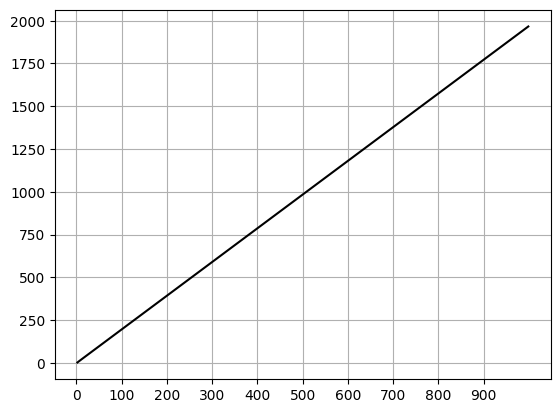

In [32]:
def sum_fact(n):
  s = 0
  for i in range(1,n+1):
    s = s+log10(i)
  return s

def log10_nb_comb(n):
  if(n%2 == 1):
    x = sum_fact(7)+6*log10(3)+((n*n-2*n-3)/4)*sum_fact(24)+log10(24)+sum_fact(12)+10*log10(2)
    y = (6*((n-2)*(n-2)-1)/4)*sum_fact(4)
    return x-y
  else:
    x = sum_fact(7)+6*log10(3)+((n*n-2*n)/4)*sum_fact(24)
    y = (6*(n-2)*(n-2)/4)*sum_fact(4)
    return x-y

x = list(range(2,1000))
y = [sqrt(log10_nb_comb(i)) for i in range(2,1000)]

plt.xticks(list(range(0,1000,100)),list(range(0,1000,100)))
plt.plot(x, y,"-k")
plt.grid()

plt.show()